# **Prepare Data**

## **Import Library**

In [ ]:
# Import library
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

## **Load Data**

In [2]:
# Load Data
path = "../Data Arduino 4 treatment/fixed_formatData.xlsx"
df = pd.read_excel(path)
df

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan
0,151,149.0,106.40,73,0,1
1,151,149.0,109.78,73,0,1
2,149,149.0,106.40,73,0,1
3,149,149.0,130.06,73,0,1
4,149,151.4,106.40,73,0,1
...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4
1437,149,153.8,140.20,64,3,4
1438,147,153.8,113.16,64,3,4
1439,149,153.8,123.30,64,3,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 67.7 KB


## **Checking Outliers**

### **Visualisasi Outliers**

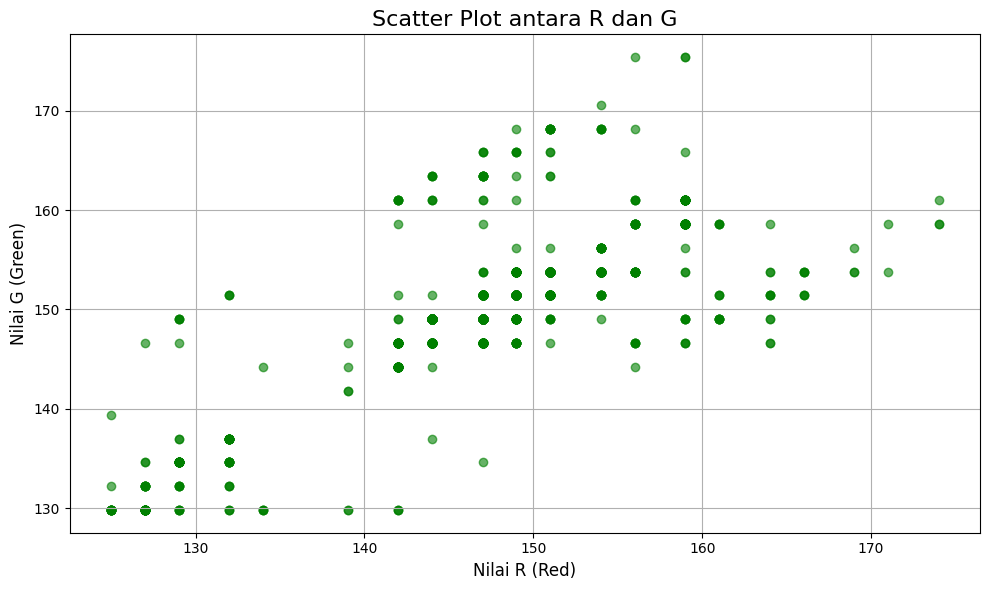

In [4]:
# Scatter plot antara R dan G
plt.figure(figsize=(10, 6))
plt.scatter(df['R'], df['G'], c='green', alpha=0.6)
plt.title("Scatter Plot antara R dan G", fontsize=16)
plt.xlabel("Nilai R (Red)", fontsize=12)
plt.ylabel("Nilai G (Green)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

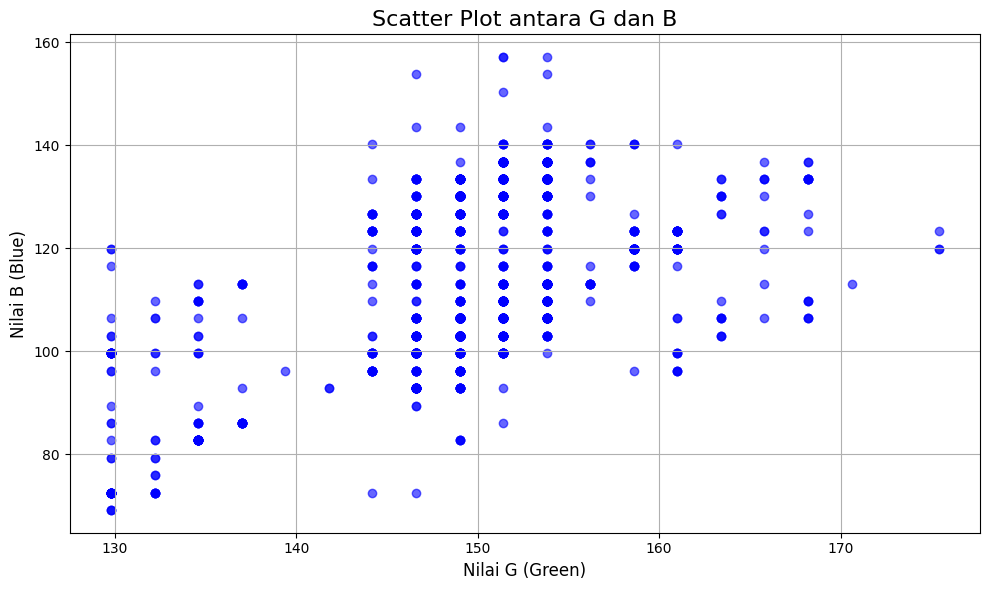

In [5]:
# Scatter plot antara G dan B
plt.figure(figsize=(10, 6))
plt.scatter(df['G'], df['B'], c='blue', alpha=0.6)
plt.title("Scatter Plot antara G dan B", fontsize=16)
plt.xlabel("Nilai G (Green)", fontsize=12)
plt.ylabel("Nilai B (Blue)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

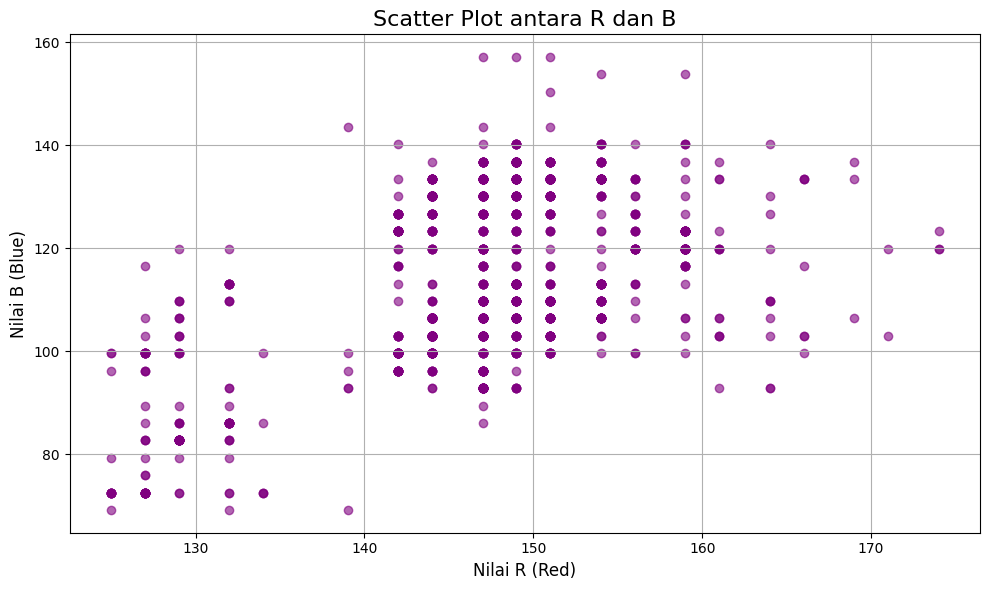

In [6]:
# Scatter plot antara R dan B
plt.figure(figsize=(10, 6))
plt.scatter(df['R'], df['B'], c='purple', alpha=0.6)
plt.title("Scatter Plot antara R dan B", fontsize=16)
plt.xlabel("Nilai R (Red)", fontsize=12)
plt.ylabel("Nilai B (Blue)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

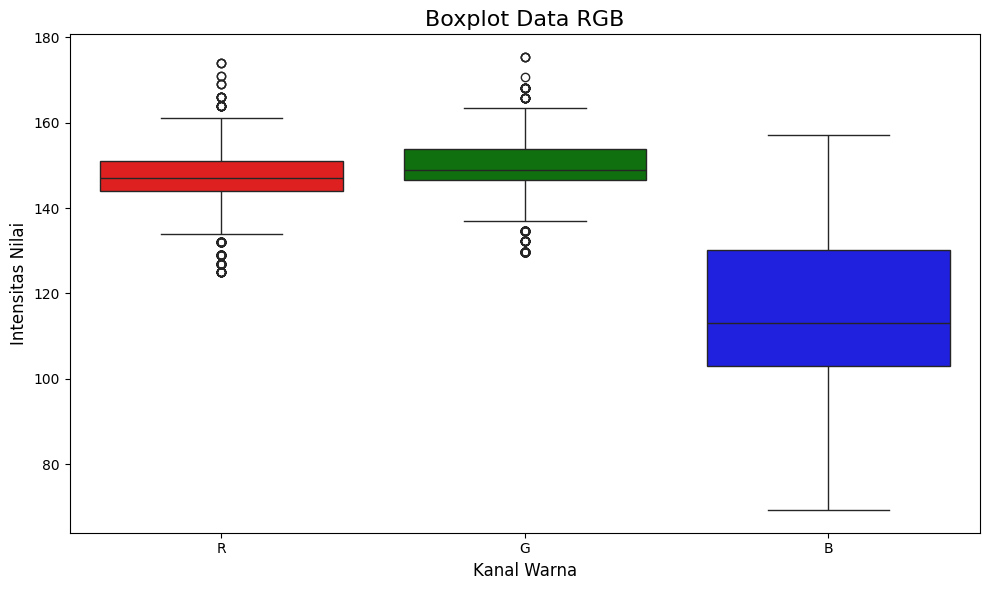

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['R', 'G', 'B']], palette=["red", "green", "blue"])
plt.title("Boxplot Data RGB", fontsize=16)
plt.ylabel("Intensitas Nilai", fontsize=12)
plt.xlabel("Kanal Warna", fontsize=12)
plt.tight_layout()
plt.show()


### **Mengatasi Outliers**

In [8]:
# Fungsi deteksi outlier dengan IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound), lower_bound, upper_bound

In [9]:
# Membuat salinan DataFrame untuk analisis tanpa memodifikasi DataFrame asli
df_cleaned = df.copy()

# Ubah kolom 'R' menjadi tipe data float
df_cleaned['R'] = df_cleaned['R'].astype(float)

for col in ['R', 'G', 'B']:
    outliers_mask, lower_bound, upper_bound = detect_outliers_iqr(df_cleaned[col])
    
    # Tampilkan data yang merupakan outlier
    outliers_data = df_cleaned.loc[outliers_mask, col]
    print(f"\nOutliers in column '{col}':")
    print(outliers_data)
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    # Ganti nilai outlier
    df_cleaned.loc[outliers_mask, col] = np.where(
        df_cleaned.loc[outliers_mask, col] < lower_bound,
        lower_bound,
        upper_bound
    )


Outliers in column 'R':
33      164.0
55      164.0
73      164.0
254     132.0
255     129.0
        ...  
1215    164.0
1222    171.0
1229    174.0
1257    164.0
1263    164.0
Name: R, Length: 158, dtype: float64
Lower bound: 133.5, Upper bound: 161.5

Outliers in column 'G':
27      165.8
254     132.2
255     129.8
256     132.2
257     132.2
        ...  
1199    165.8
1220    175.4
1241    175.4
1372    165.8
1416    165.8
Name: G, Length: 144, dtype: float64
Lower bound: 135.79999999999995, Upper bound: 164.60000000000002

Outliers in column 'B':
Series([], Name: B, dtype: float64)
Lower bound: 62.45999999999999, Upper bound: 170.62


In [10]:
# # # Membuat salinan DataFrame untuk analisis tanpa memodifikasi DataFrame asli
# df_cleaned = df.copy()

# # Terapkan Winsorization langsung pada kolom R, G, dan B
# df_cleaned['R'] = winsorize(df_cleaned['R'], limits=[0.05, 0.05])
# df_cleaned['G'] = winsorize(df_cleaned['G'], limits=[0.05, 0.05])
# df_cleaned['B'] = winsorize(df_cleaned['B'], limits=[0.05, 0.05])

In [11]:
# # Membuat salinan DataFrame untuk analisis tanpa memodifikasi DataFrame asli
# df_cleaned = df.copy()

# # Menghapus outlier dari salinan DataFrame
# df_cleaned = df_cleaned[~df_cleaned['R'].isin(outliers_R)]
# df_cleaned = df_cleaned[~df_cleaned['G'].isin(outliers_G)]
# df_cleaned = df_cleaned[~df_cleaned['B'].isin(outliers_B)]

# # Menampilkan jumlah data sebelum dan sesudah pembersihan
# print("Jumlah data sebelum pembersihan:", len(df))
# print("Jumlah data setelah pembersihan:", len(df_cleaned))

In [12]:
df_cleaned

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan
0,151.0,149.0,106.40,73,0,1
1,151.0,149.0,109.78,73,0,1
2,149.0,149.0,106.40,73,0,1
3,149.0,149.0,130.06,73,0,1
4,149.0,151.4,106.40,73,0,1
...,...,...,...,...,...,...
1436,147.0,151.4,136.82,64,3,4
1437,149.0,153.8,140.20,64,3,4
1438,147.0,153.8,113.16,64,3,4
1439,149.0,153.8,123.30,64,3,4


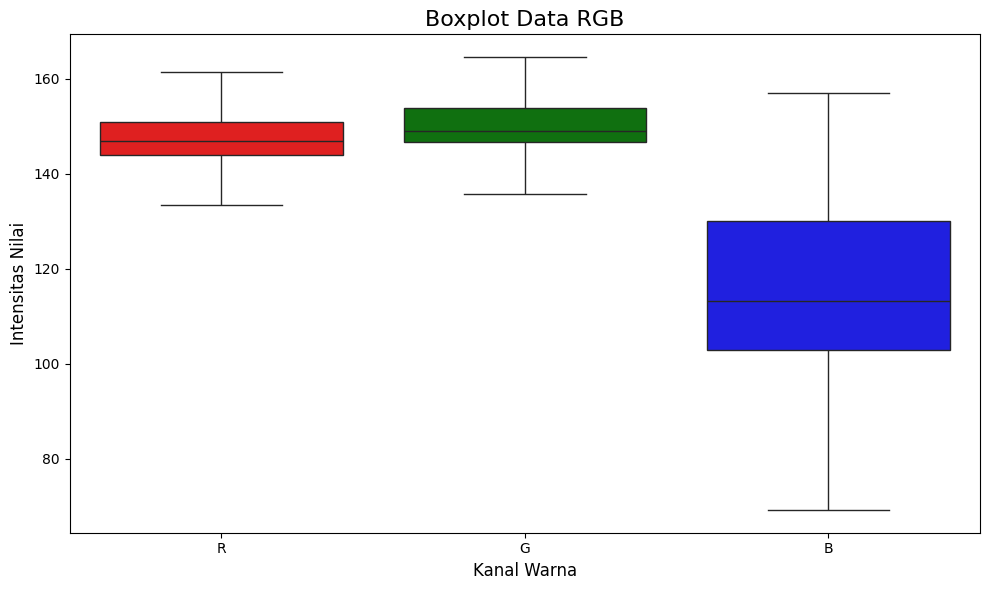

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['R', 'G', 'B']], palette=["red", "green", "blue"])
plt.title("Boxplot Data RGB", fontsize=16)
plt.ylabel("Intensitas Nilai", fontsize=12)
plt.xlabel("Kanal Warna", fontsize=12)
plt.tight_layout()
plt.show()

## **Ekstraksi Fitur**

### **Normalisasi Kanal RGB**

In [14]:
def normalize_rgb(df):
    # Salin dataframe
    df_norm = df.copy()
    # Normalisasi kolom R, G, dan B
    df_norm['r'] = df_norm['R'] / 255
    df_norm['g'] = df_norm['G'] / 255
    df_norm['b'] = df_norm['B'] / 255

    return df_norm

In [15]:
df_norm= normalize_rgb(df)
df_norm

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255
...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529


In [16]:
df_norm_co=normalize_rgb(df_cleaned)
df_norm_co

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b
0,151.0,149.0,106.40,73,0,1,0.592157,0.584314,0.417255
1,151.0,149.0,109.78,73,0,1,0.592157,0.584314,0.430510
2,149.0,149.0,106.40,73,0,1,0.584314,0.584314,0.417255
3,149.0,149.0,130.06,73,0,1,0.584314,0.584314,0.510039
4,149.0,151.4,106.40,73,0,1,0.584314,0.593725,0.417255
...,...,...,...,...,...,...,...,...,...
1436,147.0,151.4,136.82,64,3,4,0.576471,0.593725,0.536549
1437,149.0,153.8,140.20,64,3,4,0.584314,0.603137,0.549804
1438,147.0,153.8,113.16,64,3,4,0.576471,0.603137,0.443765
1439,149.0,153.8,123.30,64,3,4,0.584314,0.603137,0.483529


### **Perbandingan Kanal**

In [17]:
def calculate_ratios(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_rasio = df_norm.copy()

    # Hitung rasio R/G
    df_rasio['R/Gratio'] = df_rasio['R'] / df_rasio['G']

    # Hitung rasio G/B
    df_rasio['G/Bratio'] = df_rasio['G'] / df_rasio['B']

    return df_rasio

In [18]:
df_rasio = calculate_ratios(df_norm)
df_rasio

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932
...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364


In [19]:
df_rasio_co = calculate_ratios(df_norm_co)
df_rasio_co

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932
...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364


### **Mencari Nilai HSV**

In [ ]:
def rgb_to_hsv(df):
    # Salin dataframe
    df_hsv = df.copy()
    
    # Ekstrak kolom r, g, dan b
    r = df_hsv['r']
    g = df_hsv['g']
    b = df_hsv['b']

    # Hitung nilai maksimum (V) dan minimum (m)
    cmax = np.maximum.reduce([r, g, b])
    cmin = np.minimum.reduce([r, g, b])
    delta = cmax - cmin

    # Hitung Hue (H)
    def calculate_hue():
        hue = np.zeros_like(delta)  # Default hue adalah 0
        mask_r_max = (cmax == r) & (delta != 0)
        mask_g_max = (cmax == g) & (delta != 0)
        mask_b_max = (cmax == b) & (delta != 0)

        # Rumus untuk hue jika R adalah maksimum
        hue[mask_r_max] = (60 * ((g[mask_r_max] - b[mask_r_max]) / delta[mask_r_max]) + 360) % 360

        # Rumus untuk hue jika G adalah maksimum
        hue[mask_g_max] = (60 * ((b[mask_g_max] - r[mask_g_max]) / delta[mask_g_max]) + 120) % 360

        # Rumus untuk hue jika B adalah maksimum
        hue[mask_b_max] = (60 * ((r[mask_b_max] - g[mask_b_max]) / delta[mask_b_max]) + 240) % 360

        return hue

    h = calculate_hue()

    # Hitung Saturation (S)
    s = np.where(cmax != 0, delta / cmax, 0)

    # Value (V) adalah nilai maksimum
    v = cmax

    # Tambahkan kolom h, s, dan v ke DataFrame
    df_hsv['H'] = h
    df_hsv['S'] = s
    df_hsv['V'] = v

    return df_hsv

In [21]:
df_hsv = rgb_to_hsv(df_rasio)
df_hsv

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137


In [22]:
df_hsv_co=rgb_to_hsv(df_rasio_co)
df_hsv_co

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137


### **Mencari Nilai Lab**

#### **Hitung Manual**

In [ ]:
def rgb_to_lab(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_lab = df.copy()

    # Normalisasi RGB ke rentang [0, 1]
    r = df_lab['r']
    g = df_lab['g']
    b = df_lab['b']

    # Koreksi gamma untuk nilai RGB
    def gamma_correction(c):
        return np.where(c > 0.04045, ((c + 0.055) / 1.055) ** 2.4, c / 12.92)

    # Terapkan koreksi gamma
    r_linear = gamma_correction(r)
    g_linear = gamma_correction(g)
    b_linear = gamma_correction(b)

    # Transformasi RGB ke XYZ menggunakan matriks standar
    X = 0.4124564 * r_linear + 0.3575761 * g_linear + 0.1804375 * b_linear
    Y = 0.2126729 * r_linear + 0.7151522 * g_linear + 0.0721750 * b_linear
    Z = 0.0193339 * r_linear + 0.1191920 * g_linear + 0.9503041 * b_linear

    # Nilai referensi untuk XYZ (D65/2° standard illuminant)
    Xn, Yn, Zn = 0.95047, 1.0, 1.08883

    # Fungsi untuk menghitung f(t)
    def f(t):
        return np.where(t > 0.008856, t ** (1/3), 7.787 * t + 16/116)

    # Hitung L, a, dan b
    L = 116 * f(Y / Yn) - 16
    a = 500 * (f(X / Xn) - f(Y / Yn))
    b = 200 * (f(Y / Yn) - f(Z / Zn))

    # Tambahkan kolom L, a, dan b ke DataFrame
    df_lab['cL'] = L
    df_lab['ca'] = a
    df_lab['cb'] = b

    return df_lab

In [24]:
df_lab=rgb_to_lab(df_hsv)
df_lab

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.890564,-6.299734,22.830546
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,60.953899,-5.827671,21.044019
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.723155,-7.112026,22.577013
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.218617,-3.447379,10.020923
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.395413,-8.411532,23.476470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.883257,-4.341136,7.130325
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.788701,-4.301695,6.543102
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,62.035710,-9.534773,20.581252
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.399884,-7.187258,15.471242


In [25]:
df_lab_co=rgb_to_lab(df_hsv_co)
df_lab_co

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.890564,-6.299734,22.830546
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,60.953899,-5.827671,21.044019
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.723155,-7.112026,22.577013
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.218617,-3.447379,10.020923
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.395413,-8.411532,23.476470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.883257,-4.341136,7.130325
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.788701,-4.301695,6.543102
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,62.035710,-9.534773,20.581252
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.399884,-7.187258,15.471242


#### **Hitung Dengan Library OpenCV**

In [ ]:
def rgb_to_lab_with_opencv(df):

    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_cv = df.copy()

    # Konversi RGB ke LAB menggunakan OpenCV
    rgb_values = df_cv[['R', 'G', 'B']].values.astype(np.uint8)
    rgb_values = rgb_values[:, ::-1]
    lab_values = cv2.cvtColor(rgb_values.reshape(1, -1, 3), cv2.COLOR_BGR2LAB).reshape(-1, 3)

    # Pisahkan nilai L, a, dan b
    L = lab_values[:, 0] * (100 / 255)  # Konversi L ke rentang [0, 100]
    
    # Ubah tipe data a dan b ke float sebelum penggeseran
    a = lab_values[:, 1].astype(float) - 128  # Geser a ke rentang [-128, 127]
    b = lab_values[:, 2].astype(float) - 128  # Geser b ke rentang [-128, 127]

    # Tambahkan kolom cL, ca, dan cb ke DataFrame
    df_cv['cL'] = L
    df_cv['ca'] = a
    df_cv['cb'] = b

    return df_cv

In [27]:
df_cv=rgb_to_lab_with_opencv(df_hsv)
df_cv

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.784314,-6.0,23.0
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,61.176471,-6.0,21.0
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.784314,-7.0,23.0
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.176471,-4.0,10.0
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.176471,-8.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.960784,-4.0,7.0
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.745098,-4.0,6.0
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,61.960784,-9.0,20.0
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.352941,-7.0,15.0


In [28]:
df_cv_co=rgb_to_lab_with_opencv(df_hsv_co)
df_cv_co

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.784314,-6.0,23.0
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,61.176471,-6.0,21.0
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.784314,-7.0,23.0
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.176471,-4.0,10.0
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.176471,-8.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.960784,-4.0,7.0
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.745098,-4.0,6.0
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,61.960784,-9.0,20.0
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.352941,-7.0,15.0


# **Seleksi Fitur Gabungan Fitur**

## **Import Library**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import joblib
import os
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
import warnings
import itertools
import time

In [3]:
# Matikan FutureWarning, ConvergenceWarning, dan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

## **Mempersiapkan Data**

In [161]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
 6   r                 1441 non-null   float64
 7   g                 1441 non-null   float64
 8   b                 1441 non-null   float64
 9   R/Gratio          1441 non-null   float64
 10  G/Bratio          1441 non-null   float64
 11  H                 1441 non-null   float64
 12  S                 1441 non-null   float64
 13  V                 1441 non-null   float64
 14  cL                1441 non-null   float64
 15  ca                1441 non-null   float64
 16  cb                1441 non-null   float64


### **Membuat Kombinasi Grup**

In [162]:
# Data input
grup_fitur = {
    'RGB': ['R', 'G', 'B'],
    'rgb': ['r', 'g', 'b'],
    'HSV': ['H', 'S', 'V'],
    'CLab': ['cL', 'ca', 'cb'],
    'R/Gratio': ['R/Gratio'],
    'G/Bratio': ['G/Bratio'],
}

# Inisialisasi kamus kombinasi
kombinasi_grup = {}

# Tambahkan semua grup individu terlebih dahulu
for group_name, features in grup_fitur.items():
    kombinasi_grup[group_name] = grup_fitur[group_name]

# Buat set fitur "Full" dengan semua fitur yang digabungkan
all_features = []
for features in grup_fitur.values():
    all_features.extend(features)
kombinasi_grup['Full'] = all_features

# Hasilkan kombinasi dari 2 grup fitur
groups = list(grup_fitur.keys())
for i, j in itertools.combinations(groups, 2):
    combo_name = f"{i}_{j}"
    kombinasi_grup[combo_name] = grup_fitur[i] + grup_fitur[j]

# Hasilkan kombinasi dari 3 grup fitur
for i, j, k in itertools.combinations(groups, 3):
    combo_name = f"{i}_{j}_{k}"
    kombinasi_grup[combo_name] = grup_fitur[i] + grup_fitur[j] + grup_fitur[k]

# Hasilkan kombinasi dari 4 grup fitur
for i, j, k, l in itertools.combinations(groups, 4):
    combo_name = f"{i}_{j}_{k}_{l}"
    kombinasi_grup[combo_name] = grup_fitur[i] + grup_fitur[j] + grup_fitur[k] + grup_fitur[l]

# Hasilkan kombinasi dari 5 grup fitur
for i, j, k, l, m in itertools.combinations(groups, 5):
    combo_name = f"{i}_{j}_{k}_{l}_{m}"
    kombinasi_grup[combo_name] = grup_fitur[i] + grup_fitur[j] + grup_fitur[k] + grup_fitur[l] + grup_fitur[m]

### **Membuat Dictionary**

In [163]:
def prepare_data_variasi_fitur(df, kombinasi_grup):
    hasil_split = {}

    for nama_grup, fitur in kombinasi_grup.items():
        X = df[fitur]
        y = df['Perlakuan']

        # Membagi data menjadi set pelatihan dan pengujian
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Preprocessing data tanpa split untuk ANN: StandardScaler
        scaler_ann = StandardScaler()
        # Preprocessing untuk ANN: StandardScaler
        X_train_ann = scaler_ann.fit_transform(X_train)
        X_test_ann = scaler_ann.transform(X_test)
        
        # Preprocessing data tanpa split untuk AdaBoost SVM: StandardScaler
        scaler_svm = StandardScaler()
        X_train_svm = scaler_svm.fit_transform(X_train)
        X_test_svm = scaler_svm.transform(X_test)

        # Preprocessing untuk AdaBoost DT: Tanpa scaling
        X_train_dt = X_train.values
        X_test_dt = X_test.values

        hasil_split[nama_grup] = {
            'X_train_ann': X_train_ann, 'X_test_ann': X_test_ann,
            'X_train_svm': X_train_svm, 'X_test_svm': X_test_svm,
            'X_train_dt': X_train_dt, 'X_test_dt': X_test_dt,
            'y_train': y_train, 'y_test': y_test,
            'fitur': fitur
        }

        print(f"Grup: {nama_grup}")
        print(f"Jumlah fitur yang digunakan: {len(fitur)}")
        print(f"Fitur: {fitur}")
        print(f"Jumlah data training: {X_train.shape[0]}")
        print(f"Jumlah data testing: {X_test.shape[0]}")
        print(f"Jumlah data training ANN: {X_train_ann.shape[0]}")
        print(f"Jumlah data testing ANN: {X_test_ann.shape[0]}")
        print(f"Jumlah data training SVM: {X_train_svm.shape[0]}")
        print(f"Jumlah data testing SVM: {X_test_svm.shape[0]}")
        print(f"Jumlah y_train: {y_train.shape[0]}")
        print(f"Jumlah y_test: {y_test.shape[0]}")

    return hasil_split


In [164]:
data_prep = prepare_data_variasi_fitur(df_lab, kombinasi_grup)

Grup: RGB
Jumlah fitur yang digunakan: 3
Fitur: ['R', 'G', 'B']
Jumlah data training: 1008
Jumlah data testing: 433
Jumlah data training ANN: 1008
Jumlah data testing ANN: 433
Jumlah data training SVM: 1008
Jumlah data testing SVM: 433
Jumlah y_train: 1008
Jumlah y_test: 433
Grup: rgb
Jumlah fitur yang digunakan: 3
Fitur: ['r', 'g', 'b']
Jumlah data training: 1008
Jumlah data testing: 433
Jumlah data training ANN: 1008
Jumlah data testing ANN: 433
Jumlah data training SVM: 1008
Jumlah data testing SVM: 433
Jumlah y_train: 1008
Jumlah y_test: 433
Grup: HSV
Jumlah fitur yang digunakan: 3
Fitur: ['H', 'S', 'V']
Jumlah data training: 1008
Jumlah data testing: 433
Jumlah data training ANN: 1008
Jumlah data testing ANN: 433
Jumlah data training SVM: 1008
Jumlah data testing SVM: 433
Jumlah y_train: 1008
Jumlah y_test: 433
Grup: CLab
Jumlah fitur yang digunakan: 3
Fitur: ['cL', 'ca', 'cb']
Jumlah data training: 1008
Jumlah data testing: 433
Jumlah data training ANN: 1008
Jumlah data testing A

In [165]:
data_prep

{'RGB': {'X_train_ann': array([[ 1.56723454,  1.22336322,  0.34806141],
         [-0.05568036,  0.19057417,  0.13606993],
         [-0.05568036,  2.25615228,  0.56005289],
         ...,
         [-0.05568036, -0.49795187, -1.34787043],
         [ 0.21480545,  0.19057417,  1.62001028],
         [-3.03102435, -2.90779299, -2.6198193 ]]),
  'X_test_ann': array([[-0.46140909, -0.15368885, -0.49990451],
         [ 0.21480545, -0.15368885,  0.77204436],
         [-0.46140909, -0.15368885,  0.98403584],
         ...,
         [ 0.21480545,  0.19057417,  0.13606993],
         [-0.46140909, -0.15368885,  0.98403584],
         [-0.73189491, -0.49795187,  0.56005289]]),
  'X_train_svm': array([[ 1.56723454,  1.22336322,  0.34806141],
         [-0.05568036,  0.19057417,  0.13606993],
         [-0.05568036,  2.25615228,  0.56005289],
         ...,
         [-0.05568036, -0.49795187, -1.34787043],
         [ 0.21480545,  0.19057417,  1.62001028],
         [-3.03102435, -2.90779299, -2.6198193 ]]),
 

## **Membangun Model**

### **Artiifical Neural Network (ANN)**

####  **Sequential Model**

In [4]:
# def train_ann(X_train, y_train, X_test, y_test, params=None, show_report=False):
#     print("=== Melatih Model ANN dengan Keras ===")
#     from tensorflow.keras.models import Sequential
#     from tensorflow.keras.layers import Dense, Dropout
#     from tensorflow.keras.optimizers import Adam
#     from tensorflow.keras.callbacks import EarlyStopping

#     default_params = {
#         "hidden_layers": [100, 50],
#         "activation": "relu",
#         "output_activation": "softmax",
#         "dropout_rate": 0.0,
#         "learning_rate": 0.001,
#         "loss": "sparse_categorical_crossentropy",
#         "metrics": ["accuracy"],
#         "epochs": 100,
#         "batch_size": 32,
#         "early_stopping": True,
#         "patience": 10,
#         "random_seed": 42
#     }

#     if params:
#         default_params.update(params)

#     import tensorflow as tf
#     tf.random.set_seed(default_params["random_seed"])
#     np.random.seed(default_params["random_seed"])

#     num_classes = len(np.unique(y_train))
#     model = Sequential()
#     model.add(Dense(default_params["hidden_layers"][0], activation=default_params["activation"], input_shape=(X_train.shape[1],)))
#     if default_params["dropout_rate"] > 0:
#         model.add(Dropout(default_params["dropout_rate"]))
#     for units in default_params["hidden_layers"][1:]:
#         model.add(Dense(units, activation=default_params["activation"]))
#         if default_params["dropout_rate"] > 0:
#             model.add(Dropout(default_params["dropout_rate"]))
#     model.add(Dense(num_classes, activation=default_params["output_activation"]))

#     optimizer = Adam(learning_rate=default_params["learning_rate"])
#     model.compile(optimizer=optimizer, loss=default_params["loss"], metrics=default_params["metrics"])

#     callbacks = []
#     if default_params["early_stopping"]:
#         early_stop = EarlyStopping(monitor='val_loss', patience=default_params["patience"], restore_best_weights=True)
#         callbacks.append(early_stop)

#     model.fit(X_train, y_train, epochs=default_params["epochs"], batch_size=default_params["batch_size"],
#               validation_split=0.2, callbacks=callbacks, verbose=0)

#     return model

#### **MLP Sklearn**

In [5]:
def train_ann(X_train, y_train, params=None):
    print("=== Melatih Model ANN ===")

    default_params = {
        "hidden_layer_sizes": (100, 50),
        "activation": "relu",
        "solver": "adam",
        "alpha": 0.0001,
        "learning_rate": "constant",
        "max_iter": 1000,
        "random_state": 42,
        "early_stopping": False,
    }

    if params:
        default_params.update(params)

    ann = MLPClassifier(**default_params)
    ann.fit(X_train, y_train)

    return ann

### **Adaboost Decision Tree**

In [6]:
def train_adaboost_dt(X_train, y_train, params=None):
    print("\n=== Melatih Model AdaBoost dengan Decision Tree ===")

    estimator = DecisionTreeClassifier(max_depth=3, random_state=42)
    default_params = {
        "estimator": estimator,
        "n_estimators": 50,
        "learning_rate": 1.0,
        "random_state": 42,
    }

    if params:
        estimator_params = {k.split('__')[1]: v for k, v in params.items() if k.startswith('estimator__')}
        default_params["estimator"].set_params(**estimator_params)
        params = {k: v for k, v in params.items() if not k.startswith('estimator__')}
        default_params.update(params)

    adaboost_dt = AdaBoostClassifier(**default_params)
    adaboost_dt.fit(X_train, y_train)

    return adaboost_dt

### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [7]:
def train_adaboost_svm(X_train, y_train, params=None):
    print("\n=== Melatih Model AdaBoost dengan SVM RBF Kernel ===")

    svc = SVC(kernel='rbf', probability=True, random_state=42)
    default_params = {
        "estimator": svc,
        "n_estimators": 50,
        "learning_rate": 1.0,
        "random_state": 42,
    }

    if params:
        estimator_params = {k.split('__')[1]: v for k, v in params.items() if k.startswith('estimator__')}
        default_params["estimator"].set_params(**estimator_params)
        params = {k: v for k, v in params.items() if not k.startswith('estimator__')}
        default_params.update(params)

    adaboost_svm = AdaBoostClassifier(**default_params)
    adaboost_svm.fit(X_train, y_train)

    return adaboost_svm

### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [8]:
def train_bagging_svm(X_train, y_train, params=None):
    print("\n=== Melatih Model Bagging dengan SVM RBF Kernel ===")

    svc = SVC(kernel='rbf', probability=True, random_state=42)
    default_params = {
        "estimator": svc,
        "n_estimators": 50,
        "random_state": 42,
        "n_jobs": -1,
    }

    if params:
        estimator_params = {k.split('__')[1]: v for k, v in params.items() if k.startswith('estimator__')}
        default_params["estimator"].set_params(**estimator_params)
        params = {k: v for k, v in params.items() if not k.startswith('estimator__')}
        default_params.update(params)

    bagging_svm = BaggingClassifier(**default_params)
    bagging_svm.fit(X_train, y_train)

    return bagging_svm

## **Training dan Evaluasi Model**

### **Inisiasi Parameter**

In [9]:
# Daftar fitur lengkap yang digunakan
ALL_FEATURES = [
    'R', 'G', 'B', 'r', 'g', 'b', 
    'R/Gratio', 'G/Bratio', 
    'H', 'S', 'V', 
    'cL', 'ca', 'cb'
]

# Mapping kelompok fitur ke komponen penyusunnya
FEATURE_GROUP_MAP = {
    'RGB': ['R', 'G', 'B'],
    'rgb': ['r', 'g', 'b'],
    'R/Gratio': ['R/Gratio'],
    'G/Bratio': ['G/Bratio'],
    'HSV': ['H', 'S', 'V'],
    'CLab': ['cL', 'ca', 'cb'],
    # tambahkan grup lain jika ada
}


### **Fungsi Metrics Evaluasi**

In [10]:
def metrics_model(model, X, y, set_name="Data", show_report=True):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X)
    else:
        y_prob = model.predict(X)

    if len(y_prob.shape) == 2 and y_prob.shape[1] > 1:
        y_pred = np.argmax(y_prob, axis=1)
    else:
        y_pred = (y_prob > 0.5).astype(int).flatten()

    acc = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True)

    metrics = {
        "accuracy": acc,
        "precision": report['weighted avg']['precision'],
        "recall": report['weighted avg']['recall'],
        "f1_score": report['weighted avg']['f1-score']
    }

    if show_report:
        print(f"\n=== Classification Report ({set_name}) ===")
        print(classification_report(y, y_pred))

    return {
        "y_pred": y_pred,
        "y_prob": y_prob,
        "metrics": metrics
    }

### **Fungsi Testing dan Evaluasi Model**

In [11]:
def evaluate_model(feature_groups, model_func, model_name, target_groups=None):
    results = {}
    metrics_data = []

    # Mapping preprocessing sesuai model
    model_preprocessing_map = {
        'ANN': ('X_train_ann', 'X_test_ann'),
        'AdaBoost DT': ('X_train_dt', 'X_test_dt'),
        'AdaBoost SVM': ('X_train_svm', 'X_test_svm'),
        'Bagging SVM': ('X_train_svm', 'X_test_svm'),
    }

    if model_name not in model_preprocessing_map:
        raise ValueError(f"Model {model_name} tidak dikenali.")

    # Ambil key yang diperlukan berdasarkan model
    X_train_key, X_test_key = model_preprocessing_map[model_name]
    required_keys = [X_train_key, X_test_key, 'y_train', 'y_test']

    # Validasi hanya key yang diperlukan
    for group_name, data in feature_groups.items():
        missing_keys = [key for key in required_keys if key not in data]
        if missing_keys:
            raise ValueError(f"Grup fitur '{group_name}' kehilangan key berikut: {missing_keys}")

    # Filter grup jika target_groups disediakan
    if target_groups:
        feature_groups = {key: value for key, value in feature_groups.items() if key in target_groups}

    # Evaluasi tiap grup fitur
    for group_name, data in feature_groups.items():
        print(f"\n=== Mengolah Grup Fitur: {group_name} dengan Model: {model_name} ===")
        start_time = time.time()  # Mulai timer

        y_train = data['y_train']
        y_test = data['y_test']

        # Latih dan evaluasi model
        model = model_func(data[X_train_key], y_train)
        train_result = metrics_model(model, data[X_train_key], y_train, "Train", show_report=True)
        test_result = metrics_model(model, data[X_test_key], y_test, "Test", show_report=True)

        results[group_name] = {
            'model': model_name,
            'train_results': train_result,
            'test_results': test_result,
        }

        # Cari fitur yang dipilih
        if group_name == "Full":
            sorted_features = ALL_FEATURES
        else:
            parts = group_name.split('_')
            selected_features = set()
            for part in parts:
                if part in FEATURE_GROUP_MAP:
                    selected_features.update(FEATURE_GROUP_MAP[part])
                elif part in ALL_FEATURES:
                    selected_features.add(part)
            sorted_features = sorted(
                selected_features,
                key=lambda x: ALL_FEATURES.index(x) if x in ALL_FEATURES else float('inf')
            )

        # Hitung durasi
        duration = time.time() - start_time

        # Simpan metrik
        metrics_data.append({
            'Feature Group': group_name,
            'Model': model_name,
            'Train Accuracy': train_result['metrics']['accuracy'],
            'Train Precision': train_result['metrics'].get('precision', 0),
            'Train Recall': train_result['metrics'].get('recall', 0),
            'Train F1-Score': train_result['metrics'].get('f1_score', 0),
            'Test Accuracy': test_result['metrics']['accuracy'],
            'Test Precision': test_result['metrics'].get('precision', 0),
            'Test Recall': test_result['metrics'].get('recall', 0),
            'Test F1-Score': test_result['metrics'].get('f1_score', 0),
            'Selected Features': ', '.join(sorted_features),
            'Processing Time (s)': round(duration, 2)
        })

    # Buat DataFrame dan urutkan
    metrics_df = pd.DataFrame(metrics_data)
    metrics_df = metrics_df.sort_values(
        by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'], 
        ascending=[False, False, False, False]
    ).reset_index(drop=True)

    return results, metrics_df

In [12]:
def evaluate_model_cv(feature_groups, model_func, model_name, n_splits=10, target_groups=None):
    results = {}
    metrics_data = []

    # Mapping preprocessing sesuai model
    model_preprocessing_map = {
        'ANN': 'X_train_ann',
        'AdaBoost DT': 'X_train_dt',
        'AdaBoost SVM': 'X_train_svm',
        'Bagging SVM': 'X_train_svm',
    }

    if model_name not in model_preprocessing_map:
        raise ValueError(f"Model {model_name} tidak dikenali.")
    
    X_train_key = model_preprocessing_map[model_name]
    required_keys = [X_train_key, 'y_train']

    # Validasi hanya key yang diperlukan berdasarkan model
    for group_name, data in feature_groups.items():
        missing_keys = [key for key in required_keys if key not in data]
        if missing_keys:
            raise ValueError(f"Grup fitur '{group_name}' kehilangan key berikut: {missing_keys}")

    # Filter grup jika target_groups disediakan
    if target_groups:
        feature_groups = {key: value for key, value in feature_groups.items() if key in target_groups}

    # Evaluasi tiap grup fitur
    for group_name, data in feature_groups.items():
        print(f"\n=== Mengolah Grup Fitur: {group_name} dengan Model: {model_name} ===")
        start_time = time.time()  # Mulai timer

        X_train_key = model_preprocessing_map[model_name]
        X_train_full = data[X_train_key]
        y_train_full = data['y_train'].values

        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

        fold_metrics = {
            'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
            'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []
        }

        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
            print(f"Fold {fold}/{n_splits}")
            X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
            y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

            model = model_func(X_train, y_train)

            train_result = metrics_model(model, X_train, y_train, "Train", show_report=False)
            test_result = metrics_model(model, X_val, y_val, "Validation", show_report=False)

            fold_metrics['train_accuracy'].append(train_result['metrics']['accuracy'])
            fold_metrics['train_precision'].append(train_result['metrics'].get('precision', 0))
            fold_metrics['train_recall'].append(train_result['metrics'].get('recall', 0))
            fold_metrics['train_f1'].append(train_result['metrics'].get('f1_score', 0))

            fold_metrics['test_accuracy'].append(test_result['metrics']['accuracy'])
            fold_metrics['test_precision'].append(test_result['metrics'].get('precision', 0))
            fold_metrics['test_recall'].append(test_result['metrics'].get('recall', 0))
            fold_metrics['test_f1'].append(test_result['metrics'].get('f1_score', 0))

        avg_metrics = {
            'Train Accuracy': np.mean(fold_metrics['train_accuracy']),
            'Train Precision': np.mean(fold_metrics['train_precision']),
            'Train Recall': np.mean(fold_metrics['train_recall']),
            'Train F1-Score': np.mean(fold_metrics['train_f1']),
            'Test Accuracy': np.mean(fold_metrics['test_accuracy']),
            'Test Precision': np.mean(fold_metrics['test_precision']),
            'Test Recall': np.mean(fold_metrics['test_recall']),
            'Test F1-Score': np.mean(fold_metrics['test_f1']),
        }

        results[group_name] = {
            'model': model_name,
            'train_results': {'metrics': avg_metrics},  # Simpan rata-rata metrik
            'test_results': {'metrics': avg_metrics},
        }

        # Cari fitur yang dipilih
        if group_name == "Full":
            sorted_features = ALL_FEATURES
        else:
            parts = group_name.split('_')
            selected_features = set()
            for part in parts:
                if part in FEATURE_GROUP_MAP:
                    selected_features.update(FEATURE_GROUP_MAP[part])
                elif part in ALL_FEATURES:
                    selected_features.add(part)
            sorted_features = sorted(
                selected_features,
                key=lambda x: ALL_FEATURES.index(x) if x in ALL_FEATURES else float('inf')
            )

        # Hitung durasi akhir
        duration = time.time() - start_time

        metrics_data.append({
            'Feature Group': group_name,
            'Model': model_name,
            'Train Accuracy': avg_metrics['Train Accuracy'],
            'Train Precision': avg_metrics['Train Precision'],
            'Train Recall': avg_metrics['Train Recall'],
            'Train F1-Score': avg_metrics['Train F1-Score'],
            'Test Accuracy': avg_metrics['Test Accuracy'],
            'Test Precision': avg_metrics['Test Precision'],
            'Test Recall': avg_metrics['Test Recall'],
            'Test F1-Score': avg_metrics['Test F1-Score'],
            'Selected Features': ', '.join(sorted_features),
            'Processing Time (s)': round(duration, 2)
        })

    # Buat DataFrame dan urutkan
    metrics_df = pd.DataFrame(metrics_data)
    metrics_df = metrics_df.sort_values(
        by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'], 
        ascending=[False, False, False, False]
    ).reset_index(drop=True)

    return results, metrics_df

### **Artiﬁcial Neural Network (ANN)**

In [45]:
results_ann, metrics_df_ann = evaluate_model(
    data_prep, train_ann, 'ANN'
)


=== Mengolah Grup Fitur: RGB dengan Model: ANN ===
=== Melatih Model ANN ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       230
           1       0.71      0.61      0.66       254
           2       0.61      0.85      0.71       284
           3       0.88      0.81      0.84       240

    accuracy                           0.73      1008
   macro avg       0.76      0.73      0.74      1008
weighted avg       0.76      0.73      0.73      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.84      0.66      0.74        96
           1       0.66      0.52      0.58       114
           2       0.54      0.82      0.65       106
           3       0.86      0.79      0.83       117

    accuracy                           0.70       433
   macro avg       0.73      0.70      0.70       433
weighted avg       0.73      0

In [46]:
results_ann_cv, metrics_df_ann_cv = evaluate_model_cv(data_prep, train_ann, 'ANN', n_splits=10)


=== Mengolah Grup Fitur: RGB dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== Melatih Model ANN ===
Fold 5/10
=== Melatih Model ANN ===
Fold 6/10
=== Melatih Model ANN ===
Fold 7/10
=== Melatih Model ANN ===
Fold 8/10
=== Melatih Model ANN ===
Fold 9/10
=== Melatih Model ANN ===
Fold 10/10
=== Melatih Model ANN ===

=== Mengolah Grup Fitur: rgb dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== Melatih Model ANN ===
Fold 5/10
=== Melatih Model ANN ===
Fold 6/10
=== Melatih Model ANN ===
Fold 7/10
=== Melatih Model ANN ===
Fold 8/10
=== Melatih Model ANN ===
Fold 9/10
=== Melatih Model ANN ===
Fold 10/10
=== Melatih Model ANN ===

=== Mengolah Grup Fitur: HSV dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== 

#### **Perbandingan Hasil ANN**

In [47]:
metrics_df_ann.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,RGB_rgb_G/Bratio,ANN,0.727183,0.755572,0.727183,0.725913,0.699769,0.731360,0.699769,0.699177,"R, G, B, r, g, b, G/Bratio",1.69
1,RGB_rgb,ANN,0.728175,0.743266,0.728175,0.731506,0.699769,0.720829,0.699769,0.704928,"R, G, B, r, g, b",1.36
2,RGB_rgb_CLab_R/Gratio_G/Bratio,ANN,0.723214,0.750472,0.723214,0.724665,0.697460,0.731170,0.697460,0.699064,"R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb",1.15
3,RGB,ANN,0.733135,0.755690,0.733135,0.734017,0.697460,0.725733,0.697460,0.699311,"R, G, B",2.18
4,rgb,ANN,0.733135,0.755690,0.733135,0.734017,0.697460,0.725733,0.697460,0.699311,"r, g, b",2.02


In [48]:
metrics_df_ann_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,RGB_HSV_CLab_R/Gratio_G/Bratio,ANN,0.799603,0.809829,0.799603,0.799138,0.728149,0.742108,0.728149,0.726568,"R, G, B, R/Gratio, G/Bratio, H, S, V, cL, ca, cb",22.74
1,rgb_HSV_CLab_R/Gratio_G/Bratio,ANN,0.799603,0.809829,0.799603,0.799138,0.728149,0.742108,0.728149,0.726568,"r, g, b, R/Gratio, G/Bratio, H, S, V, cL, ca, cb",22.32
2,RGB_R/Gratio,ANN,0.793210,0.807253,0.793210,0.793153,0.727158,0.743379,0.727158,0.726190,"R, G, B, R/Gratio",27.90
3,rgb_R/Gratio,ANN,0.793210,0.807253,0.793210,0.793153,0.727158,0.743379,0.727158,0.726190,"r, g, b, R/Gratio",27.58
4,RGB_CLab_G/Bratio,ANN,0.785384,0.794778,0.785384,0.784628,0.727149,0.738662,0.727149,0.725015,"R, G, B, G/Bratio, cL, ca, cb",22.52


### **Adaboost Decision Tree**

In [49]:
results_adaboost_dt, metrics_df_adaboost_dt = evaluate_model(
    data_prep, train_adaboost_dt, 'AdaBoost DT'
)


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.48      0.62      0.54       230
           1       0.51      0.42      0.46       254
           2       0.69      0.67      0.68       284
           3       0.60      0.57      0.58       240

    accuracy                           0.57      1008
   macro avg       0.57      0.57      0.57      1008
weighted avg       0.58      0.57      0.57      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.38      0.51      0.44        96
           1       0.47      0.40      0.43       114
           2       0.50      0.48      0.49       106
           3       0.48      0.42      0.45       117

    accuracy                           0.45       433
   macro avg       0.46      0.45      0.45      

In [50]:
results_adaboost_dt_cv, metrics_df_adaboost_dt_cv = evaluate_model_cv(data_prep, train_adaboost_dt, 'AdaBoost DT', n_splits=10)


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost DT ===
Fold 1/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 2/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 3/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 4/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 5/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 6/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 7/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 8/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 9/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 10/10

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Mengolah Grup Fitur: rgb dengan Model: AdaBoost DT ===
Fold 1/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 2/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 3/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 4/10

=== Melatih Model AdaBoost dengan Decision Tree =

#### **Perbandingan Hasil Adaboost Decision Tree**

In [51]:
metrics_df_adaboost_dt_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,RGB_CLab,AdaBoost DT,0.713516,0.721201,0.713516,0.712451,0.655693,0.664152,0.655693,0.653204,"R, G, B, cL, ca, cb",1.20
1,rgb_CLab,AdaBoost DT,0.713516,0.721201,0.713516,0.712451,0.655693,0.664152,0.655693,0.653204,"r, g, b, cL, ca, cb",1.21
2,RGB_CLab_G/Bratio,AdaBoost DT,0.703814,0.709124,0.703814,0.702530,0.650792,0.660331,0.650792,0.650122,"R, G, B, G/Bratio, cL, ca, cb",1.23
3,rgb_CLab_G/Bratio,AdaBoost DT,0.703814,0.709124,0.703814,0.702530,0.650792,0.660331,0.650792,0.650122,"r, g, b, G/Bratio, cL, ca, cb",1.23
4,RGB_HSV_CLab,AdaBoost DT,0.717487,0.724015,0.717487,0.717176,0.644891,0.655060,0.644891,0.640347,"R, G, B, H, S, V, cL, ca, cb",1.35


In [52]:
metrics_df_adaboost_dt.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,HSV_R/Gratio_G/Bratio,AdaBoost DT,0.722222,0.726646,0.722222,0.719564,0.648961,0.656849,0.648961,0.642872,"R/Gratio, G/Bratio, H, S, V",0.13
1,G/Bratio,AdaBoost DT,0.717262,0.717386,0.717262,0.715079,0.642032,0.640801,0.642032,0.634137,G/Bratio,0.12
2,rgb_HSV_CLab_R/Gratio,AdaBoost DT,0.669643,0.670612,0.669643,0.667354,0.639723,0.641243,0.639723,0.635537,"r, g, b, R/Gratio, H, S, V, cL, ca, cb",0.17
3,RGB_HSV_CLab_R/Gratio_G/Bratio,AdaBoost DT,0.729167,0.729253,0.729167,0.728223,0.639723,0.637680,0.639723,0.637081,"R, G, B, R/Gratio, G/Bratio, H, S, V, cL, ca, cb",0.16
4,rgb_HSV_CLab_R/Gratio_G/Bratio,AdaBoost DT,0.729167,0.729253,0.729167,0.728223,0.639723,0.637680,0.639723,0.637081,"r, g, b, R/Gratio, G/Bratio, H, S, V, cL, ca, cb",0.16


### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [ ]:
results_adaboost_svm, metrics_df_adaboost_svm = evaluate_model(
    data_prep, train_adaboost_svm, 'AdaBoost SVM'
)


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.36      0.24      0.29       230
           1       0.00      0.00      0.00       254
           2       0.27      0.80      0.40       284
           3       0.00      0.00      0.00       240

    accuracy                           0.28      1008
   macro avg       0.16      0.26      0.17      1008
weighted avg       0.16      0.28      0.18      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.32      0.20      0.25        96
           1       0.00      0.00      0.00       114
           2       0.23      0.81      0.36       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.14      0.25      0.15    

In [ ]:
results_adaboost_svm_cv, metrics_df_adaboost_svm_cv = evaluate_model_cv(data_prep, train_adaboost_svm, 'AdaBoost SVM', n_splits=10)


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost SVM ===
Fold 1/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 2/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 3/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 4/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 5/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 6/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 7/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 8/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 9/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 10/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Mengolah Grup Fitur: rgb dengan Model: AdaBoost SVM ===
Fold 1/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 2/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 3/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 4/10

=== Melatih Model AdaBoost dengan 

#### **Perbandingan Hasil Adaboost SVM Kernel RBF**

In [55]:
metrics_df_adaboost_svm_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,rgb_R/Gratio,AdaBoost SVM,0.373783,0.325773,0.373783,0.293434,0.375030,0.297423,0.375030,0.296708,"r, g, b, R/Gratio",141.40
1,RGB_R/Gratio,AdaBoost SVM,0.376431,0.371560,0.376431,0.290962,0.371040,0.334954,0.371040,0.289434,"R, G, B, R/Gratio",142.56
2,RGB_rgb_G/Bratio,AdaBoost SVM,0.358145,0.354987,0.358145,0.277096,0.362980,0.337900,0.362980,0.280681,"R, G, B, r, g, b, G/Bratio",153.15
3,RGB_rgb_R/Gratio,AdaBoost SVM,0.361886,0.333564,0.361886,0.281108,0.358069,0.296353,0.358069,0.282505,"R, G, B, r, g, b, R/Gratio",151.04
4,RGB_rgb_CLab_R/Gratio,AdaBoost SVM,0.364422,0.362968,0.364422,0.271766,0.352208,0.346968,0.352208,0.257310,"R, G, B, r, g, b, R/Gratio, cL, ca, cb",153.38


In [56]:
metrics_df_adaboost_svm.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,RGB_HSV_CLab_G/Bratio,AdaBoost SVM,0.402778,0.641080,0.402778,0.377514,0.348730,0.594148,0.348730,0.350332,"R, G, B, G/Bratio, H, S, V, cL, ca, cb",21.82
1,rgb_HSV_CLab_G/Bratio,AdaBoost SVM,0.402778,0.641080,0.402778,0.377514,0.348730,0.594148,0.348730,0.350332,"r, g, b, G/Bratio, H, S, V, cL, ca, cb",21.73
2,RGB_rgb_CLab_R/Gratio,AdaBoost SVM,0.371032,0.282261,0.371032,0.318365,0.339492,0.245313,0.339492,0.281323,"R, G, B, r, g, b, R/Gratio, cL, ca, cb",22.08
3,RGB_rgb_CLab_R/Gratio_G/Bratio,AdaBoost SVM,0.367063,0.286588,0.367063,0.315653,0.321016,0.265885,0.321016,0.278389,"R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb",22.46
4,rgb_CLab_R/Gratio,AdaBoost SVM,0.377976,0.607018,0.377976,0.334607,0.309469,0.555051,0.309469,0.291367,"r, g, b, R/Gratio, cL, ca, cb",19.59


### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [57]:
results_bagging_svm, metrics_df_bagging_svm = evaluate_model(
    data_prep, train_bagging_svm, 'Bagging SVM'
)


=== Mengolah Grup Fitur: RGB dengan Model: Bagging SVM ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       230
           1       0.52      0.53      0.53       254
           2       0.51      0.68      0.58       284
           3       0.87      0.65      0.74       240

    accuracy                           0.62      1008
   macro avg       0.66      0.62      0.63      1008
weighted avg       0.65      0.62      0.63      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        96
           1       0.43      0.39      0.41       114
           2       0.39      0.59      0.47       106
           3       0.91      0.62      0.73       117

    accuracy                           0.56       433
   macro avg       0.61      0.57      0.58      

In [58]:
results_bagging_svm_cv, metrics_df_bagging_svm_cv = evaluate_model_cv(data_prep, train_bagging_svm, 'Bagging SVM', n_splits=10)


=== Mengolah Grup Fitur: RGB dengan Model: Bagging SVM ===
Fold 1/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 2/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 3/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 4/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 5/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 6/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 7/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 8/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 9/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 10/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Mengolah Grup Fitur: rgb dengan Model: Bagging SVM ===
Fold 1/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 2/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 3/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 4/10

=== Melatih Model Bagging dengan SVM RBF Kernel =

#### **Perbandingan Hasil Bagging SVM Kernel RBF**

In [59]:
metrics_df_bagging_svm_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,RGB_R/Gratio_G/Bratio,Bagging SVM,0.634259,0.666218,0.634259,0.642540,0.604208,0.636468,0.604208,0.611177,"R, G, B, R/Gratio, G/Bratio",11.89
1,rgb_R/Gratio_G/Bratio,Bagging SVM,0.634259,0.666218,0.634259,0.642540,0.604208,0.636468,0.604208,0.611177,"r, g, b, R/Gratio, G/Bratio",11.86
2,RGB_R/Gratio,Bagging SVM,0.631503,0.660085,0.631503,0.636743,0.602248,0.636665,0.602248,0.608586,"R, G, B, R/Gratio",12.41
3,rgb_R/Gratio,Bagging SVM,0.631503,0.660085,0.631503,0.636743,0.602248,0.636665,0.602248,0.608586,"r, g, b, R/Gratio",11.66
4,RGB_rgb_R/Gratio_G/Bratio,Bagging SVM,0.634589,0.666570,0.634589,0.641753,0.600277,0.634784,0.600277,0.607207,"R, G, B, r, g, b, R/Gratio, G/Bratio",12.16


In [60]:
metrics_df_bagging_svm.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,RGB_rgb_R/Gratio,Bagging SVM,0.638889,0.667027,0.638889,0.642798,0.588915,0.635178,0.588915,0.597493,"R, G, B, r, g, b, R/Gratio",1.56
1,RGB_rgb_R/Gratio_G/Bratio,Bagging SVM,0.634921,0.665895,0.634921,0.643037,0.575058,0.618535,0.575058,0.587649,"R, G, B, r, g, b, R/Gratio, G/Bratio",1.62
2,RGB_R/Gratio,Bagging SVM,0.626984,0.653951,0.626984,0.633154,0.572748,0.613044,0.572748,0.582618,"R, G, B, R/Gratio",1.35
3,rgb_R/Gratio,Bagging SVM,0.626984,0.653951,0.626984,0.633154,0.572748,0.613044,0.572748,0.582618,"r, g, b, R/Gratio",1.40
4,RGB_rgb_CLab_R/Gratio,Bagging SVM,0.628968,0.660001,0.628968,0.636970,0.568129,0.612435,0.568129,0.581220,"R, G, B, r, g, b, R/Gratio, cL, ca, cb",1.59


# **Seleksi Fitur Algoritma**

## **Import Library**

In [13]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, SelectFromModel, mutual_info_classif
from sklearn.base import clone
from copy import deepcopy
from joblib import dump

## **Membuat Dictionary**

In [170]:
def prepare_data(df):
    # Memilih kolom yang akan digunakan sebagai fitur
    feature_columns = [col for col in df.columns if col not in ['Pengambilan', 'IR_Intensity (%)', 'Perlakuan']]
    
    # Memilih fitur dan target
    X = df[feature_columns]
    y = df['Perlakuan']

    # Membagi data menjadi set pelatihan dan pengujian
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Preprocessing data yang telah di-split untuk setiap model
    scaler_ann_split = StandardScaler()
    X_train_ann_split = scaler_ann_split.fit_transform(X_train)
    X_test_ann_split = scaler_ann_split.transform(X_test)
    
    scaler_svm_split = StandardScaler()
    X_train_svm_split = scaler_svm_split.fit_transform(X_train)
    X_test_svm_split = scaler_svm_split.transform(X_test)
    
    X_train_dt_split = X_train.values  # Data tanpa scaling untuk AdaBoost DT
    X_test_dt_split = X_test.values

    # Hasil data yang telah di-split
    hasil_split = {
        'X_train_ann': X_train_ann_split, 'X_test_ann': X_test_ann_split,
        'X_train_svm': X_train_svm_split, 'X_test_svm': X_test_svm_split,
        'X_train_dt': X_train_dt_split, 'X_test_dt': X_test_dt_split,
        'y_train': y_train, 'y_test': y_test,
        'feature_columns': feature_columns
    }
    
    print(f"Jumlah fitur yang digunakan: {len(feature_columns)}")
    print(f"Fitur yang digunakan: {feature_columns}")
    print(f"Jumlah data training: {X_train.shape[0]}")
    print(f"Jumlah data testing: {X_test.shape[0]}")
    
    return hasil_split


In [171]:
# Menggunakan fungsi prepare_data untuk menyiapkan data
data_prep_selection = prepare_data(df_lab)

Jumlah fitur yang digunakan: 14
Fitur yang digunakan: ['R', 'G', 'B', 'r', 'g', 'b', 'R/Gratio', 'G/Bratio', 'H', 'S', 'V', 'cL', 'ca', 'cb']
Jumlah data training: 1008
Jumlah data testing: 433


In [172]:
data_prep_selection

{'X_train_ann': array([[ 1.56723454,  1.22336322,  0.34806141, ...,  1.2965007 ,
          0.21495503,  0.24097705],
        [-0.05568036,  0.19057417,  0.13606993, ...,  0.13946893,
         -0.22432266, -0.09429401],
        [-0.05568036,  2.25615228,  0.56005289, ...,  1.73501276,
         -2.37512987,  0.18140528],
        ...,
        [-0.05568036, -0.49795187, -1.34787043, ..., -0.53736908,
         -0.44380326,  1.36816975],
        [ 0.21480545,  0.19057417,  1.62001028, ...,  0.40510404,
          1.31765649, -1.7784058 ],
        [-3.03102435, -2.90779299, -2.6198193 , ..., -3.19013243,
         -1.28625549,  1.60789559]]),
 'X_test_ann': array([[-0.46140909, -0.15368885, -0.49990451, ..., -0.28429691,
         -0.67986822,  0.46525495],
        [ 0.21480545, -0.15368885,  0.77204436, ...,  0.03004071,
          0.98198444, -0.92512159],
        [-0.46140909, -0.15368885,  0.98403584, ..., -0.09387704,
          0.54697674, -1.25753782],
        ...,
        [ 0.21480545,  0.

## **Membuat Fungsi Seleksi Fitur**

In [87]:
def generic_feature_selection(data_prep, model_type='ann', method='pca',
                              n_components=8, threshold=0.01, n_features=10):

    # Salin data_prep agar tidak mengubah asli
    data_selected = {k: v for k, v in data_prep.items()}
    
    x_train_key = next((k for k in data_prep.keys() if 'X_train' in k), None)
    x_test_key = next((k for k in data_prep.keys() if 'X_test' in k), None)
    if not x_train_key or not x_test_key:
        raise KeyError("Tidak ditemukan key 'X_train_...' atau 'X_test_...' dalam data_prep")
    y_train = data_prep.get('y_train')
    if y_train is None:
        raise KeyError("Label 'y_train' tidak ditemukan dalam data_prep")

    # Simpan nama fitur
    if isinstance(data_prep[x_train_key], pd.DataFrame):
        feature_names = data_prep[x_train_key].columns.tolist()
    else:
        feature_names = data_prep.get('feature_columns', [f"feature_{i}" for i in range(data_prep[x_train_key].shape[1])])

    # Mapping model_type ke suffix output key
    model_suffix_map = {
        'ann': 'ann',
        'adaboost_dt': 'adt',
        'adaboost_svm': 'absvm',
        'bagging_svm': 'bagsvm'
    }

    if model_type not in model_suffix_map:
        raise ValueError(f"Model '{model_type}' tidak didukung.")

    suffix = model_suffix_map[model_type]

    # Helper function
    def _apply_selectkbest(X_train_raw, X_test_raw, score_func, k):
        skb = SelectKBest(score_func=score_func, k=k)
        X_train = skb.fit_transform(X_train_raw, y_train)
        X_test = skb.transform(X_test_raw)
        selected_mask = skb.get_support()
        selected_features = [feature_names[i] for i in range(len(feature_names)) if selected_mask[i]]
        return X_train, X_test, selected_features

    def _apply_pca(X_train_raw, X_test_raw, n_comp):
        pca = PCA(n_components=n_comp)
        X_train = pca.fit_transform(X_train_raw)
        X_test = pca.transform(X_test_raw)
        selected_features = f"PCA Components ({n_comp})"
        return X_train, X_test, selected_features, pca

    def _apply_select_from_model(X_train_raw, X_test_raw, estimator, thresh):
        sfm = SelectFromModel(estimator=estimator, threshold=thresh).fit(X_train_raw, y_train)
        X_train = sfm.transform(X_train_raw)
        X_test = sfm.transform(X_test_raw)
        selected_mask = sfm.get_support()
        selected_features = [feature_names[i] for i in range(len(feature_names)) if selected_mask[i]]
        return X_train, X_test, selected_features

    # Apply feature selection based on model type and method
    if model_type == 'ann':
        if method == 'mutual_info':
            X_train, X_test, selected_features = _apply_selectkbest(data_prep[x_train_key], data_prep[x_test_key], mutual_info_classif, n_features)
        elif method == 'pca':
            # Perbarui panggilan fungsi PCA untuk menerima model PCA
            X_train, X_test, selected_features, pca_model = _apply_pca(data_prep[x_train_key], data_prep[x_test_key], n_components)
            # Simpan model PCA
            data_selected[f'pca_model_{suffix}'] = pca_model
        else:
            raise ValueError(f"Metode '{method}' tidak didukung untuk ANN.")

    elif model_type == 'adaboost_dt':
        base_estimator = DecisionTreeClassifier(max_depth=3)
        ab = AdaBoostClassifier(estimator=base_estimator, n_estimators=50)
        if method == 'sft':
            X_train, X_test, selected_features = _apply_select_from_model(data_prep[x_train_key], data_prep[x_test_key], ab, threshold)
        elif method == 'mutual_info':
            X_train, X_test, selected_features = _apply_selectkbest(data_prep[x_train_key], data_prep[x_test_key], mutual_info_classif, n_features)
        elif method == 'pca':
            # Perbarui panggilan fungsi PCA untuk menerima model PCA
            X_train, X_test, selected_features, pca_model = _apply_pca(data_prep[x_train_key], data_prep[x_test_key], n_components)
            # Simpan model PCA
            data_selected[f'pca_model_{suffix}'] = pca_model
        else:
            raise ValueError(f"Metode '{method}' tidak didukung untuk AdaBoost DT.")

    elif model_type == 'adaboost_svm':
        if method == 'mutual_info':
            X_train, X_test, selected_features = _apply_selectkbest(data_prep[x_train_key], data_prep[x_test_key], mutual_info_classif, n_features)
        elif method == 'pca':
            # Perbarui panggilan fungsi PCA untuk menerima model PCA
            X_train, X_test, selected_features, pca_model = _apply_pca(data_prep[x_train_key], data_prep[x_test_key], n_components)
            # Simpan model PCA
            data_selected[f'pca_model_{suffix}'] = pca_model
        else:
            raise ValueError(f"Metode '{method}' tidak didukung untuk AdaBoost SVM.")

    elif model_type == 'bagging_svm':
        if method == 'mutual_info':
            X_train, X_test, selected_features = _apply_selectkbest(data_prep[x_train_key], data_prep[x_test_key], mutual_info_classif, n_features)
        elif method == 'pca':
            # Perbarui panggilan fungsi PCA untuk menerima model PCA
            X_train, X_test, selected_features, pca_model = _apply_pca(data_prep[x_train_key], data_prep[x_test_key], n_components)
            # Simpan model PCA
            data_selected[f'pca_model_{suffix}'] = pca_model
        else:
            raise ValueError(f"Metode '{method}' tidak didukung untuk Bagging SVM.")

    else:
        raise ValueError(f"Tipe model '{model_type}' tidak dikenali.")
    # Buat key unik agar tidak benturan antar model
    data_selected[f'X_train_{suffix}'] = X_train
    data_selected[f'X_test_{suffix}'] = X_test
    data_selected[f'selected_features_{suffix}'] = selected_features
    data_selected[f'feature_selection_method_{suffix}'] = method

    return data_selected

## **Mencari Fitur Terbaik**

### **Inisiasi Parameter**

In [88]:
feature_selection_functions = {
    'ANN': lambda dp, **kwargs: generic_feature_selection(dp, model_type='ann', **kwargs),
    'AdaBoost DT': lambda dp, **kwargs: generic_feature_selection(dp, model_type='adaboost_dt', **kwargs),
    'AdaBoost SVM': lambda dp, **kwargs: generic_feature_selection(dp, model_type='adaboost_svm', **kwargs),
    'Bagging SVM': lambda dp, **kwargs: generic_feature_selection(dp, model_type='bagging_svm', **kwargs)
}

In [89]:
model_name_to_func = {
    'ANN': train_ann,
    'AdaBoost DT': train_adaboost_dt,
    'AdaBoost SVM': train_adaboost_svm,
    'Bagging SVM': train_bagging_svm
}

In [90]:
selection_methods_by_model = {
    'ANN': [
        {'method': 'pca', 'params': [{'n_components': i} for i in range(3, 15)]},
        {'method': 'mutual_info', 'params': [{'n_features': i} for i in range(3, 15)]},
    ],
    'AdaBoost DT': [
        {'method': 'sft', 'params': [{'threshold': t} for t in [0.001, 0.005, 0.01, 0.02, 0.05]]},
        {'method': 'mutual_info', 'params': [{'n_features': i} for i in range(3, 15)]},
        {'method': 'pca', 'params': [{'n_components': i} for i in range(3, 15)]}
    ],
    'AdaBoost SVM': [
        {'method': 'mutual_info', 'params': [{'n_features': i} for i in range(3, 15)]},
        {'method': 'pca', 'params': [{'n_components': i} for i in range(3, 15)]}
    ],
    'Bagging SVM': [
        {'method': 'mutual_info', 'params': [{'n_features': i} for i in range(3, 15)]},
        {'method': 'pca', 'params': [{'n_components': i} for i in range(3, 15)]}
    ]
}


### **Seleksi Fitur Masing-Masing Model**

#### **Fungsi Seleksi**

In [69]:
def save_best_pca_model_and_data(model_key, best_pca_model, best_pca_data, output_dir, cv):
    """Fungsi untuk menyimpan model PCA terbaik dan data selected."""
    if best_pca_model is not None:
        # Tambahkan '_cv' jika cv=True
        suffix = "_cv" if cv else ""
        model_filename = os.path.join(
            output_dir, 
            f"best_pca_{model_key.replace(' ', '_')}{suffix}.pkl"
        )
        data_filename = os.path.join(
            output_dir, 
            f"best_pca_data_{model_key.replace(' ', '_')}{suffix}.pkl"
        )
        dump(best_pca_model, model_filename)
        dump(best_pca_data, data_filename)
        print(f"[INFO] Model PCA terbaik disimpan ke: {model_filename}")
        print(f"[INFO] Data selected PCA terbaik disimpan ke: {data_filename}")
    else:
        print(f"[WARNING] Tidak ada model PCA valid yang ditemukan untuk {model_key}")

In [70]:
def select_best_pca_model(data_selected, metrics_data, model_key, best_metric_row, best_pca_model, best_pca_data, pca_model_key_map):
    """Memilih model PCA terbaik berdasarkan metrik."""
    # Ambil model PCA dari data_selected dengan key yang benar
    pca_key = pca_model_key_map.get(model_key)

    # Debug output
    print(f"[DEBUG] Mencari model PCA dengan key: {pca_key}")
    print(f"[DEBUG] Keys yang tersedia di data_selected: {list(data_selected.keys())}")

    pca_model = data_selected.get(pca_key)
    print(f"[DEBUG] Model PCA ditemukan: {pca_model is not None}")

    # Simpan model PCA jika valid
    if isinstance(pca_model, PCA):
        print(f"[INFO] Model PCA valid ditemukan!")
        # Update best jika belum ada atau metrik lebih baik
        if best_metric_row is None or metrics_data['Test Accuracy'] > best_metric_row['Test Accuracy']:
            best_metric_row = metrics_data
            best_pca_model = pca_model
            best_pca_data = {
                'X_train_ann': data_selected.get('X_train_ann'),
                'X_test_ann': data_selected.get('X_test_ann'),
                'X_train_svm': data_selected.get('X_train_svm'),
                'X_test_svm': data_selected.get('X_test_svm'),
                'X_train_dt': data_selected.get('X_train_dt'),
                'X_test_dt': data_selected.get('X_test_dt'),
                'y_train': data_selected.get('y_train'),
                'y_test': data_selected.get('y_test'),
            }
            print(f"[INFO] Model PCA terbaik diperbarui, akurasi: {metrics_data['Test Accuracy']}")
    else:
        print(f"[WARNING] Model PCA untuk {model_key} tidak ditemukan atau bukan instance PCA yang valid")

    return best_metric_row, best_pca_model, best_pca_data

In [71]:
def multi_selection_feature(
    data_prep,
    selection_methods_by_model,
    feature_selection_functions,
    model_name_to_func,
    evaluate_function,
    output_dir='best_pca_models',
    cv=False  # Parameter untuk menentukan apakah cross-validation digunakan
):
    results_per_model = {}
    metrics_per_model = {}

    # Mapping antara model_key dan key selected_features di data_selected
    feature_key_map = {
        'ANN': 'selected_features_ann',
        'AdaBoost DT': 'selected_features_adt',
        'AdaBoost SVM': 'selected_features_absvm',
        'Bagging SVM': 'selected_features_bagsvm'
    }
    
    # Mapping untuk key model PCA
    pca_model_key_map = {
        'ANN': 'pca_model_ann',
        'AdaBoost DT': 'pca_model_adt',
        'AdaBoost SVM': 'pca_model_absvm',
        'Bagging SVM': 'pca_model_bagsvm'
    }

    # Buat direktori untuk menyimpan model PCA terbaik
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for model_key in model_name_to_func.keys():
        print(f"\n\n=== Memulai Seleksi Fitur untuk Model: {model_key} ===")

        if model_key not in selection_methods_by_model:
            print(f"[Error] Tidak ada metode seleksi fitur untuk model '{model_key}'")
            continue

        all_results = {}
        metrics_list = []

        best_metric_row = None
        best_pca_model = None  # Untuk simpan model PCA jika ada
        best_pca_data = None  # Untuk simpan data selected PCA terbaik

        method_configs = selection_methods_by_model[model_key]

        for method_config in method_configs:
            method = method_config['method']
            param_list = method_config['params']  # list of dicts

            for params in param_list:
                full_params = {'method': method, **params}

                # Ambil fungsi seleksi fitur
                feature_selection_func = feature_selection_functions.get(model_key)
                if not feature_selection_func:
                    print(f"[Error] Fungsi seleksi fitur tidak ditemukan untuk model '{model_key}'")
                    continue

                # PRINT DEBUG SEBELUM EKSEKUSI
                print(f"[INFO] Menjalankan: {model_key} - {method} - {params}")

                try:
                    # Gunakan deepcopy agar setiap eksekusi bersih
                    data_copy = deepcopy(data_prep)

                    # Jalankan seleksi fitur
                    data_selected = feature_selection_func(data_copy, **full_params)
                except Exception as e:
                    print(f"[Error] Pada metode '{full_params}': {str(e)}")
                    continue

                # Buat nama grup unik
                param_desc = "_".join([f"{k}-{v}" for k, v in params.items()])
                group_name = f"{model_key.upper()}_{method.upper()}_{param_desc}"

                # Evaluasi model
                train_func = model_name_to_func[model_key]
                result, metrics = evaluate_function({group_name: data_selected}, train_func, model_key)

                # Ambil selected features menggunakan mapping
                key = feature_key_map.get(model_key)
                selected_features = data_selected.get(key) if key else None

                # Simpan hasil dan metrics
                all_results[group_name] = result[group_name]
                metrics_data = metrics.to_dict(orient='records')[0]
                metrics_data['Selected Features'] = (
                    ', '.join(selected_features)
                    if isinstance(selected_features, list)
                    else '(tidak tersedia)'
                )
                metrics_list.append(metrics_data)

                # Cek apakah ini metode PCA dan apakah merupakan hasil terbaik
                if method == 'pca':
                    best_metric_row, best_pca_model, best_pca_data = select_best_pca_model(
                        data_selected=data_selected,
                        metrics_data=metrics_data,
                        model_key=model_key,
                        best_metric_row=best_metric_row,
                        best_pca_model=best_pca_model,
                        best_pca_data=best_pca_data,
                        pca_model_key_map=pca_model_key_map,
                    )

        # Simpan model PCA terbaik jika tersedia
        save_best_pca_model_and_data(model_key, best_pca_model, best_pca_data, output_dir, cv)

        # Simpan hasil per model
        results_per_model[model_key] = all_results
        if metrics_list:
            sorted_metrics = pd.DataFrame(metrics_list).sort_values(
                by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'],
                ascending=[False, False, False, False]
            ).reset_index(drop=True)
            metrics_per_model[model_key] = sorted_metrics
        else:
            metrics_per_model[model_key] = pd.DataFrame()

    return results_per_model, metrics_per_model


#### **Perbandingan Hasil Seleksi Fitur**

In [91]:
results_fs, metrics_fs = multi_selection_feature(
    data_prep=data_prep_selection,
    selection_methods_by_model=selection_methods_by_model,
    feature_selection_functions=feature_selection_functions,
    model_name_to_func=model_name_to_func,
    evaluate_function=evaluate_model,
    output_dir='../Ipynb/PCA/',
    cv=False
)



=== Memulai Seleksi Fitur untuk Model: ANN ===
[INFO] Menjalankan: ANN - pca - {'n_components': 3}

=== Mengolah Grup Fitur: ANN_PCA_n_components-3 dengan Model: ANN ===
=== Melatih Model ANN ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       230
           1       0.76      0.57      0.65       254
           2       0.62      0.87      0.72       284
           3       0.87      0.82      0.84       240

    accuracy                           0.74      1008
   macro avg       0.76      0.73      0.74      1008
weighted avg       0.76      0.74      0.74      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.80      0.69      0.74        96
           1       0.72      0.50      0.59       114
           2       0.54      0.83      0.65       106
           3       0.84      0.77      0.80       117

    accuracy      

In [92]:
results_fs_cv, metrics_fs_cv = multi_selection_feature(
    data_prep=data_prep_selection,
    selection_methods_by_model=selection_methods_by_model,
    feature_selection_functions=feature_selection_functions,
    model_name_to_func=model_name_to_func,
    evaluate_function=evaluate_model_cv,
    output_dir='../Ipynb/PCA/',
    cv=True
)



=== Memulai Seleksi Fitur untuk Model: ANN ===
[INFO] Menjalankan: ANN - pca - {'n_components': 3}

=== Mengolah Grup Fitur: ANN_PCA_n_components-3 dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== Melatih Model ANN ===
Fold 5/10
=== Melatih Model ANN ===
Fold 6/10
=== Melatih Model ANN ===
Fold 7/10
=== Melatih Model ANN ===
Fold 8/10
=== Melatih Model ANN ===
Fold 9/10
=== Melatih Model ANN ===
Fold 10/10
=== Melatih Model ANN ===
[DEBUG] Mencari model PCA dengan key: pca_model_ann
[DEBUG] Keys yang tersedia di data_selected: ['X_train_ann', 'X_test_ann', 'X_train_svm', 'X_test_svm', 'X_train_dt', 'X_test_dt', 'y_train', 'y_test', 'feature_columns', 'pca_model_ann', 'selected_features_ann', 'feature_selection_method_ann']
[DEBUG] Model PCA ditemukan: True
[INFO] Model PCA valid ditemukan!
[INFO] Model PCA terbaik diperbarui, akurasi: 0.7202376237623762
[INFO] Menjalankan: ANN - pca - {'n_c

In [93]:
def extract_best_results(results, metrics, model_name):
    best_result = results.get(model_name)
    best_metric = metrics.get(model_name)

    # Jika best_metric adalah DataFrame, drop kolom 'Feature Group'
    if isinstance(best_metric, pd.DataFrame) and 'Group' in best_metric.columns:
        best_metric = best_metric.drop(columns=['Group'])

    return best_result, best_metric

# Penggunaan
results_fs_ann, metrics_fs_ann = extract_best_results(results_fs, metrics_fs, 'ANN')
results_fs_adaboost_dt, metrics_fs_adaboost_dt = extract_best_results(results_fs, metrics_fs, 'AdaBoost DT')
results_fs_adaboost_svm, metrics_fs_adaboost_svm = extract_best_results(results_fs, metrics_fs, 'AdaBoost SVM')
results_fs_bagging_svm, metrics_fs_bagging_svm = extract_best_results(results_fs, metrics_fs, 'Bagging SVM')

results_fs_ann_cv, metrics_fs_ann_cv = extract_best_results(results_fs_cv, metrics_fs_cv, 'ANN')
results_fs_adaboost_dt_cv, metrics_fs_adaboost_dt_cv = extract_best_results(results_fs_cv, metrics_fs_cv, 'AdaBoost DT')
results_fs_adaboost_svm_cv, metrics_fs_adaboost_svm_cv = extract_best_results(results_fs_cv, metrics_fs_cv, 'AdaBoost SVM')
results_fs_bagging_svm_cv, metrics_fs_bagging_svm_cv = extract_best_results(results_fs_cv, metrics_fs_cv, 'Bagging SVM')

In [94]:
metrics_fs_ann.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,ANN_MUTUAL_INFO_n_features-14,ANN,0.751984,0.762711,0.751984,0.750756,0.709007,0.727109,0.709007,0.707759,"R, G, B, r, g, b, R/Gratio, G/Bratio, H, S, V,...",1.92
1,ANN_MUTUAL_INFO_n_features-10,ANN,0.768849,0.790912,0.768849,0.768606,0.704388,0.727785,0.704388,0.705143,"R, G, r, R/Gratio, G/Bratio, H, S, cL, ca, cb",1.94
2,ANN_PCA_n_components-13,ANN,0.763889,0.783830,0.763889,0.762927,0.697460,0.718093,0.697460,0.693646,(tidak tersedia),2.03
3,ANN_PCA_n_components-3,ANN,0.737103,0.757383,0.737103,0.736038,0.695150,0.724896,0.695150,0.695714,(tidak tersedia),1.73
4,ANN_PCA_n_components-14,ANN,0.746032,0.767163,0.746032,0.744261,0.695150,0.718736,0.695150,0.693471,(tidak tersedia),2.01


In [95]:
metrics_fs_ann_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,ANN_PCA_n_components-5,ANN,0.806548,0.815329,0.806548,0.805072,0.732149,0.742312,0.732149,0.728590,(tidak tersedia),25.75
1,ANN_MUTUAL_INFO_n_features-9,ANN,0.796625,0.807841,0.796625,0.796061,0.732109,0.743651,0.732109,0.730179,"r, g, R/Gratio, G/Bratio, H, S, cL, ca, cb",25.67
2,ANN_MUTUAL_INFO_n_features-4,ANN,0.797949,0.807877,0.797949,0.797162,0.728178,0.741839,0.728178,0.726652,"R/Gratio, G/Bratio, H, cL",30.42
3,ANN_PCA_n_components-7,ANN,0.803901,0.813098,0.803901,0.803027,0.724208,0.734963,0.724208,0.721808,(tidak tersedia),24.27
4,ANN_PCA_n_components-8,ANN,0.808752,0.816928,0.808752,0.808083,0.724198,0.735557,0.724198,0.722842,(tidak tersedia),26.76


In [96]:
metrics_fs_adaboost_dt.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,ADABOOST DT_SFT_threshold-0.001,AdaBoost DT,0.672619,0.689679,0.672619,0.676471,0.579677,0.587016,0.579677,0.580954,"R, G, B, r, g, b, R/Gratio, G/Bratio, H, S, V,...",0.17
1,ADABOOST DT_SFT_threshold-0.005,AdaBoost DT,0.672619,0.689679,0.672619,0.676471,0.579677,0.587016,0.579677,0.580954,"R, G, B, r, b, R/Gratio, G/Bratio, H, S, V, cL...",0.17
2,ADABOOST DT_SFT_threshold-0.01,AdaBoost DT,0.672619,0.689679,0.672619,0.676471,0.579677,0.587016,0.579677,0.580954,"R, B, r, R/Gratio, G/Bratio, H, S, cL, ca, cb",0.17
3,ADABOOST DT_SFT_threshold-0.02,AdaBoost DT,0.672619,0.689679,0.672619,0.676471,0.579677,0.587016,0.579677,0.580954,"R, B, R/Gratio, H, S, cL, ca, cb",0.18
4,ADABOOST DT_SFT_threshold-0.05,AdaBoost DT,0.672619,0.689679,0.672619,0.676471,0.579677,0.587016,0.579677,0.580954,"R/Gratio, H, cL, ca, cb",0.17


In [97]:
metrics_fs_adaboost_dt_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,ADABOOST DT_SFT_threshold-0.001,AdaBoost DT,0.716604,0.722542,0.716604,0.715337,0.62595,0.634166,0.62595,0.622877,"R, G, B, r, g, b, R/Gratio, G/Bratio, H, S, V,...",1.55
1,ADABOOST DT_SFT_threshold-0.005,AdaBoost DT,0.716604,0.722542,0.716604,0.715337,0.62595,0.634166,0.62595,0.622877,"R, B, r, g, b, R/Gratio, G/Bratio, H, S, V, cL...",1.58
2,ADABOOST DT_SFT_threshold-0.01,AdaBoost DT,0.716604,0.722542,0.716604,0.715337,0.62595,0.634166,0.62595,0.622877,"R, B, r, g, b, R/Gratio, H, S, cL, ca, cb",1.54
3,ADABOOST DT_SFT_threshold-0.02,AdaBoost DT,0.716604,0.722542,0.716604,0.715337,0.62595,0.634166,0.62595,0.622877,"R, r, b, R/Gratio, G/Bratio, H, S, cL, ca, cb",1.53
4,ADABOOST DT_SFT_threshold-0.05,AdaBoost DT,0.716604,0.722542,0.716604,0.715337,0.62595,0.634166,0.62595,0.622877,"R/Gratio, H, S, cL, ca, cb",1.52


In [98]:
metrics_fs_adaboost_svm.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,ADABOOST SVM_MUTUAL_INFO_n_features-3,AdaBoost SVM,0.320437,0.172416,0.320437,0.223408,0.235566,0.124713,0.235566,0.159282,"R/Gratio, G/Bratio, cL",23.76
1,ADABOOST SVM_MUTUAL_INFO_n_features-4,AdaBoost SVM,0.320437,0.172416,0.320437,0.223408,0.235566,0.124713,0.235566,0.159282,"R/Gratio, G/Bratio, H, cL",23.53
2,ADABOOST SVM_MUTUAL_INFO_n_features-5,AdaBoost SVM,0.320437,0.172416,0.320437,0.223408,0.235566,0.124713,0.235566,0.159282,"R/Gratio, G/Bratio, H, S, cL",23.43
3,ADABOOST SVM_MUTUAL_INFO_n_features-6,AdaBoost SVM,0.320437,0.172416,0.320437,0.223408,0.235566,0.124713,0.235566,0.159282,"R/Gratio, G/Bratio, H, S, cL, ca",23.61
4,ADABOOST SVM_MUTUAL_INFO_n_features-7,AdaBoost SVM,0.320437,0.172416,0.320437,0.223408,0.235566,0.124713,0.235566,0.159282,"R/Gratio, G/Bratio, H, S, cL, ca, cb",23.66


In [99]:
metrics_fs_adaboost_svm_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,ADABOOST SVM_MUTUAL_INFO_n_features-3,AdaBoost SVM,0.306104,0.296812,0.306104,0.197168,0.290772,0.223408,0.290772,0.185099,"R/Gratio, G/Bratio, cL",169.56
1,ADABOOST SVM_MUTUAL_INFO_n_features-4,AdaBoost SVM,0.306104,0.296812,0.306104,0.197168,0.290772,0.223408,0.290772,0.185099,"R/Gratio, G/Bratio, S, cL",168.61
2,ADABOOST SVM_MUTUAL_INFO_n_features-5,AdaBoost SVM,0.306104,0.296812,0.306104,0.197168,0.290772,0.223408,0.290772,0.185099,"R/Gratio, G/Bratio, H, cL, ca",171.50
3,ADABOOST SVM_MUTUAL_INFO_n_features-6,AdaBoost SVM,0.306104,0.296812,0.306104,0.197168,0.290772,0.223408,0.290772,0.185099,"R/Gratio, G/Bratio, H, S, cL, cb",168.46
4,ADABOOST SVM_MUTUAL_INFO_n_features-7,AdaBoost SVM,0.306104,0.296812,0.306104,0.197168,0.290772,0.223408,0.290772,0.185099,"R/Gratio, G/Bratio, H, S, cL, ca, cb",168.96


In [100]:
metrics_fs_bagging_svm.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,BAGGING SVM_MUTUAL_INFO_n_features-3,Bagging SVM,0.626984,0.65849,0.626984,0.635917,0.554273,0.593569,0.554273,0.566293,"R/Gratio, G/Bratio, cL",4.34
1,BAGGING SVM_MUTUAL_INFO_n_features-4,Bagging SVM,0.626984,0.65849,0.626984,0.635917,0.554273,0.593569,0.554273,0.566293,"R/Gratio, G/Bratio, H, cL",1.53
2,BAGGING SVM_MUTUAL_INFO_n_features-5,Bagging SVM,0.626984,0.65849,0.626984,0.635917,0.554273,0.593569,0.554273,0.566293,"R/Gratio, G/Bratio, S, cL, ca",1.58
3,BAGGING SVM_MUTUAL_INFO_n_features-6,Bagging SVM,0.626984,0.65849,0.626984,0.635917,0.554273,0.593569,0.554273,0.566293,"R/Gratio, G/Bratio, H, S, cL, ca",1.53
4,BAGGING SVM_MUTUAL_INFO_n_features-7,Bagging SVM,0.626984,0.65849,0.626984,0.635917,0.554273,0.593569,0.554273,0.566293,"R/Gratio, G/Bratio, H, S, cL, ca, cb",1.56


In [101]:
metrics_fs_bagging_svm_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s)
0,BAGGING SVM_MUTUAL_INFO_n_features-3,Bagging SVM,0.623458,0.657051,0.623458,0.632868,0.595307,0.633883,0.595307,0.604656,"R/Gratio, G/Bratio, cL",22.28
1,BAGGING SVM_MUTUAL_INFO_n_features-4,Bagging SVM,0.623458,0.657051,0.623458,0.632868,0.595307,0.633883,0.595307,0.604656,"R/Gratio, G/Bratio, H, cL",12.67
2,BAGGING SVM_MUTUAL_INFO_n_features-5,Bagging SVM,0.623458,0.657051,0.623458,0.632868,0.595307,0.633883,0.595307,0.604656,"R/Gratio, G/Bratio, H, S, cL",14.19
3,BAGGING SVM_MUTUAL_INFO_n_features-6,Bagging SVM,0.623458,0.657051,0.623458,0.632868,0.595307,0.633883,0.595307,0.604656,"R/Gratio, G/Bratio, H, S, cL, ca",13.60
4,BAGGING SVM_MUTUAL_INFO_n_features-7,Bagging SVM,0.623458,0.657051,0.623458,0.632868,0.595307,0.633883,0.595307,0.604656,"R/Gratio, G/Bratio, H, S, cL, ca, cb",13.67


# **Fitur Terbaik Tiap Model**

## **Menggabungkan Dataframe Evaluasi**

In [102]:
def model_to_tune(evaluasi_klasifikasi, evaluasi_seleksi_fitur):
    # Membuat salinan dari DataFrame inputan
    df_a= evaluasi_klasifikasi.copy()
    df_b= evaluasi_seleksi_fitur.copy()
    
    # Menambahkan kolom untuk membedakan sumber data
    df_a['Sumber'] = 'Gabungan Fitur'
    df_b['Sumber'] = 'Algoritma'
    
    # emnggabungkan hasil evaluasi klasifikasi dan seleksi fitur
    df_gabungan = pd.concat([df_a, df_b], ignore_index=True)
    
    # Isi selected features untuk feature group "Full" dengan ALL_FEATURES
    df_gabungan.loc[df_gabungan['Feature Group'] == 'Full', 'Selected Features'] = ', '.join(ALL_FEATURES)
    
     # Menghitung jumlah fitur dari kolom Selected Features
    df_gabungan['Jumlah Fitur'] = df_gabungan['Selected Features'].apply(
        lambda x: len(x.split(',')) if isinstance(x, str) and x.strip() else 0
    )
    
    # Sorting berdasarkan Test Accuracy (descending),pression, kemudian Recall, lalu F1-Score, lalu jumlah fitur (ascending)
    df_gabungan = df_gabungan.sort_values(
        by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score', 'Jumlah Fitur'],
        ascending=[False, False, False, False, True]
    ).reset_index(drop=True)
    df_gabungan.reset_index(drop=True, inplace=True)
    
    return df_gabungan

### **ANN**

In [103]:
df_ann = model_to_tune(
    metrics_df_ann, metrics_fs_ann
    )

df_ann

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s),Sumber,Jumlah Fitur
0,ANN_MUTUAL_INFO_n_features-14,ANN,0.751984,0.762711,0.751984,0.750756,0.709007,0.727109,0.709007,0.707759,"R, G, B, r, g, b, R/Gratio, G/Bratio, H, S, V,...",1.92,Algoritma,14
1,ANN_MUTUAL_INFO_n_features-10,ANN,0.768849,0.790912,0.768849,0.768606,0.704388,0.727785,0.704388,0.705143,"R, G, r, R/Gratio, G/Bratio, H, S, cL, ca, cb",1.94,Algoritma,10
2,RGB_rgb_G/Bratio,ANN,0.727183,0.755572,0.727183,0.725913,0.699769,0.731360,0.699769,0.699177,"R, G, B, r, g, b, G/Bratio",1.69,Gabungan Fitur,7
3,RGB_rgb,ANN,0.728175,0.743266,0.728175,0.731506,0.699769,0.720829,0.699769,0.704928,"R, G, B, r, g, b",1.36,Gabungan Fitur,6
4,RGB_rgb_CLab_R/Gratio_G/Bratio,ANN,0.723214,0.750472,0.723214,0.724665,0.697460,0.731170,0.697460,0.699064,"R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb",1.15,Gabungan Fitur,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,HSV,ANN,0.665675,0.697379,0.665675,0.671191,0.605081,0.659878,0.605081,0.614445,"H, S, V",1.55,Gabungan Fitur,3
83,CLab_R/Gratio_G/Bratio,ANN,0.689484,0.735914,0.689484,0.695530,0.591224,0.663149,0.591224,0.600789,"R/Gratio, G/Bratio, cL, ca, cb",1.32,Gabungan Fitur,5
84,R/Gratio_G/Bratio,ANN,0.504960,0.513606,0.504960,0.501404,0.498845,0.521490,0.498845,0.504854,"R/Gratio, G/Bratio",0.93,Gabungan Fitur,2
85,G/Bratio,ANN,0.434524,0.408668,0.434524,0.409327,0.436490,0.448687,0.436490,0.418820,G/Bratio,0.79,Gabungan Fitur,1


In [104]:
df_ann_cv = model_to_tune(
    metrics_df_ann_cv, metrics_fs_ann_cv
)

df_ann_cv

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s),Sumber,Jumlah Fitur
0,ANN_PCA_n_components-5,ANN,0.806548,0.815329,0.806548,0.805072,0.732149,0.742312,0.732149,0.728590,(tidak tersedia),25.75,Algoritma,1
1,ANN_MUTUAL_INFO_n_features-9,ANN,0.796625,0.807841,0.796625,0.796061,0.732109,0.743651,0.732109,0.730179,"r, g, R/Gratio, G/Bratio, H, S, cL, ca, cb",25.67,Algoritma,9
2,ANN_MUTUAL_INFO_n_features-4,ANN,0.797949,0.807877,0.797949,0.797162,0.728178,0.741839,0.728178,0.726652,"R/Gratio, G/Bratio, H, cL",30.42,Algoritma,4
3,RGB_HSV_CLab_R/Gratio_G/Bratio,ANN,0.799603,0.809829,0.799603,0.799138,0.728149,0.742108,0.728149,0.726568,"R, G, B, R/Gratio, G/Bratio, H, S, V, cL, ca, cb",22.74,Gabungan Fitur,11
4,rgb_HSV_CLab_R/Gratio_G/Bratio,ANN,0.799603,0.809829,0.799603,0.799138,0.728149,0.742108,0.728149,0.726568,"r, g, b, R/Gratio, G/Bratio, H, S, V, cL, ca, cb",22.32,Gabungan Fitur,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,rgb_HSV_CLab,ANN,0.794752,0.807023,0.794752,0.794249,0.710317,0.722748,0.710317,0.707937,"r, g, b, H, S, V, cL, ca, cb",21.70,Gabungan Fitur,9
83,HSV_CLab_R/Gratio,ANN,0.795194,0.806277,0.795194,0.794780,0.707356,0.717824,0.707356,0.704599,"R/Gratio, H, S, V, cL, ca, cb",25.62,Gabungan Fitur,7
84,R/Gratio_G/Bratio,ANN,0.616070,0.626211,0.616070,0.614723,0.553683,0.571322,0.553683,0.552032,"R/Gratio, G/Bratio",41.13,Gabungan Fitur,2
85,G/Bratio,ANN,0.511796,0.511330,0.511796,0.502251,0.489168,0.482614,0.489168,0.475444,G/Bratio,23.98,Gabungan Fitur,1


### **Adaboost Decision Tree**

In [105]:
df_adaboost_dt = model_to_tune(
    metrics_df_adaboost_dt, metrics_fs_adaboost_dt
    )

df_adaboost_dt

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s),Sumber,Jumlah Fitur
0,HSV_R/Gratio_G/Bratio,AdaBoost DT,0.722222,0.726646,0.722222,0.719564,0.648961,0.656849,0.648961,0.642872,"R/Gratio, G/Bratio, H, S, V",0.13,Gabungan Fitur,5
1,G/Bratio,AdaBoost DT,0.717262,0.717386,0.717262,0.715079,0.642032,0.640801,0.642032,0.634137,G/Bratio,0.12,Gabungan Fitur,1
2,rgb_HSV_CLab_R/Gratio,AdaBoost DT,0.669643,0.670612,0.669643,0.667354,0.639723,0.641243,0.639723,0.635537,"r, g, b, R/Gratio, H, S, V, cL, ca, cb",0.17,Gabungan Fitur,10
3,RGB_HSV_CLab_R/Gratio_G/Bratio,AdaBoost DT,0.729167,0.729253,0.729167,0.728223,0.639723,0.637680,0.639723,0.637081,"R, G, B, R/Gratio, G/Bratio, H, S, V, cL, ca, cb",0.16,Gabungan Fitur,11
4,rgb_HSV_CLab_R/Gratio_G/Bratio,AdaBoost DT,0.729167,0.729253,0.729167,0.728223,0.639723,0.637680,0.639723,0.637081,"r, g, b, R/Gratio, G/Bratio, H, S, V, cL, ca, cb",0.16,Gabungan Fitur,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,RGB_rgb_CLab_R/Gratio_G/Bratio,AdaBoost DT,0.647817,0.659619,0.647817,0.651389,0.519630,0.525541,0.519630,0.520849,"R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb",0.15,Gabungan Fitur,11
88,HSV_CLab_R/Gratio_G/Bratio,AdaBoost DT,0.644841,0.658315,0.644841,0.646242,0.510393,0.516578,0.510393,0.508509,"R/Gratio, G/Bratio, H, S, V, cL, ca, cb",0.15,Gabungan Fitur,8
89,RGB,AdaBoost DT,0.571429,0.576365,0.571429,0.570556,0.450346,0.457554,0.450346,0.450659,"R, G, B",0.13,Gabungan Fitur,3
90,rgb,AdaBoost DT,0.571429,0.576365,0.571429,0.570556,0.450346,0.457554,0.450346,0.450659,"r, g, b",0.12,Gabungan Fitur,3


In [106]:
df_adaboost_dt_cv = model_to_tune(
    metrics_df_adaboost_dt_cv, metrics_fs_adaboost_dt_cv
    )
df_adaboost_dt_cv

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s),Sumber,Jumlah Fitur
0,RGB_CLab,AdaBoost DT,0.713516,0.721201,0.713516,0.712451,0.655693,0.664152,0.655693,0.653204,"R, G, B, cL, ca, cb",1.20,Gabungan Fitur,6
1,rgb_CLab,AdaBoost DT,0.713516,0.721201,0.713516,0.712451,0.655693,0.664152,0.655693,0.653204,"r, g, b, cL, ca, cb",1.21,Gabungan Fitur,6
2,RGB_CLab_G/Bratio,AdaBoost DT,0.703814,0.709124,0.703814,0.702530,0.650792,0.660331,0.650792,0.650122,"R, G, B, G/Bratio, cL, ca, cb",1.23,Gabungan Fitur,7
3,rgb_CLab_G/Bratio,AdaBoost DT,0.703814,0.709124,0.703814,0.702530,0.650792,0.660331,0.650792,0.650122,"r, g, b, G/Bratio, cL, ca, cb",1.23,Gabungan Fitur,7
4,RGB_HSV_CLab,AdaBoost DT,0.717487,0.724015,0.717487,0.717176,0.644891,0.655060,0.644891,0.640347,"R, G, B, H, S, V, cL, ca, cb",1.35,Gabungan Fitur,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,RGB_R/Gratio,AdaBoost DT,0.663470,0.668312,0.663470,0.659945,0.594277,0.600792,0.594277,0.589154,"R, G, B, R/Gratio",1.07,Gabungan Fitur,4
88,rgb_R/Gratio,AdaBoost DT,0.663470,0.668312,0.663470,0.659945,0.594277,0.600792,0.594277,0.589154,"r, g, b, R/Gratio",1.03,Gabungan Fitur,4
89,rgb,AdaBoost DT,0.652775,0.665982,0.652775,0.647025,0.594267,0.603189,0.594267,0.583843,"r, g, b",1.00,Gabungan Fitur,3
90,RGB,AdaBoost DT,0.652775,0.665982,0.652775,0.647025,0.594257,0.603545,0.594257,0.583750,"R, G, B",1.04,Gabungan Fitur,3


### **Adaboost SVM**

In [107]:
df_adaboost_svm = model_to_tune(
    metrics_df_adaboost_svm, metrics_fs_adaboost_svm
    )

df_adaboost_svm

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s),Sumber,Jumlah Fitur
0,RGB_HSV_CLab_G/Bratio,AdaBoost SVM,0.402778,0.641080,0.402778,0.377514,0.348730,0.594148,0.348730,0.350332,"R, G, B, G/Bratio, H, S, V, cL, ca, cb",21.82,Gabungan Fitur,10
1,rgb_HSV_CLab_G/Bratio,AdaBoost SVM,0.402778,0.641080,0.402778,0.377514,0.348730,0.594148,0.348730,0.350332,"r, g, b, G/Bratio, H, S, V, cL, ca, cb",21.73,Gabungan Fitur,10
2,RGB_rgb_CLab_R/Gratio,AdaBoost SVM,0.371032,0.282261,0.371032,0.318365,0.339492,0.245313,0.339492,0.281323,"R, G, B, r, g, b, R/Gratio, cL, ca, cb",22.08,Gabungan Fitur,10
3,RGB_rgb_CLab_R/Gratio_G/Bratio,AdaBoost SVM,0.367063,0.286588,0.367063,0.315653,0.321016,0.265885,0.321016,0.278389,"R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb",22.46,Gabungan Fitur,11
4,rgb_CLab_R/Gratio,AdaBoost SVM,0.377976,0.607018,0.377976,0.334607,0.309469,0.555051,0.309469,0.291367,"r, g, b, R/Gratio, cL, ca, cb",19.59,Gabungan Fitur,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,RGB_rgb_CLab,AdaBoost SVM,0.320437,0.398771,0.320437,0.225961,0.235566,0.123632,0.235566,0.159445,"R, G, B, r, g, b, cL, ca, cb",20.86,Gabungan Fitur,9
83,HSV_CLab_R/Gratio_G/Bratio,AdaBoost SVM,0.319444,0.170787,0.319444,0.222420,0.235566,0.123401,0.235566,0.159345,"R/Gratio, G/Bratio, H, S, V, cL, ca, cb",19.44,Gabungan Fitur,8
84,HSV_CLab,AdaBoost SVM,0.319444,0.289773,0.319444,0.224003,0.235566,0.122959,0.235566,0.159154,"H, S, V, cL, ca, cb",19.90,Gabungan Fitur,6
85,HSV_R/Gratio_G/Bratio,AdaBoost SVM,0.318452,0.170347,0.318452,0.221731,0.235566,0.122748,0.235566,0.159064,"R/Gratio, G/Bratio, H, S, V",18.73,Gabungan Fitur,5


In [108]:
df_adaboost_svm_cv = model_to_tune(
    metrics_df_adaboost_svm_cv, metrics_fs_adaboost_svm_cv
    )
df_adaboost_svm_cv

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s),Sumber,Jumlah Fitur
0,rgb_R/Gratio,AdaBoost SVM,0.373783,0.325773,0.373783,0.293434,0.375030,0.297423,0.375030,0.296708,"r, g, b, R/Gratio",141.40,Gabungan Fitur,4
1,RGB_R/Gratio,AdaBoost SVM,0.376431,0.371560,0.376431,0.290962,0.371040,0.334954,0.371040,0.289434,"R, G, B, R/Gratio",142.56,Gabungan Fitur,4
2,RGB_rgb_G/Bratio,AdaBoost SVM,0.358145,0.354987,0.358145,0.277096,0.362980,0.337900,0.362980,0.280681,"R, G, B, r, g, b, G/Bratio",153.15,Gabungan Fitur,7
3,RGB_rgb_R/Gratio,AdaBoost SVM,0.361886,0.333564,0.361886,0.281108,0.358069,0.296353,0.358069,0.282505,"R, G, B, r, g, b, R/Gratio",151.04,Gabungan Fitur,7
4,RGB_rgb_CLab_R/Gratio,AdaBoost SVM,0.364422,0.362968,0.364422,0.271766,0.352208,0.346968,0.352208,0.257310,"R, G, B, r, g, b, R/Gratio, cL, ca, cb",153.38,Gabungan Fitur,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,ADABOOST SVM_MUTUAL_INFO_n_features-12,AdaBoost SVM,0.306104,0.296812,0.306104,0.197168,0.290772,0.223408,0.290772,0.185099,"R, G, r, g, R/Gratio, G/Bratio, H, S, V, cL, c...",168.02,Algoritma,12
83,ADABOOST SVM_MUTUAL_INFO_n_features-13,AdaBoost SVM,0.306104,0.296812,0.306104,0.197168,0.290772,0.223408,0.290772,0.185099,"R, G, B, r, g, R/Gratio, G/Bratio, H, S, V, cL...",167.71,Algoritma,13
84,ADABOOST SVM_MUTUAL_INFO_n_features-14,AdaBoost SVM,0.306104,0.296812,0.306104,0.197168,0.290772,0.223408,0.290772,0.185099,"R, G, B, r, g, b, R/Gratio, G/Bratio, H, S, V,...",168.36,Algoritma,14
85,RGB_rgb_CLab_R/Gratio_G/Bratio,AdaBoost SVM,0.308527,0.238691,0.308527,0.196650,0.288772,0.167474,0.288772,0.179381,"R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb",155.37,Gabungan Fitur,11


### **Bagging SVM**

In [109]:
df_bagging_svm = model_to_tune(
    metrics_df_bagging_svm, metrics_fs_bagging_svm
    )

df_bagging_svm

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s),Sumber,Jumlah Fitur
0,RGB_rgb_R/Gratio,Bagging SVM,0.638889,0.667027,0.638889,0.642798,0.588915,0.635178,0.588915,0.597493,"R, G, B, r, g, b, R/Gratio",1.56,Gabungan Fitur,7
1,RGB_rgb_R/Gratio_G/Bratio,Bagging SVM,0.634921,0.665895,0.634921,0.643037,0.575058,0.618535,0.575058,0.587649,"R, G, B, r, g, b, R/Gratio, G/Bratio",1.62,Gabungan Fitur,8
2,RGB_R/Gratio,Bagging SVM,0.626984,0.653951,0.626984,0.633154,0.572748,0.613044,0.572748,0.582618,"R, G, B, R/Gratio",1.35,Gabungan Fitur,4
3,rgb_R/Gratio,Bagging SVM,0.626984,0.653951,0.626984,0.633154,0.572748,0.613044,0.572748,0.582618,"r, g, b, R/Gratio",1.40,Gabungan Fitur,4
4,RGB_rgb_CLab_R/Gratio,Bagging SVM,0.628968,0.660001,0.628968,0.636970,0.568129,0.612435,0.568129,0.581220,"R, G, B, r, g, b, R/Gratio, cL, ca, cb",1.59,Gabungan Fitur,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,CLab,Bagging SVM,0.592262,0.628590,0.592262,0.603248,0.533487,0.578410,0.533487,0.546475,"cL, ca, cb",1.41,Gabungan Fitur,3
83,HSV_CLab_G/Bratio,Bagging SVM,0.604167,0.641971,0.604167,0.616241,0.531178,0.575120,0.531178,0.545884,"G/Bratio, H, S, V, cL, ca, cb",1.61,Gabungan Fitur,7
84,R/Gratio_G/Bratio,Bagging SVM,0.497024,0.532329,0.497024,0.492792,0.443418,0.490561,0.443418,0.454160,"R/Gratio, G/Bratio",1.64,Gabungan Fitur,2
85,G/Bratio,Bagging SVM,0.436508,0.403651,0.436508,0.399255,0.404157,0.422880,0.404157,0.386360,G/Bratio,1.51,Gabungan Fitur,1


In [110]:
df_bagging_svm_cv = model_to_tune(
    metrics_df_bagging_svm_cv, metrics_fs_bagging_svm_cv
    )
df_bagging_svm_cv

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Processing Time (s),Sumber,Jumlah Fitur
0,RGB_R/Gratio_G/Bratio,Bagging SVM,0.634259,0.666218,0.634259,0.642540,0.604208,0.636468,0.604208,0.611177,"R, G, B, R/Gratio, G/Bratio",11.89,Gabungan Fitur,5
1,rgb_R/Gratio_G/Bratio,Bagging SVM,0.634259,0.666218,0.634259,0.642540,0.604208,0.636468,0.604208,0.611177,"r, g, b, R/Gratio, G/Bratio",11.86,Gabungan Fitur,5
2,RGB_R/Gratio,Bagging SVM,0.631503,0.660085,0.631503,0.636743,0.602248,0.636665,0.602248,0.608586,"R, G, B, R/Gratio",12.41,Gabungan Fitur,4
3,rgb_R/Gratio,Bagging SVM,0.631503,0.660085,0.631503,0.636743,0.602248,0.636665,0.602248,0.608586,"r, g, b, R/Gratio",11.66,Gabungan Fitur,4
4,RGB_rgb_R/Gratio_G/Bratio,Bagging SVM,0.634589,0.666570,0.634589,0.641753,0.600277,0.634784,0.600277,0.607207,"R, G, B, r, g, b, R/Gratio, G/Bratio",12.16,Gabungan Fitur,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,HSV_G/Bratio,Bagging SVM,0.594799,0.629584,0.594799,0.605298,0.568554,0.602382,0.568554,0.576897,"G/Bratio, H, S, V",12.42,Gabungan Fitur,4
83,HSV,Bagging SVM,0.593365,0.630980,0.593365,0.604506,0.564584,0.606081,0.564584,0.573835,"H, S, V",11.66,Gabungan Fitur,3
84,R/Gratio_G/Bratio,Bagging SVM,0.491845,0.517533,0.491845,0.488207,0.470337,0.490043,0.470337,0.465349,"R/Gratio, G/Bratio",12.65,Gabungan Fitur,2
85,G/Bratio,Bagging SVM,0.444776,0.426088,0.444776,0.417779,0.438564,0.417246,0.438564,0.410043,G/Bratio,12.09,Gabungan Fitur,1


## **Menyimpan Dataframe Evaluasi**

In [ ]:
# Direktori output
output_dir_metrics = '../Ipynb/Metrics_2/'
# output_dir_data = '../Data Arduino 4 treatment/'

# Fungsi untuk menyimpan DataFrame ke file CSV dengan menambahkan angka 2 pada namanya
def save_csv(dataframes, directory):
    for df, filename in dataframes:
        filepath = f"{directory}{filename}"
        df.to_csv(filepath, index=False)
        print(f"Saved: {filepath}")


# DataFrames untuk disimpan ke direktori metrics
metrics_dfs = [
    (df_ann, 'df_ann.csv'),
    (df_adaboost_dt, 'df_adaboost_dt.csv'),
    (df_adaboost_svm, 'df_adaboost_svm.csv'),
    (df_bagging_svm, 'df_bagging_svm.csv'),
    (df_ann_cv, 'df_ann_cv.csv'),
    (df_adaboost_dt_cv, 'df_adaboost_dt_cv.csv'),
    (df_adaboost_svm_cv, 'df_adaboost_svm_cv.csv'),
    (df_bagging_svm_cv, 'df_bagging_svm_cv.csv'),
    (metrics_df_ann, 'metrics_df_ann.csv'),
    (metrics_df_adaboost_dt, 'metrics_df_adaboost_dt.csv'),
    (metrics_df_adaboost_svm, 'metrics_df_adaboost_svm.csv'),
    (metrics_df_bagging_svm, 'metrics_df_bagging_svm.csv'),
    (metrics_df_ann_cv, 'metrics_df_ann_cv.csv'),
    (metrics_df_adaboost_dt_cv, 'metrics_df_adaboost_dt_cv.csv'),
    (metrics_df_adaboost_svm_cv, 'metrics_df_adaboost_svm_cv.csv'),
    (metrics_df_bagging_svm_cv, 'metrics_df_bagging_svm_cv.csv'),
    (metrics_fs_ann, 'metrics_fs_ann.csv'),
    (metrics_fs_adaboost_dt, 'metrics_fs_adaboost_dt.csv'),
    (metrics_fs_adaboost_svm, 'metrics_fs_adaboost_svm.csv'),
    (metrics_fs_bagging_svm, 'metrics_fs_bagging_svm.csv'),
    (metrics_fs_ann_cv, 'metrics_fs_ann_cv.csv'),
    (metrics_fs_adaboost_dt_cv, 'metrics_fs_adaboost_dt_cv.csv'),
    (metrics_fs_adaboost_svm_cv, 'metrics_fs_adaboost_svm_cv.csv'),
    (metrics_fs_bagging_svm_cv, 'metrics_fs_bagging_svm_cv.csv'),
]

# # DataFrames untuk disimpan ke direktori data
# data_dfs = [
#     (df_lab, 'df_lab.csv'),
#     (df_lab_co, 'df_lab_co.csv'),
# ]

# Gabungkan semua file ke dalam satu proses penyimpanan
save_csv(metrics_dfs, output_dir_metrics)
# save_csv(data_dfs, output_dir_data)

## **Menyimpan Result Seleksi Fitur**

In [152]:
def save_multiple_dicts(data_dicts, directory='../Ipynb/Results_2/'):
    # Pastikan direktori ada
    os.makedirs(directory, exist_ok=True)
    
    for data, filename in data_dicts:
        filepath = os.path.join(directory, f"{filename}")
        joblib.dump(data, filepath)
        print(f"Saved: {filepath}")


# Daftar data dan file
data_to_save = [
    (results_ann, 'results_ann.pkl'),
    (results_adaboost_dt, 'results_adaboost_dt.pkl'),
    (results_adaboost_svm, 'results_adaboost_svm.pkl'),
    (results_bagging_svm, 'results_bagging_svm.pkl'),
    (results_ann_cv, 'results_ann_cv.pkl'),
    (results_adaboost_dt_cv, 'results_adaboost_dt_cv.pkl'),
    (results_adaboost_svm_cv, 'results_adaboost_svm_cv.pkl'),
    (results_bagging_svm_cv, 'results_bagging_svm_cv.pkl'),
    # (results_fs, 'results_fs.pkl'),
    # (results_fs_cv, 'results_fs_cv.pkl'),
    (results_fs_ann, 'results_fs_ann.pkl'),
    (results_fs_adaboost_dt, 'results_fs_adaboost_dt.pkl'),
    (results_fs_adaboost_svm, 'results_fs_adaboost_svm.pkl'),
    (results_fs_bagging_svm, 'results_fs_bagging_svm.pkl'),
    (results_fs_ann_cv, 'results_fs_ann_cv.pkl'),
    (results_fs_adaboost_dt_cv, 'results_fs_adaboost_dt_cv.pkl'),
    (results_fs_adaboost_svm_cv, 'results_fs_adaboost_svm_cv.pkl'),
    (results_fs_bagging_svm_cv, 'results_fs_bagging_svm_cv.pkl')
]
    
# Simpan semua file ke direktori results/
save_multiple_dicts(data_to_save, directory='../Ipynb/Results_2/')

Saved: ../Ipynb/Results_2/results_ann.pkl
Saved: ../Ipynb/Results_2/results_adaboost_dt.pkl
Saved: ../Ipynb/Results_2/results_adaboost_svm.pkl
Saved: ../Ipynb/Results_2/results_bagging_svm.pkl
Saved: ../Ipynb/Results_2/results_ann_cv.pkl
Saved: ../Ipynb/Results_2/results_adaboost_dt_cv.pkl
Saved: ../Ipynb/Results_2/results_adaboost_svm_cv.pkl
Saved: ../Ipynb/Results_2/results_bagging_svm_cv.pkl
Saved: ../Ipynb/Results_2/results_fs_ann.pkl
Saved: ../Ipynb/Results_2/results_fs_adaboost_dt.pkl
Saved: ../Ipynb/Results_2/results_fs_adaboost_svm.pkl
Saved: ../Ipynb/Results_2/results_fs_bagging_svm.pkl
Saved: ../Ipynb/Results_2/results_fs_ann_cv.pkl
Saved: ../Ipynb/Results_2/results_fs_adaboost_dt_cv.pkl
Saved: ../Ipynb/Results_2/results_fs_adaboost_svm_cv.pkl
Saved: ../Ipynb/Results_2/results_fs_bagging_svm_cv.pkl


# **Fine Tuning**

## **Import Library**

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import ast
from operator import itemgetter
from itertools import product
import time
import joblib

## **Load Data**

In [15]:
# baca data dari file CSV
df_lab = pd.read_csv('../Data Arduino 4 treatment/df_lab.csv')
df_ann = pd.read_csv('../Ipynb/Metrics_2/df_ann_cv.csv')
df_adaboost_dt = pd.read_csv('../Ipynb/Metrics_2/df_adaboost_dt_cv.csv')
df_adaboost_svm = pd.read_csv('../Ipynb/Metrics_2/df_adaboost_svm_cv.csv')
df_bagging_svm = pd.read_csv('../Ipynb/Metrics_2/df_bagging_svm_cv.csv')

# load semua data metrics
metrics_df_ann = pd.read_csv('../Ipynb/Metrics_2/metrics_df_ann.csv')
metrics_df_adaboost_dt = pd.read_csv('../Ipynb/Metrics_2/metrics_df_adaboost_dt.csv')
metrics_df_adaboost_svm = pd.read_csv('../Ipynb/Metrics_2/metrics_df_adaboost_svm.csv')
metrics_df_bagging_svm = pd.read_csv('../Ipynb/Metrics_2/metrics_df_bagging_svm.csv')
metrics_df_ann_cv = pd.read_csv('../Ipynb/Metrics_2/metrics_df_ann_cv.csv')
metrics_df_adaboost_dt_cv = pd.read_csv('../Ipynb/Metrics_2/metrics_df_adaboost_dt_cv.csv')
metrics_df_adaboost_svm_cv = pd.read_csv('../Ipynb/Metrics_2/metrics_df_adaboost_svm_cv.csv')
metrics_df_bagging_svm_cv = pd.read_csv('../Ipynb/Metrics_2/metrics_df_bagging_svm_cv.csv')

metrics_fs_ann = pd.read_csv('../Ipynb/Metrics_2/metrics_fs_ann.csv')
metrics_fs_adaboost_dt = pd.read_csv('../Ipynb/Metrics_2/metrics_fs_adaboost_dt.csv')
metrics_fs_adaboost_svm = pd.read_csv('../Ipynb/Metrics_2/metrics_fs_adaboost_svm.csv')
metrics_fs_bagging_svm = pd.read_csv('../Ipynb/Metrics_2/metrics_fs_bagging_svm.csv')
metrics_fs_ann_cv = pd.read_csv('../Ipynb/Metrics_2/metrics_fs_ann_cv.csv')
metrics_fs_adaboost_dt_cv = pd.read_csv('../Ipynb/Metrics_2/metrics_fs_adaboost_dt_cv.csv')
metrics_fs_adaboost_svm_cv = pd.read_csv('../Ipynb/Metrics_2/metrics_fs_adaboost_svm_cv.csv')
metrics_fs_bagging_svm_cv = pd.read_csv('../Ipynb/Metrics_2/metrics_fs_bagging_svm_cv.csv')


In [ ]:
# Load semua data results
results_ann = joblib.load('../Ipynb/Results_2/results_ann.pkl')
results_adaboost_dt = joblib.load('../Ipynb/Results_2/results_adaboost_dt.pkl')
results_adaboost_svm = joblib.load('../Ipynb/Results_2/results_adaboost_svm.pkl')
results_bagging_svm = joblib.load('../Ipynb/Results_2/results_bagging_svm.pkl')

results_ann_cv = joblib.load('../Ipynb/Results_2/results_ann_cv.pkl')
results_adaboost_dt_cv = joblib.load('../Ipynb/Results_2/results_adaboost_dt_cv.pkl')
results_adaboost_svm_cv = joblib.load('../Ipynb/Results_2/results_aboost_svm_cv.pkl')
results_bagging_svm_cv = joblib.load('../Ipynb/Results_2/results_bagging_svm_cv.pkl')


results_fs_ann = joblib.load('../Ipynb/Results_2/results_fs_ann.pkl')
results_fs_adaboost_dt = joblib.load('../Ipynb/Results_2/results_fs_adaboost_dt.pkl')
results_fs_adaboost_svm = joblib.load('../Ipynb/Results_2/results_fs_adaboost_svm.pkl')
results_fs_bagging_svm = joblib.load('../Ipynb/Results_2/results_fs_bagging_svm.pkl')

results_fs_ann_cv = joblib.load('../Ipynb/Results_2/results_fs_ann_cv.pkl')
results_fs_adaboost_dt_cv = joblib.load('../Ipynb/Results_2/results_fs_adaboost_dt_cv.pkl')
results_fs_adaboost_svm_cv = joblib.load('../Ipynb/Results_2/results_fs_adaboost_svm_cv.pkl')
results_fs_bagging_svm_cv = joblib.load('../Ipynb/Results_2/results_fs_bagging_svm_cv.pkl')

## **Membuat Dcitionary**

In [31]:
def prepare_data_variasi_fitur(df, kombinasi_grup, path_pca_model=None):
    hasil = {}

    for nama_grup, fitur in kombinasi_grup.items():
        print(f"\nGrup: {nama_grup}")
        print(f"Fitur: {fitur}")

        # Validasi kolom
        missing = [f for f in fitur if f not in df.columns and f != '(tidak tersedia)']
        if missing:
            raise KeyError(f"[!] Fitur tidak ditemukan di DataFrame: {missing}")

        # Cek apakah menggunakan PCA
        gunakan_pca = fitur == ['(tidak tersedia)']

        # Pilih fitur dan target
        if gunakan_pca:
            # Gunakan semua fitur numerik kecuali kolom tertentu
            feature_columns = [col for col in df.columns if col not in ['Pengambilan', 'IR_Intensity (%)', 'Perlakuan']]
            X = df[feature_columns]
        else:
            X = df[fitur]
        y = df['Perlakuan']

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Dictionary untuk simpan hasil preprocessing berdasarkan model
        processed = {
            'y_train': y_train,
            'y_test': y_test,
            'fitur': fitur
        }

        # --- Preprocessing berdasarkan model ---
        if 'ANN' in nama_grup:
            if gunakan_pca:
                # Load model PCA
                if path_pca_model is None:
                    raise ValueError("[!] Path ke model PCA harus disediakan untuk fitur '(tidak tersedia)'")

                pca = joblib.load(path_pca_model)

                # Scaling sebelum PCA
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                # Transformasi data dengan PCA
                X_train_transformed = pca.transform(X_train_scaled)
                X_test_transformed = pca.transform(X_test_scaled)

                processed.update({
                    'X_train_ann': X_train_transformed,
                    'X_test_ann': X_test_transformed,
                    'scaler_ann': scaler,
                    'pca_ann': pca,
                    'type': 'ANN_PCA'
                })

        elif 'AdaBoost_DT' in nama_grup:
            X_train_vals = X_train.values
            X_test_vals = X_test.values
            processed.update({
                'X_train_dt': X_train_vals,
                'X_test_dt': X_test_vals,
                'type': 'DT'
            })

        elif 'AdaBoost_SVM' in nama_grup or 'Bagging_SVM' in nama_grup:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            processed.update({
                'X_train_svm': X_train_scaled,
                'X_test_svm': X_test_scaled,
                'scaler_svm': scaler,
                'type': 'SVM'
            })

        else:
            # Default: tanpa scaling
            X_train_vals = X_train.values
            X_test_vals = X_test.values
            processed.update({
                'X_train_raw': X_train_vals,
                'X_test_raw': X_test_vals,
                'type': 'Raw'
            })

        # Simpan ke dictionary hasil
        hasil[nama_grup] = processed

        # Print info
        print(f"Jumlah fitur yang digunakan: {len(fitur)}")
        print(f"Jenis model: {processed['type']}")
        print(f"Jumlah data training: {X_train.shape[0]}")
        print(f"Jumlah data testing: {X_test.shape[0]}")

    return hasil

In [32]:
# Fungsi untuk memastikan fitur berbentuk list
def parse_features(feature_str):
    try:
        # Jika dalam format string list seperti "['R', 'G', ...]"
        return ast.literal_eval(feature_str)
    except (ValueError, SyntaxError):
        # Jika dalam format "R, G, B, ..."
        return [x.strip() for x in feature_str.split(',')]

# Ambil best features dan ubah ke format list
best_features_from_ann = parse_features(df_ann.iloc[0]['Selected Features'])
best_features_from_dt = parse_features(df_adaboost_dt.iloc[0]['Selected Features'])
best_features_from_asvm = parse_features(df_adaboost_svm.iloc[0]['Selected Features'])
best_features_from_bsvm = parse_features(df_bagging_svm.iloc[0]['Selected Features'])

# Simpan ke group_finetune dengan format list fitur
group_finetune = {
    'ANN_Best': best_features_from_ann,
    'AdaBoost_DT_Best': best_features_from_dt,
    'AdaBoost_SVM_Best': best_features_from_asvm,
    'Bagging_SVM_Best': best_features_from_bsvm
}

In [33]:
data_prep_finetuning = prepare_data_variasi_fitur(df_lab, group_finetune, path_pca_model='../Ipynb/PCA/best_pca_ANN_cv.pkl')


Grup: ANN_Best
Fitur: ['(tidak tersedia)']
Jumlah fitur yang digunakan: 1
Jenis model: ANN_PCA
Jumlah data training: 1008
Jumlah data testing: 433

Grup: AdaBoost_DT_Best
Fitur: ['R', 'G', 'B', 'cL', 'ca', 'cb']
Jumlah fitur yang digunakan: 6
Jenis model: DT
Jumlah data training: 1008
Jumlah data testing: 433

Grup: AdaBoost_SVM_Best
Fitur: ['r', 'g', 'b', 'R/Gratio']
Jumlah fitur yang digunakan: 4
Jenis model: SVM
Jumlah data training: 1008
Jumlah data testing: 433

Grup: Bagging_SVM_Best
Fitur: ['R', 'G', 'B', 'R/Gratio', 'G/Bratio']
Jumlah fitur yang digunakan: 5
Jenis model: SVM
Jumlah data training: 1008
Jumlah data testing: 433


In [34]:
data_prep_finetuning

{'ANN_Best': {'y_train': 1167    3
  439     1
  974     2
  410     1
  757     2
         ..
  1095    3
  1130    3
  1294    3
  860     2
  1126    3
  Name: Perlakuan, Length: 1008, dtype: int64,
  'y_test': 168     0
  1001    2
  549     1
  65      0
  629     1
         ..
  982     2
  1191    3
  438     1
  922     2
  96      0
  Name: Perlakuan, Length: 433, dtype: int64,
  'fitur': ['(tidak tersedia)'],
  'X_train_ann': array([[-2.56877298e+00,  2.03221672e+00,  1.02716057e+00,
           2.97266401e-02, -2.54140302e-01],
         [-3.02226885e-01,  4.73905389e-02, -5.30586108e-01,
          -1.55555834e-01, -7.12064981e-03],
         [-2.13766649e+00,  3.20118544e+00, -4.46319592e+00,
          -3.72686167e-01,  5.43779952e-01],
         ...,
         [ 2.73402739e+00,  1.44423053e+00,  1.17908562e+00,
           3.96396607e-01, -2.21973155e-01],
         [-3.12066291e+00, -2.48783115e+00, -3.85019943e-01,
          -5.09483907e-02, -2.24868915e-02],
         [ 9.02294

## **Training dan Evaluasi Model**

### **Gabungan Fungsi**

In [39]:
def convert_to_numpy(X_train, y_train, X_test, y_test):
    def to_numpy(arr):
        return arr.values if isinstance(arr, (pd.DataFrame, pd.Series)) else arr
    return (
        to_numpy(X_train),
        to_numpy(y_train),
        to_numpy(X_test) if X_test is not None else None,
        to_numpy(y_test) if y_test is not None else None
    )

In [95]:
def perform_cross_validation(train_func, eval_func, X_train, y_train, params, model_name, group_name, cv=10):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    fold_count = 1
    fold_results = []

    print(f"\nStarting {cv}-fold cross-validation for {model_name} on {group_name}")

    for train_idx, val_idx in skf.split(X_train, y_train):
        # Mulai timer untuk fold ini
        start_time = time.time()

        # Load data fold
        if isinstance(X_train, np.ndarray):
            X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
            y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
        else:
            X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        print(f"\n--- Fold {fold_count} ---")

        # Train model
        model = train_func(X_fold_train, y_fold_train, params=params)

        # Evaluate model
        train_result = eval_func(model, X_fold_train, y_fold_train, set_name="Train", show_report=False)
        val_result = eval_func(model, X_fold_val, y_fold_val, set_name="Validation", show_report=False)

        # Akhiri timer dan hitung durasi
        fold_duration = time.time() - start_time

        fold_results.append({
            "fold": fold_count,
            "train": train_result["metrics"],
            "val": val_result["metrics"],
            "y_pred": val_result["y_pred"],
            "duration": fold_duration  # Simpan durasi untuk fold ini
        })

        print(f"Classification Report Fold {fold_count} (Validation):")
        print(classification_report(y_fold_val, val_result["y_pred"], digits=4))
        print(f"Duration for Fold {fold_count}: {fold_duration:.2f} seconds")  # Tampilkan durasi

        fold_count += 1

    return fold_results


In [41]:
def store_final_results(model_name, train_results, test_results,
                        acc_scores_train, precision_scores_train, recall_scores_train, f1_scores_train,
                        acc_scores_val, precision_scores_val, recall_scores_val, f1_scores_val):
    return {
        'model': model_name,
        'cv_scores': {
            'train': {
                'accuracy': np.mean(acc_scores_train),
                'precision': np.mean(precision_scores_train),
                'recall': np.mean(recall_scores_train),
                'f1': np.mean(f1_scores_train)
            },
            'validation': {
                'accuracy': np.mean(acc_scores_val),
                'precision': np.mean(precision_scores_val),
                'recall': np.mean(recall_scores_val),
                'f1': np.mean(f1_scores_val)
            }
        },
        'train_metrics': train_results["metrics"],
        'train_pred': train_results["y_pred"],
        'train_prob': train_results["y_prob"],
        'test_metrics': test_results.get("metrics", {}),
        'test_pred': test_results.get("y_pred"),
        'test_prob': test_results.get("y_prob")
    }

In [77]:
def save_fold_metrics(metrics_data_cv, fold_results, group_name, model_name, duration=None):
    total_duration = 0  # Untuk menghitung total durasi semua fold
    
    for result in fold_results:
        fold_num = result["fold"]
        train_m = result["train"]
        val_m = result["val"]
        fold_duration = result.get("duration", 0)  # Ambil durasi tiap fold, jika tidak ada, default ke 0

        # Tambahkan durasi ke total
        total_duration += fold_duration

        # Simpan metrik per fold
        metrics_data_cv.append({
            'Feature Group': group_name,
            'Model': model_name,
            'Fold': fold_num,
            'Train Accuracy': train_m['accuracy'],
            'Train Precision': train_m['precision'],
            'Train Recall': train_m['recall'],
            'Train F1-Score': train_m['f1_score'],            
            'Val Accuracy': val_m['accuracy'],
            'Val Precision': val_m['precision'],
            'Val Recall': val_m['recall'],
            'Val F1-Score': val_m['f1_score'],
            'Duration (s)': fold_duration  # Tambahkan durasi fold di sini
        })

    # Hitung rata-rata metrik dan durasi
    avg_train_acc = np.mean([r["train"]["accuracy"] for r in fold_results])
    avg_train_prec = np.mean([r["train"]["precision"] for r in fold_results])
    avg_train_rec = np.mean([r["train"]["recall"] for r in fold_results])
    avg_train_f1 = np.mean([r["train"]["f1_score"] for r in fold_results])
    avg_val_acc = np.mean([r["val"]["accuracy"] for r in fold_results])
    avg_val_prec = np.mean([r["val"]["precision"] for r in fold_results])
    avg_val_rec = np.mean([r["val"]["recall"] for r in fold_results])
    avg_val_f1 = np.mean([r["val"]["f1_score"] for r in fold_results])
    
    # Hitung rata-rata durasi, default ke 0 jika tidak ada durasi
    avg_duration = total_duration / len(fold_results) if len(fold_results) > 0 else 0

    # Cetak hasil
    print(f"\n--- Average Metrics Across {len(fold_results)} Folds ---")
    print(f"Train Accuracy: {avg_train_acc:.6f}, Validation Accuracy: {avg_val_acc:.6f}")
    print(f"Train Precision: {avg_train_prec:.6f}, Validation Precision: {avg_val_prec:.6f}")
    print(f"Train Recall: {avg_train_rec:.6f}, Validation Recall: {avg_val_rec:.6f}")
    print(f"Train F1-Score: {avg_train_f1:.6f}, Validation F1-Score: {avg_val_f1:.6f}")
    print(f"Average Duration: {avg_duration:.2f} seconds")

    # Simpan rata-rata metrik dan durasi ke metrics_data_cv
    metrics_data_cv.append({
        'Feature Group': group_name,
        'Model': model_name,
        'Fold': 'Average',
        'Train Accuracy': avg_train_acc,
        'Train Precision': avg_train_prec,
        'Train Recall': avg_train_rec,
        'Train F1-Score': avg_train_f1,
        'Val Accuracy': avg_val_acc,
        'Val Precision': avg_val_prec,
        'Val Recall': avg_val_rec,
        'Val F1-Score': avg_val_f1,
        'Duration (s)': avg_duration  # Simpan rata-rata durasi
    })

In [100]:
def save_final_metrics(metrics_data_final, group_name, model_name, train_results, test_results, duration=None):
    entry = {
        'Feature Group': group_name,
        'Model': model_name,
    }
    # Train metrics
    entry.update({
        'Train Accuracy': train_results['metrics']['accuracy'],
        'Train Precision': train_results['metrics']['precision'],
        'Train Recall': train_results['metrics']['recall'],
        'Train F1-Score': train_results['metrics']['f1_score'],
    })
    
    # Test metrics jika ada
    if 'y_pred' in test_results:
        entry.update({
            'Test Accuracy': test_results['metrics']['accuracy'],
            'Test Precision': test_results['metrics']['precision'],
            'Test Recall': test_results['metrics']['recall'],
            'Test F1-Score': test_results['metrics']['f1_score'],
            'Duration (s)': duration  # tambahkan durasi setelah test metrics
        })
    else:
        # Jika tidak ada test results, tetap tambahkan durasi sebagai None atau 0
        entry.update({
            'Test Accuracy': None,
            'Test Precision': None,
            'Test Recall': None,
            'Test F1-Score': None,
            'Duration (s)': duration  # tambahkan durasi setelah test metrics
        })

    metrics_data_final.append(entry)

In [44]:
def sort_by_val_metrics(metrics_df_cv, sort_by=None, ascending=False):
    df = metrics_df_cv.copy()

    if sort_by is None:
        sort_by = ['Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1-Score']

    # Pastikan Fold sebagai string
    df['Fold'] = df['Fold'].astype(str)

    # Pisahkan baris 'Average'
    avg_rows = df[df['Fold'] == 'Average']
    non_avg_rows = df[df['Fold'] != 'Average']

    # Buat mapping nilai rata-rata per grup-model
    avg_dict = avg_rows.set_index(['Feature Group', 'Model'])[sort_by].to_dict(orient='index')

    # Prioritas sorting: Accuracy > Precision > Recall > F1
    def get_sort_key(key):
        if key not in avg_dict:
            return tuple([float('-inf')] * len(sort_by))
        values = itemgetter(*sort_by)(avg_dict[key])
        return tuple(-v for v in values)  # Untuk descending

    # Identifikasi semua grup fitur dan model
    feature_groups = df['Feature Group'].unique()
    models = df['Model'].unique()

    group_model_list = [(g, m) for g in feature_groups for m in models if (g, m) in avg_dict]
    sorted_group_model = sorted(group_model_list, key=get_sort_key)

    # Mapping urutan grup-model
    group_model_rank = {(g, m): idx for idx, (g, m) in enumerate(sorted_group_model)}

    # Parsing Fold jadi numerik untuk sorting
    def parse_fold(fold):
        if fold == 'Average':
            return -1
        try:
            return int(fold)
        except ValueError:
            return float('inf')  # Fold tidak valid taruh di akhir

    df['Group_Model_Rank'] = df.apply(lambda row: group_model_rank.get((row['Feature Group'], row['Model']), len(group_model_rank)), axis=1)
    df['Fold_Order'] = df['Fold'].apply(parse_fold)

    # Sort by Group_Model_Rank lalu Fold_Order
    sorted_df = df.sort_values(by=['Group_Model_Rank', 'Fold_Order'], ascending=[True, True])

    # Hapus kolom tambahan
    sorted_df = sorted_df.drop(columns=['Group_Model_Rank', 'Fold_Order']).reset_index(drop=True)

    return sorted_df

In [101]:
def evaluate_tuned_model(top_feature_data, train_func, eval_func, tuned_params, model_name, group_name=None, cv=10):
    results = {}
    metrics_data_cv = []
    metrics_data_final = []

    # Mapping preprocessing sesuai model
    model_preprocessing_map = {
        'ANN': 'X_train_ann',
        'AdaBoost DT': 'X_train_dt',
        'AdaBoost SVM': 'X_train_svm',
        'Bagging SVM': 'X_train_svm',
        'SVM': 'X_train_svm',
        'Decision Tree': 'X_train_dt',
    }

    if model_name not in model_preprocessing_map:
        raise ValueError(f"Model {model_name} tidak dikenali.")
    
    X_train_key = model_preprocessing_map[model_name]

    groups_to_process = top_feature_data if group_name is None else {group_name: top_feature_data[group_name]}

    for group_name, data in groups_to_process.items():
        print(f"\n=== Evaluating {model_name} for {group_name} ===")

        if X_train_key not in data:
            raise ValueError(f"Data '{X_train_key}' tidak tersedia untuk grup fitur '{group_name}'")

        X_train = data[X_train_key]
        y_train = data['y_train']
        X_test_key = X_train_key.replace('train', 'test')
        X_test = data.get(X_test_key)
        y_test = data.get('y_test')

        # Convert ke numpy jika diperlukan
        X_train, y_train, X_test, y_test = convert_to_numpy(X_train, y_train, X_test, y_test)

        # Dapatkan parameter terbaik
        params = tuned_params[group_name]['best_params']

        # Mulai hitung waktu cross-validation
        start_time_cv = time.time()

        # Cross-validation
        fold_results = perform_cross_validation(train_func, eval_func, X_train, y_train, params, model_name, group_name, cv=cv)

        duration_cv = time.time() - start_time_cv  # Durasi CV

        # Simpan metrik fold + waktu CV
        save_fold_metrics(metrics_data_cv, fold_results, group_name, model_name, duration_cv)

        # Pelatihan akhir dengan semua data latih
        start_time_final = time.time()
        model = train_func(X_train, y_train, params=params)

        # Evaluasi akhir
        train_results = eval_func(model, X_train, y_train, set_name="Final Train", show_report=True)
        test_results = eval_func(model, X_test, y_test, set_name="Test", show_report=True) if X_test is not None else {}

        duration_final = time.time() - start_time_final  # Durasi pelatihan & evaluasi final

        # Simpan hasil akhir
        results[group_name] = store_final_results(
            model_name, train_results, test_results,
            [r['train']['accuracy'] for r in fold_results],
            [r['train']['precision'] for r in fold_results],
            [r['train']['recall'] for r in fold_results],
            [r['train']['f1_score'] for r in fold_results],
            [r['val']['accuracy'] for r in fold_results],
            [r['val']['precision'] for r in fold_results],
            [r['val']['recall'] for r in fold_results],
            [r['val']['f1_score'] for r in fold_results]
        )

        # Simpan metrik final + waktu proses final
        save_final_metrics(metrics_data_final, group_name, model_name, train_results, test_results, duration_final)

    # Buat DataFrame dan urutkan
    metrics_df_cv = pd.DataFrame(metrics_data_cv)
    metrics_df_final = pd.DataFrame(metrics_data_final)

    metrics_df_cv = sort_by_val_metrics(metrics_df_cv)
    metrics_df_final.sort_values(
        by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'],
        ascending=[False, False, False, False], inplace=True)
    metrics_df_final.reset_index(drop=True, inplace=True)

    return results, metrics_df_cv, metrics_df_final

### **Artiﬁcial Neural Network (ANN)**

#### **Keras**

In [54]:
# def fine_tune_ann_keras_for_top_features(top_feature_data, group_name=None, verbose=True):
#     tuned_params = {}

#     if group_name is not None:
#         if group_name not in top_feature_data:
#             raise KeyError(f"[!] Grup '{group_name}' tidak ditemukan dalam top_feature_data")
#         groups_to_process = {group_name: top_feature_data[group_name]}
#     else:
#         groups_to_process = top_feature_data

#     param_grid = {
#         "hidden_layers": [[64, 32], [128, 64], [256, 128]],
#         "activation": ["relu", "tanh"],
#         "learning_rate": [0.001, 0.0001],
#         "dropout_rate": [0.0, 0.2, 0.5],
#         "batch_size": [16, 32],
#         "epochs": [100]
#     }

#     all_params_combinations = list(product(
#         param_grid["hidden_layers"],
#         param_grid["activation"],
#         param_grid["learning_rate"],
#         param_grid["dropout_rate"],
#         param_grid["batch_size"]
#     ))

#     for name, data in groups_to_process.items():
#         print(f"\n=== Fine-Tuning Keras ANN untuk Kombinasi Fitur: {name} ===")
#         X_train = data['X_train_ann']
#         y_train = data['y_train']
#         X_test = data['X_test_ann']
#         y_test = data['y_test']

#         best_test_score = 0
#         best_train_score = 0
#         best_params = None

#         for params_tuple in all_params_combinations:
#             hidden_layers, activation, learning_rate, dropout_rate, batch_size = params_tuple

#             custom_params = {
#                 "hidden_layers": hidden_layers,
#                 "activation": activation,
#                 "learning_rate": learning_rate,
#                 "dropout_rate": dropout_rate,
#                 "batch_size": batch_size,
#                 "epochs": 100,
#                 "early_stopping": True,
#                 "patience": 10
#             }

#             try:
#                 _, train_result, test_result = train_ann(
#                     X_train, y_train, X_test, y_test, params=custom_params, show_report=False
#                 )

#                 train_acc = train_result['metrics']['accuracy']
#                 val_acc = test_result['metrics']['accuracy']

#                 if verbose:
#                     print(f"[Tuning] Params: {custom_params} | Train Acc: {train_acc:.4f}, Test Acc: {val_acc:.4f}")

#                 if val_acc > best_test_score:
#                     best_test_score = val_acc
#                     best_train_score = train_acc
#                     best_params = custom_params

#             except Exception as e:
#                 print(f"[Error] Dengan params {custom_params}: {str(e)}")

#         # Simpan hasil terbaik
#         tuned_params[name] = {
#             'best_params': best_params,
#             'best_train_accuracy': best_train_score,
#             'best_test_accuracy': best_test_score
#         }

#         print(f"\nBest Parameters for {name}: {best_params}")
#         print(f"Best Train Accuracy: {best_train_score:.4f}")
#         print(f"Best Test Accuracy: {best_test_score:.4f}")

#     return tuned_params

#### **MLP Sklearn**

In [89]:
def fine_tune_ann_for_top_features(top_feature_data, group_name=None):
    tuned_params = {}

    # Jika group_name diberikan, hanya proses grup itu saja
    if group_name is not None:
        if group_name not in top_feature_data:
            raise KeyError(f"[!] Grup '{group_name}' tidak ditemukan dalam top_feature_data")

        groups_to_process = {group_name: top_feature_data[group_name]}
    else:
        groups_to_process = top_feature_data

    # Loop dan fine-tuning
    for name, data in groups_to_process.items():
        print(f"\n=== Fine-Tuning ANN untuk Kombinasi Fitur: {name} ===")
        X_train = data['X_train_ann']
        y_train = data['y_train']

        param_grid = {
            'hidden_layer_sizes': [(64,), (100, 50), (128, 64), (64, 32)],
            'activation': ['relu'],
            'alpha': [0.0001, 0.001, 0.01, 0.1],
            'learning_rate': ['constant'],
            'solver': ['adam', 'lbfgs'],
            'max_iter': [1000],
            'random_state': [42],
            'early_stopping': [False]
        }

        ann = MLPClassifier(random_state=42)
        grid_search = GridSearchCV(
            estimator=ann,
            param_grid=param_grid,
            scoring='accuracy',  # Menggunakan scoring berbasis test folds
            cv=10,
            return_train_score=True
        )
        grid_search.fit(X_train, y_train)

        # Ambil best params dan skor dari CV
        best_params = grid_search.best_params_
        best_index = grid_search.cv_results_['params'].index(best_params)

        best_train_score = grid_search.cv_results_['mean_train_score'][best_index]
        best_val_score = grid_search.cv_results_['mean_test_score'][best_index]

        # Simpan ke dictionary
        tuned_params[name] = {
            'best_params': best_params,
            'best_train_score': best_train_score,
            'best_val_score': best_val_score,
        }
        
        # Tambahan: Menampilkan semua parameter dan skor
        print("\nAll parameters and their scores:")
        for params, mean_train, mean_val in zip(
            grid_search.cv_results_['params'],
            grid_search.cv_results_['mean_train_score'],
            grid_search.cv_results_['mean_test_score']
        ):
            print(f"Params: {params}, Train Score: {mean_train:.4f}, Val Score: {mean_val:.4f}")
            
        # Cetak hasil terbaik
        print(f"Best Parameters for {name}: {best_params}")
        print(f"Train Score (CV): {best_train_score:.4f}")
        print(f"Val Score (CV)  : {best_val_score:.4f}")
    return tuned_params


In [90]:
tuned_params_ann = fine_tune_ann_for_top_features(data_prep_finetuning, 'ANN_Best')


=== Fine-Tuning ANN untuk Kombinasi Fitur: ANN_Best ===

All parameters and their scores:
Params: {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}, Train Score: 0.7402, Val Score: 0.6777
Params: {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}, Train Score: 0.8294, Val Score: 0.7074
Params: {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}, Train Score: 0.8082, Val Score: 0.7223
Params: {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}, Train Score: 0.8306, Val Score

In [91]:
tuned_params_ann

{'ANN_Best': {'best_params': {'activation': 'relu',
   'alpha': 0.1,
   'early_stopping': False,
   'hidden_layer_sizes': (100, 50),
   'learning_rate': 'constant',
   'max_iter': 1000,
   'random_state': 42,
   'solver': 'adam'},
  'best_train_score': 0.7962971552632729,
  'best_val_score': 0.7262574257425742}}

In [102]:
results_ann_tuned, metrics_df_cv_ann_tuned, metrics_df_final_ann_tuned = evaluate_tuned_model(
    top_feature_data=data_prep_finetuning,
    train_func=train_ann,
    eval_func=metrics_model,
    tuned_params=tuned_params_ann,
    group_name='ANN_Best',
    model_name='ANN',
    cv=10
)


=== Evaluating ANN for ANN_Best ===

Starting 10-fold cross-validation for ANN on ANN_Best

--- Fold 1 ---
=== Melatih Model ANN ===
Classification Report Fold 1 (Validation):
              precision    recall  f1-score   support

           0     0.7200    0.7826    0.7500        23
           1     0.7895    0.5769    0.6667        26
           2     0.7241    0.7500    0.7368        28
           3     0.7500    0.8750    0.8077        24

    accuracy                         0.7426       101
   macro avg     0.7459    0.7461    0.7403       101
weighted avg     0.7462    0.7426    0.7386       101

Duration for Fold 1: 3.79 seconds

--- Fold 2 ---
=== Melatih Model ANN ===
Classification Report Fold 2 (Validation):
              precision    recall  f1-score   support

           0     0.7619    0.6957    0.7273        23
           1     0.6818    0.5769    0.6250        26
           2     0.7059    0.8571    0.7742        28
           3     0.8750    0.8750    0.8750        2

In [103]:
metrics_df_cv_ann_tuned

,Feature Group,Model,Fold,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Val Accuracy,Val Precision,Val Recall,Val F1-Score,Duration (s)
0,ANN_Best,ANN,Average,0.794201,0.801736,0.794201,0.792989,0.725198,0.733794,0.725198,0.722941,3.696955
1,ANN_Best,ANN,1,0.794928,0.804280,0.794928,0.793447,0.742574,0.746160,0.742574,0.738609,3.791397
2,ANN_Best,ANN,2,0.783903,0.793795,0.783903,0.783530,0.752475,0.752632,0.752475,0.749056,3.041752
3,ANN_Best,ANN,3,0.781698,0.789985,0.781698,0.781259,0.722772,0.726664,0.722772,0.719068,2.723422
4,ANN_Best,ANN,4,0.803749,0.807701,0.803749,0.802574,0.673267,0.670876,0.673267,0.668133,4.208767
5,ANN_Best,ANN,5,0.802646,0.811188,0.802646,0.801411,0.693069,0.704726,0.693069,0.692772,4.550367
6,ANN_Best,ANN,6,0.793826,0.801967,0.793826,0.792261,0.762376,0.783325,0.762376,0.765160,3.783816
7,ANN_Best,ANN,7,0.790518,0.796732,0.790518,0.788481,0.782178,0.792813,0.782178,0.780298,3.788021
8,ANN_Best,ANN,8,0.797133,0.803429,0.797133,0.796261,0.673267,0.685304,0.673267,0.676806,4.084628
9,ANN_Best,ANN,9,0.800661,0.807172,0.800661,0.799679,0.710000,0.724915,0.710000,0.704592,3.387828


In [104]:
metrics_df_final_ann_tuned

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Duration (s)
0,ANN_Best,ANN,0.720238,0.734466,0.720238,0.721617,0.706697,0.722459,0.706697,0.710269,3.274743


### **Adaboost Decision Tree**

In [142]:
def fine_tune_adaboost_dt_for_top_features(top_feature_data, group_name=None):
    tuned_params = {}

    if group_name is not None:
        if group_name not in top_feature_data:
            raise KeyError(f"[!] Grup '{group_name}' tidak ditemukan dalam top_feature_data")
        groups_to_process = {group_name: top_feature_data[group_name]}
    else:
        groups_to_process = top_feature_data

    for name, data in groups_to_process.items():
        print(f"\n=== Fine-Tuning AdaBoost DT untuk Kombinasi Fitur: {name} ===")
        X_train = data['X_train_dt']
        y_train = data['y_train']

        param_grid = {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
            'estimator__max_depth': [7, 9, 11],
            'estimator__min_samples_split': [2, 3],
            'estimator__min_samples_leaf': [2, 3, 4],
            'estimator__criterion': ['gini']  
        }

        dt = DecisionTreeClassifier(random_state=42)
        adaboost_dt = AdaBoostClassifier(estimator=dt, random_state=42)
        grid_search = GridSearchCV(
            estimator=adaboost_dt,
            param_grid=param_grid,
            scoring='accuracy',
            cv=10,
            return_train_score=True
        )
        grid_search.fit(X_train, y_train)

        # Ambil best params dan skor dari CV
        best_params = grid_search.best_params_
        best_index = grid_search.cv_results_['params'].index(best_params)

        best_train_score = grid_search.cv_results_['mean_train_score'][best_index]
        best_val_score = grid_search.cv_results_['mean_test_score'][best_index]

        # Simpan ke dictionary
        tuned_params[name] = {
            'best_params': best_params,
            'best_train_score': best_train_score,
            'best_val_score': best_val_score,
        }

        # Tambahan: Menampilkan semua parameter dan skor
        print("\nAll parameters and their scores:")
        for params, mean_train, mean_val in zip(
            grid_search.cv_results_['params'],
            grid_search.cv_results_['mean_train_score'],
            grid_search.cv_results_['mean_test_score']
        ):
            print(f"Params: {params}, Train Score: {mean_train:.4f}, Val Score: {mean_val:.4f}")

        print(f"Best Parameters for {name}: {best_params}")
        print(f"Train Score (CV): {best_train_score:.4f}")
        print(f"Val Score (CV)  : {best_val_score:.4f}")

    return tuned_params

In [143]:
tuned_params_adaboost_dt = fine_tune_adaboost_dt_for_top_features(data_prep_finetuning, 'AdaBoost_DT_Best')


=== Fine-Tuning AdaBoost DT untuk Kombinasi Fitur: AdaBoost_DT_Best ===

All parameters and their scores:
Params: {'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 50}, Train Score: 0.8225, Val Score: 0.7074
Params: {'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 100}, Train Score: 0.8234, Val Score: 0.7093
Params: {'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 150}, Train Score: 0.8240, Val Score: 0.7143
Params: {'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'learning_rate': 0.2, 'n_estimators': 50}, Train Score: 0.8243, Val Score: 0.7124
Params: {'estim

In [144]:
tuned_params_adaboost_dt

{'AdaBoost_DT_Best': {'best_params': {'estimator__criterion': 'gini',
   'estimator__max_depth': 9,
   'estimator__min_samples_leaf': 3,
   'estimator__min_samples_split': 2,
   'learning_rate': 0.3,
   'n_estimators': 50},
  'best_train_score': 0.8294758340659287,
  'best_val_score': 0.7361881188118812}}

In [145]:
results_adaboost_dt_tuned, metrics_df_cv_adaboost_dt_tuned, metrics_df_final_adaboost_dt_tuned = evaluate_tuned_model(
    top_feature_data=data_prep_finetuning,
    train_func=train_adaboost_dt,
    eval_func=metrics_model,
    tuned_params=tuned_params_adaboost_dt,
    group_name='AdaBoost_DT_Best',
    model_name='AdaBoost DT',
    cv=10
)


=== Evaluating AdaBoost DT for AdaBoost_DT_Best ===

Starting 10-fold cross-validation for AdaBoost DT on AdaBoost_DT_Best

--- Fold 1 ---

=== Melatih Model AdaBoost dengan Decision Tree ===
Classification Report Fold 1 (Validation):
              precision    recall  f1-score   support

           0     0.7826    0.7826    0.7826        23
           1     0.7895    0.5769    0.6667        26
           2     0.6944    0.8929    0.7812        28
           3     0.8696    0.8333    0.8511        24

    accuracy                         0.7723       101
   macro avg     0.7840    0.7714    0.7704       101
weighted avg     0.7806    0.7723    0.7687       101

Duration for Fold 1: 0.18 seconds

--- Fold 2 ---

=== Melatih Model AdaBoost dengan Decision Tree ===
Classification Report Fold 2 (Validation):
              precision    recall  f1-score   support

           0     0.7273    0.6957    0.7111        23
           1     0.6842    0.5000    0.5778        26
           2     0.7

In [146]:
metrics_df_cv_adaboost_dt_tuned

,Feature Group,Model,Fold,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Val Accuracy,Val Precision,Val Recall,Val F1-Score,Duration (s)
0,AdaBoost_DT_Best,AdaBoost DT,Average,0.829695,0.838069,0.829695,0.828228,0.726218,0.735173,0.726218,0.722236,0.176742
1,AdaBoost_DT_Best,AdaBoost DT,1,0.824697,0.833977,0.824697,0.823214,0.772277,0.780597,0.772277,0.768652,0.183572
2,AdaBoost_DT_Best,AdaBoost DT,2,0.831312,0.839853,0.831312,0.830201,0.722772,0.719225,0.722772,0.715139,0.174050
3,AdaBoost_DT_Best,AdaBoost DT,3,0.824697,0.835387,0.824697,0.823188,0.782178,0.783652,0.782178,0.780123,0.188309
4,AdaBoost_DT_Best,AdaBoost DT,4,0.833517,0.839478,0.833517,0.832111,0.633663,0.628673,0.633663,0.626155,0.173982
5,AdaBoost_DT_Best,AdaBoost DT,5,0.831312,0.839325,0.831312,0.830439,0.663366,0.677778,0.663366,0.661063,0.173690
6,AdaBoost_DT_Best,AdaBoost DT,6,0.834620,0.842961,0.834620,0.832561,0.722772,0.753628,0.722772,0.722691,0.176399
7,AdaBoost_DT_Best,AdaBoost DT,7,0.823594,0.832985,0.823594,0.822055,0.772277,0.778626,0.772277,0.770140,0.169956
8,AdaBoost_DT_Best,AdaBoost DT,8,0.831312,0.838034,0.831312,0.829548,0.712871,0.717963,0.712871,0.712155,0.179871
9,AdaBoost_DT_Best,AdaBoost DT,9,0.832599,0.841433,0.832599,0.831201,0.740000,0.761398,0.740000,0.731489,0.174508


In [147]:
metrics_df_final_adaboost_dt_tuned

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Duration (s)
0,AdaBoost_DT_Best,AdaBoost DT,0.827381,0.836083,0.827381,0.825828,0.711316,0.721028,0.711316,0.709534,0.190932


### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [130]:
def fine_tune_adaboost_svm_for_top_features(top_feature_data, group_name=None):
    tuned_params = {}

    if group_name is not None:
        if group_name not in top_feature_data:
            raise KeyError(f"[!] Grup '{group_name}' tidak ditemukan dalam top_feature_data")
        groups_to_process = {group_name: top_feature_data[group_name]}
    else:
        groups_to_process = top_feature_data

    for name, data in groups_to_process.items():
        print(f"\n=== Fine-Tuning AdaBoost SVM untuk Kombinasi Fitur: {name} ===")
        X_train = data['X_train_svm']
        y_train = data['y_train']

        param_grid = {
            'n_estimators': [50, 100],
            'learning_rate': [0.1, 0.5, 1.0],
            'estimator__C': [0.5, 1.0, 2.0],
            'estimator__gamma': [5, 10, 20]
        }

        svm = SVC(kernel='rbf', probability=True, random_state=42)
        adaboost_svm = AdaBoostClassifier(estimator=svm, random_state=42)
        grid_search = GridSearchCV(
            estimator=adaboost_svm,
            param_grid=param_grid,
            scoring='accuracy',
            cv=10,
            return_train_score=True
        )
        grid_search.fit(X_train, y_train)

        # Ambil best params dan skor dari CV
        best_params = grid_search.best_params_
        best_index = grid_search.cv_results_['params'].index(best_params)

        best_train_score = grid_search.cv_results_['mean_train_score'][best_index]
        best_val_score = grid_search.cv_results_['mean_test_score'][best_index]

        # Simpan ke dictionary
        tuned_params[name] = {
            'best_params': best_params,
            'best_train_score': best_train_score,
            'best_val_score': best_val_score,
        }
        
        # Tambahan: Menampilkan semua parameter dan skor
        print("\nAll parameters and their scores:")
        for params, mean_train, mean_val in zip(
            grid_search.cv_results_['params'],
            grid_search.cv_results_['mean_train_score'],
            grid_search.cv_results_['mean_test_score']
        ):
            print(f"Params: {params}, Train Score: {mean_train:.4f}, Val Score: {mean_val:.4f}")

        print(f"Best Parameters for {name}: {best_params}")
        print(f"Train Score (CV): {best_train_score:.4f}")
        print(f"Val Score (CV)  : {best_val_score:.4f}")

    return tuned_params

In [131]:
tuned_params_adaboost_svm = fine_tune_adaboost_svm_for_top_features(data_prep_finetuning, 'AdaBoost_SVM_Best')


=== Fine-Tuning AdaBoost SVM untuk Kombinasi Fitur: AdaBoost_SVM_Best ===

All parameters and their scores:
Params: {'estimator__C': 0.5, 'estimator__gamma': 5, 'learning_rate': 0.1, 'n_estimators': 50}, Train Score: 0.8024, Val Score: 0.7084
Params: {'estimator__C': 0.5, 'estimator__gamma': 5, 'learning_rate': 0.1, 'n_estimators': 100}, Train Score: 0.7978, Val Score: 0.7024
Params: {'estimator__C': 0.5, 'estimator__gamma': 5, 'learning_rate': 0.5, 'n_estimators': 50}, Train Score: 0.7640, Val Score: 0.6648
Params: {'estimator__C': 0.5, 'estimator__gamma': 5, 'learning_rate': 0.5, 'n_estimators': 100}, Train Score: 0.4310, Val Score: 0.4275
Params: {'estimator__C': 0.5, 'estimator__gamma': 5, 'learning_rate': 1.0, 'n_estimators': 50}, Train Score: 0.4117, Val Score: 0.4166
Params: {'estimator__C': 0.5, 'estimator__gamma': 5, 'learning_rate': 1.0, 'n_estimators': 100}, Train Score: 0.2858, Val Score: 0.2837
Params: {'estimator__C': 0.5, 'estimator__gamma': 10, 'learning_rate': 0.1, 'n

In [132]:
tuned_params_adaboost_svm

{'AdaBoost_SVM_Best': {'best_params': {'estimator__C': 0.5,
   'estimator__gamma': 20,
   'learning_rate': 0.1,
   'n_estimators': 50},
  'best_train_score': 0.8280429017577433,
  'best_val_score': 0.7093564356435643}}

In [133]:
results_adaboost_svm_tuned, metrics_df_cv_adaboost_svm_tuned, metrics_df_final_adaboost_svm_tuned = evaluate_tuned_model(
    top_feature_data=data_prep_finetuning,
    train_func=train_adaboost_svm,
    eval_func=metrics_model,
    tuned_params=tuned_params_adaboost_svm,
    group_name='AdaBoost_SVM_Best',
    model_name='AdaBoost SVM',
    cv=10
)


=== Evaluating AdaBoost SVM for AdaBoost_SVM_Best ===

Starting 10-fold cross-validation for AdaBoost SVM on AdaBoost_SVM_Best

--- Fold 1 ---

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Classification Report Fold 1 (Validation):
              precision    recall  f1-score   support

           0     0.7273    0.6957    0.7111        23
           1     0.8421    0.6154    0.7111        26
           2     0.6970    0.8214    0.7541        28
           3     0.7037    0.7917    0.7451        24

    accuracy                         0.7327       101
   macro avg     0.7425    0.7310    0.7304       101
weighted avg     0.7428    0.7327    0.7311       101

Duration for Fold 1: 15.04 seconds

--- Fold 2 ---

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Classification Report Fold 2 (Validation):
              precision    recall  f1-score   support

           0     0.7368    0.6087    0.6667        23
           1     0.8000    0.4615    0.5854        26
           2 

In [134]:
metrics_df_cv_adaboost_svm_tuned

,Feature Group,Model,Fold,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Val Accuracy,Val Precision,Val Recall,Val F1-Score,Duration (s)
0,AdaBoost_SVM_Best,AdaBoost SVM,Average,0.827932,0.838902,0.827932,0.826338,0.707347,0.727282,0.707347,0.702242,14.708068
1,AdaBoost_SVM_Best,AdaBoost SVM,1,0.819184,0.830730,0.819184,0.817316,0.732673,0.742832,0.732673,0.731104,15.041620
2,AdaBoost_SVM_Best,AdaBoost SVM,2,0.828004,0.839050,0.828004,0.826675,0.702970,0.722124,0.702970,0.692722,14.679537
3,AdaBoost_SVM_Best,AdaBoost SVM,3,0.824697,0.835104,0.824697,0.823349,0.762376,0.761461,0.762376,0.760500,14.820449
4,AdaBoost_SVM_Best,AdaBoost SVM,4,0.833517,0.845115,0.833517,0.832502,0.633663,0.656666,0.633663,0.623358,14.743698
5,AdaBoost_SVM_Best,AdaBoost SVM,5,0.830209,0.844042,0.830209,0.829180,0.693069,0.722409,0.693069,0.693152,14.555763
6,AdaBoost_SVM_Best,AdaBoost SVM,6,0.831312,0.842172,0.831312,0.828888,0.712871,0.737899,0.712871,0.712358,14.629347
7,AdaBoost_SVM_Best,AdaBoost SVM,7,0.822492,0.833462,0.822492,0.820823,0.742574,0.763719,0.742574,0.741973,14.807644
8,AdaBoost_SVM_Best,AdaBoost SVM,8,0.829107,0.837871,0.829107,0.827197,0.673267,0.683161,0.673267,0.670353,14.507840
9,AdaBoost_SVM_Best,AdaBoost SVM,9,0.831498,0.841750,0.831498,0.829917,0.690000,0.734103,0.690000,0.675747,14.683414


In [135]:
metrics_df_final_adaboost_svm_tuned

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Duration (s)
0,AdaBoost_SVM_Best,AdaBoost SVM,0.825397,0.836234,0.825397,0.823503,0.702079,0.716675,0.702079,0.693849,19.040512


### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [ ]:
def fine_tune_bagging_svm_for_top_features(top_feature_data, group_name=None):
    tuned_params = {}

    if group_name is not None:
        if group_name not in top_feature_data:
            raise KeyError(f"[!] Grup '{group_name}' tidak ditemukan dalam top_feature_data")
        groups_to_process = {group_name: top_feature_data[group_name]}
    else:
        groups_to_process = top_feature_data

    for name, data in groups_to_process.items():
        print(f"\n=== Fine-Tuning Bagging SVM untuk Kombinasi Fitur: {name} ===")
        X_train = data['X_train_svm']
        y_train = data['y_train']

        param_grid = {
            'n_estimators': [150, 200],
            'max_samples': [0.8, 1.0],
            'max_features': [0.8, 1.0],
            'estimator__C': [1.5, 2.0, 3.0],
            'estimator__gamma': [8, 10, 12]
        }

        svm = SVC(kernel='rbf', probability=True, random_state=42)
        bagging_svm = BaggingClassifier(estimator=svm, random_state=42)
        grid_search = GridSearchCV(
            estimator=bagging_svm,
            param_grid=param_grid,
            scoring='accuracy',
            cv=10,
            return_train_score=True
        )
        grid_search.fit(X_train, y_train)

        # Ambil best params dan skor dari CV
        best_params = grid_search.best_params_
        best_index = grid_search.cv_results_['params'].index(best_params)

        best_train_score = grid_search.cv_results_['mean_train_score'][best_index]
        best_val_score = grid_search.cv_results_['mean_test_score'][best_index]

        # Simpan ke dictionary
        tuned_params[name] = {
            'best_params': best_params,
            'best_train_score': best_train_score,
            'best_val_score': best_val_score,
        }
        
        # Tambahan: Menampilkan semua parameter dan skor
        print("\nAll parameters and their scores:")
        for params, mean_train, mean_val in zip(
            grid_search.cv_results_['params'],
            grid_search.cv_results_['mean_train_score'],
            grid_search.cv_results_['mean_test_score']
        ):
            print(f"Params: {params}, Train Score: {mean_train:.4f}, Val Score: {mean_val:.4f}")

        print(f"Best Parameters for {name}: {best_params}")
        print(f"Train Score (CV): {best_train_score:.4f}")
        print(f"Val Score (CV)  : {best_val_score:.4f}")

    return tuned_params

In [137]:
tuned_params_bagging_svm = fine_tune_bagging_svm_for_top_features(data_prep_finetuning, 'Bagging_SVM_Best')


=== Fine-Tuning Bagging SVM untuk Kombinasi Fitur: Bagging_SVM_Best ===

All parameters and their scores:
Params: {'estimator__C': 1.5, 'estimator__gamma': 8, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 150}, Train Score: 0.8266, Val Score: 0.7144
Params: {'estimator__C': 1.5, 'estimator__gamma': 8, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 200}, Train Score: 0.8267, Val Score: 0.7153
Params: {'estimator__C': 1.5, 'estimator__gamma': 8, 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 150}, Train Score: 0.8276, Val Score: 0.7163
Params: {'estimator__C': 1.5, 'estimator__gamma': 8, 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 200}, Train Score: 0.8279, Val Score: 0.7143
Params: {'estimator__C': 1.5, 'estimator__gamma': 8, 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 150}, Train Score: 0.8287, Val Score: 0.7203
Params: {'estimator__C': 1.5, 'estimator__gamma': 8, 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 200}, Tr

In [138]:
tuned_params_bagging_svm

{'Bagging_SVM_Best': {'best_params': {'estimator__C': 2.0,
   'estimator__gamma': 8,
   'max_features': 1.0,
   'max_samples': 0.8,
   'n_estimators': 150},
  'best_train_score': 0.8298065948156532,
  'best_val_score': 0.7222673267326732}}

In [139]:
results_bagging_svm_tuned, metrics_df_cv_bagging_svm_tuned, metrics_df_final_bagging_svm_tuned = evaluate_tuned_model(
    top_feature_data=data_prep_finetuning,
    train_func=train_bagging_svm,
    eval_func=metrics_model,
    tuned_params=tuned_params_bagging_svm,
    group_name='Bagging_SVM_Best',
    model_name='Bagging SVM',
    cv=10
)


=== Evaluating Bagging SVM for Bagging_SVM_Best ===

Starting 10-fold cross-validation for Bagging SVM on Bagging_SVM_Best

--- Fold 1 ---

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Classification Report Fold 1 (Validation):
              precision    recall  f1-score   support

           0     0.7083    0.7391    0.7234        23
           1     0.7895    0.5769    0.6667        26
           2     0.6875    0.7857    0.7333        28
           3     0.7308    0.7917    0.7600        24

    accuracy                         0.7228       101
   macro avg     0.7290    0.7234    0.7209       101
weighted avg     0.7288    0.7228    0.7202       101

Duration for Fold 1: 5.26 seconds

--- Fold 2 ---

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Classification Report Fold 2 (Validation):
              precision    recall  f1-score   support

           0     0.7368    0.6087    0.6667        23
           1     0.8235    0.5385    0.6512        26
           2     0.7

In [140]:
metrics_df_cv_bagging_svm_tuned

,Feature Group,Model,Fold,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Val Accuracy,Val Precision,Val Recall,Val F1-Score,Duration (s)
0,Bagging_SVM_Best,Bagging SVM,Average,0.828924,0.836289,0.828924,0.827487,0.717248,0.729214,0.717248,0.713617,2.961243
1,Bagging_SVM_Best,Bagging SVM,1,0.822492,0.829847,0.822492,0.821259,0.722772,0.728777,0.722772,0.720247,5.257330
2,Bagging_SVM_Best,Bagging SVM,2,0.830209,0.836941,0.830209,0.828967,0.722772,0.738929,0.722772,0.716315,2.134260
3,Bagging_SVM_Best,Bagging SVM,3,0.825799,0.832937,0.825799,0.824464,0.801980,0.805152,0.801980,0.800637,3.005205
4,Bagging_SVM_Best,Bagging SVM,4,0.834620,0.844650,0.834620,0.833595,0.673267,0.685234,0.673267,0.668365,2.915064
5,Bagging_SVM_Best,Bagging SVM,5,0.831312,0.841346,0.831312,0.829936,0.702970,0.721787,0.702970,0.702046,2.908777
6,Bagging_SVM_Best,Bagging SVM,6,0.832415,0.838251,0.832415,0.830528,0.702970,0.721001,0.702970,0.702622,2.759362
7,Bagging_SVM_Best,Bagging SVM,7,0.822492,0.828332,0.822492,0.821030,0.752475,0.764073,0.752475,0.750375,2.764664
8,Bagging_SVM_Best,Bagging SVM,8,0.830209,0.836018,0.830209,0.828404,0.673267,0.676223,0.673267,0.669799,2.625694
9,Bagging_SVM_Best,Bagging SVM,9,0.830396,0.838012,0.830396,0.828982,0.690000,0.714510,0.690000,0.681746,2.666894


In [141]:
metrics_df_final_bagging_svm_tuned

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Duration (s)
0,Bagging_SVM_Best,Bagging SVM,0.827381,0.834734,0.827381,0.825721,0.702079,0.712935,0.702079,0.695944,3.302646


# **Perbandingan Metriks Evaluasi**

## **Import library**

In [153]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

## **Inisiasi Parameter**

In [176]:
model_names = ['ANN', 'AdaBoost DT', 'AdaBoost SVM', 'Bagging SVM']

In [177]:
results_dict_gb = {
    'ANN': results_ann,
    'AdaBoost DT': results_adaboost_dt,
    'AdaBoost SVM': results_adaboost_svm,
    'Bagging SVM': results_bagging_svm,
}

metrics_df_ann_copy = metrics_df_ann.copy()
metrics_df_adaboost_dt_copy = metrics_df_adaboost_dt.copy()
metrics_df_adaboost_svm_copy = metrics_df_adaboost_svm.copy()
metrics_df_bagging_svm_copy = metrics_df_bagging_svm.copy()

metrics_dict_gb = pd.concat([
    metrics_df_ann_copy,
    metrics_df_adaboost_dt_copy,
    metrics_df_adaboost_svm_copy,
    metrics_df_bagging_svm_copy
], ignore_index=True)

In [178]:
results_dict_fs = {
    'ANN': results_fs_ann,
    'AdaBoost DT': results_fs_adaboost_dt,
    'AdaBoost SVM': results_fs_adaboost_svm,
    'Bagging SVM': results_fs_bagging_svm,
}

metrics_fs_ann_copy = metrics_fs_ann.copy()
metrics_fs_adaboost_dt_copy = metrics_fs_adaboost_dt.copy()
metrics_fs_adaboost_svm_copy = metrics_fs_adaboost_svm.copy()
metrics_fs_bagging_svm_copy = metrics_fs_bagging_svm.copy()

metrics_dict_fs = pd.concat([
    metrics_fs_ann_copy,
    metrics_fs_adaboost_dt_copy,
    metrics_fs_adaboost_svm_copy,
    metrics_fs_bagging_svm_copy
], ignore_index=True)

In [179]:
results_dict_ht = {
    'ANN': results_ann_tuned,
    'AdaBoost DT': results_adaboost_dt_tuned,
    'AdaBoost SVM': results_adaboost_svm_tuned,
    'Bagging SVM': results_bagging_svm_tuned,
}

metrics_df_final_ann_tuned_copy = metrics_df_final_ann_tuned.copy()
metrics_df_final_adaboost_dt_tuned_copy = metrics_df_final_adaboost_dt_tuned.copy()
metrics_df_final_adaboost_svm_tuned_copy = metrics_df_final_adaboost_svm_tuned.copy()
metrics_df_final_bagging_svm_tuned_copy = metrics_df_final_bagging_svm_tuned.copy()

metrics_df_final_dict_ht = pd.concat([
    metrics_df_final_ann_tuned_copy,
    metrics_df_final_adaboost_dt_tuned_copy,
    metrics_df_final_adaboost_svm_tuned_copy,
    metrics_df_final_bagging_svm_tuned_copy
], ignore_index=True)

In [180]:
metrics_df_cv_ann_tuned_copy = metrics_df_cv_ann_tuned.copy()
metrics_df_cv_adaboost_dt_tuned_copy = metrics_df_cv_adaboost_dt_tuned.copy()
metrics_df_cv_adaboost_svm_tuned_copy = metrics_df_cv_adaboost_svm_tuned.copy()
metrics_df_cv_bagging_svm_tuned_copy = metrics_df_cv_bagging_svm_tuned.copy()

metrics_dicts_tuned_cv = pd.concat([
    metrics_df_cv_ann_tuned_copy,
    metrics_df_cv_adaboost_dt_tuned_copy,
    metrics_df_cv_adaboost_svm_tuned_copy,
    metrics_df_cv_bagging_svm_tuned_copy
], ignore_index=True)


# drop semua kolom fold selain average
metrics_dicts_average_cv = metrics_dicts_tuned_cv[metrics_dicts_tuned_cv['Fold'] == 'Average'].copy()
metrics_dicts_average_cv.reset_index(drop=True, inplace=True)

## **Confusion Matrix**

### **Fungsi Confusion Matrix**

In [173]:
def visualize_top_feature_combinations(data_prep, results, metrics_df, models=None, top_n=4, method='gb'):
    if models is None:
        models = metrics_df['Model'].unique()

    if len(models) > 1:
        top_n = 1

    num_plots = len(models) * top_n
    rows = (num_plots + 1) // 2
    cols = 2

    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 8))
    axes = axes.flatten()
    plot_idx = 0

    for model_name in models:
        top_features_df = metrics_df[metrics_df['Model'] == model_name].nlargest(top_n, 'Test Accuracy')
        top_feature_groups = top_features_df['Feature Group'].tolist()

        for feature_group in top_feature_groups:
            if plot_idx >= len(axes):
                break
            
            # Ambil y_pred berdasarkan method
            if method == 'gb':
                if feature_group not in data_prep:
                    print(f"Skipping {feature_group}: tidak ditemukan di data_prep")
                y_test = data_prep[feature_group]['y_test']
                y_pred = results[model_name][feature_group]['test_results']['y_pred']

            elif method == 'ag':
                y_test = data_prep['y_test']
                y_pred = results[model_name][feature_group]['test_results']['y_pred']

            elif method == 'ht':
                y_test = data_prep[feature_group]['y_test']
                y_pred = results[model_name][feature_group]['test_pred']

            else:
                raise ValueError(f"Method '{method}' tidak didukung.")

            # Hitung confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[plot_idx])
            axes[plot_idx].set_title(f'{model_name}\nFeature Group: {feature_group}')
            axes[plot_idx].set_xlabel('Predicted')
            axes[plot_idx].set_ylabel('Actual')

            plot_idx += 1

    # Sembunyikan subplot kosong
    for j in range(plot_idx, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


### **Gabungan Fitur**

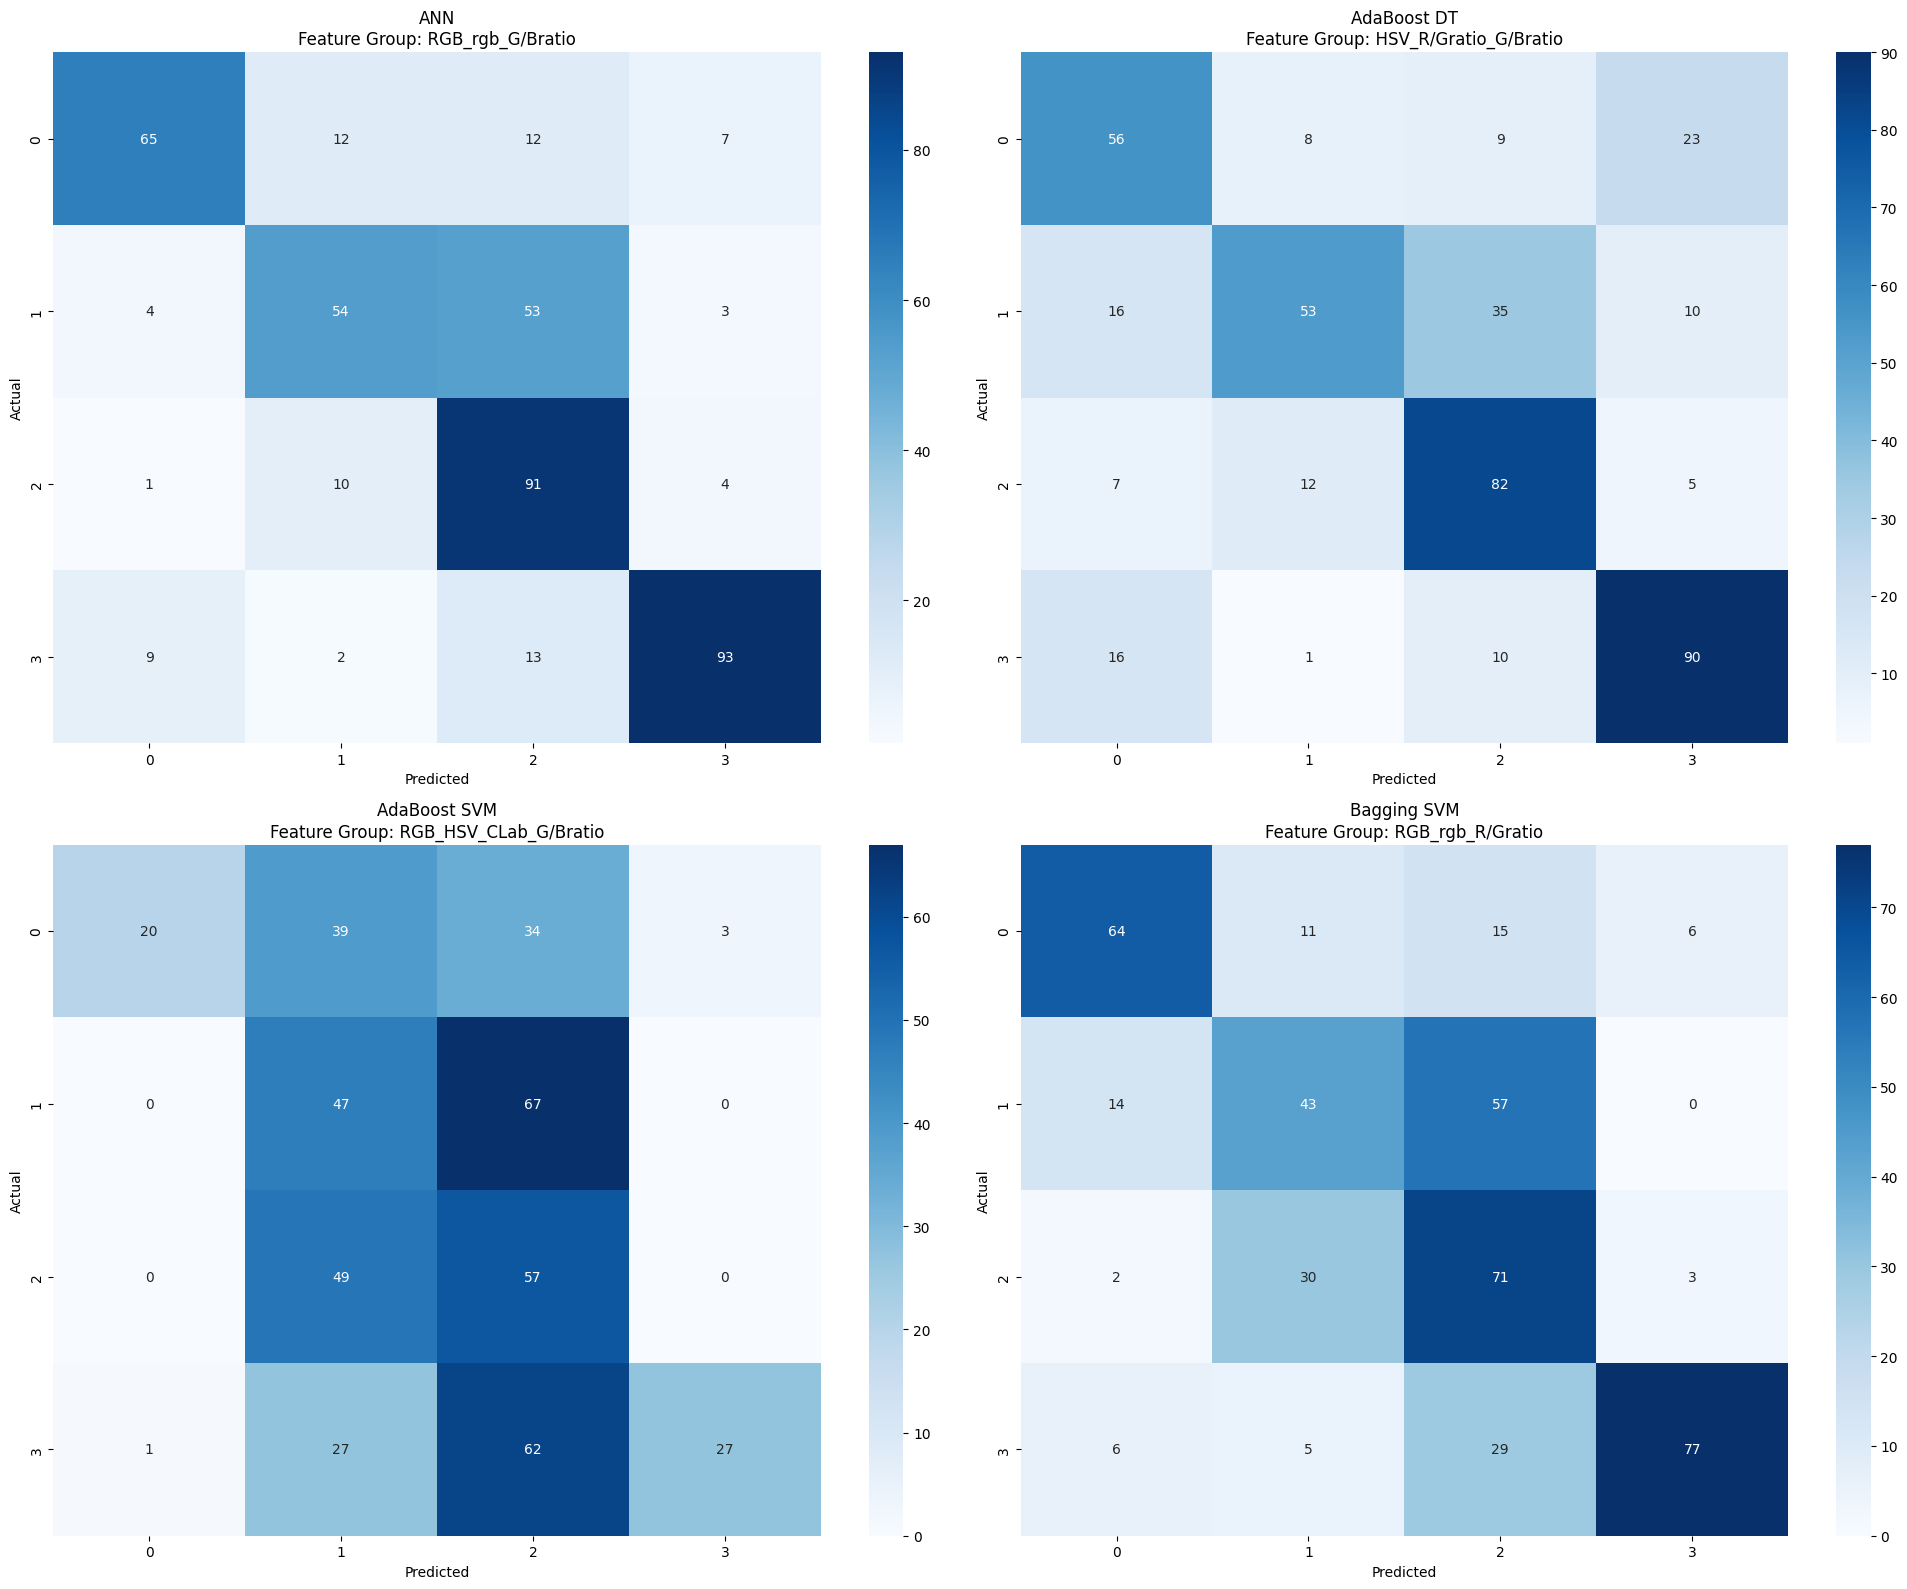

In [174]:
visualize_top_feature_combinations(
    data_prep=data_prep,
    results=results_dict_gb,
    metrics_df=metrics_dict_gb,
    models=model_names,
    method='gb'
)

### **Seleksi Fitur**

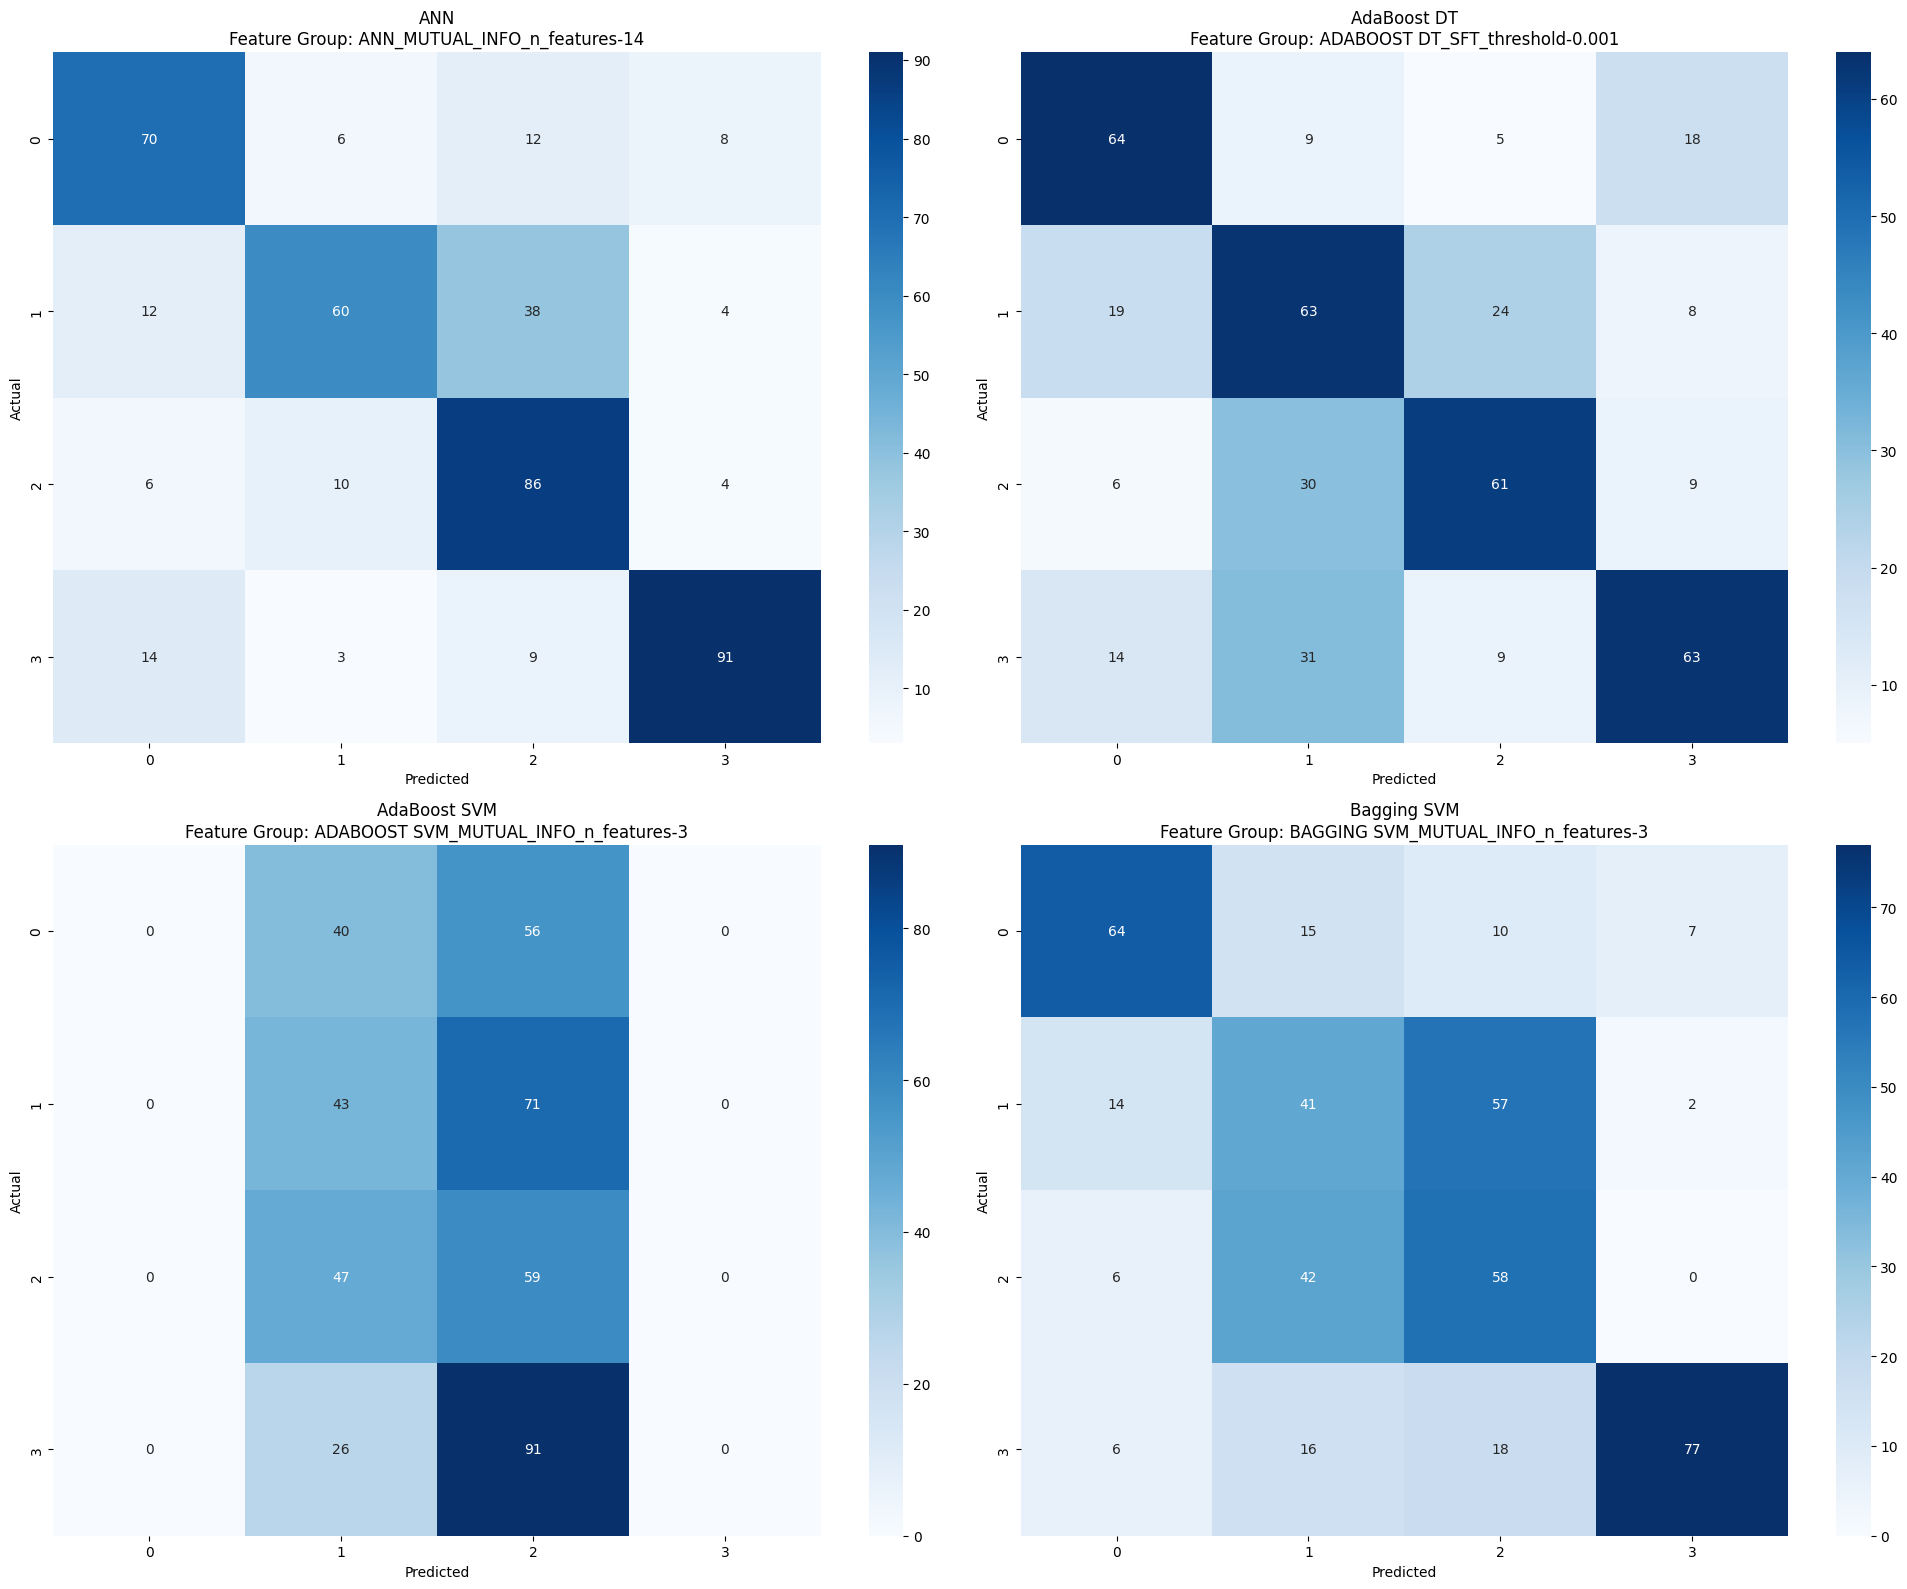

In [182]:
visualize_top_feature_combinations(
    data_prep=data_prep_selection,
    results=results_dict_fs,
    metrics_df=metrics_dict_fs,
    models=model_names,
    method='ag'
)

### **Hyperparameter Tuning**

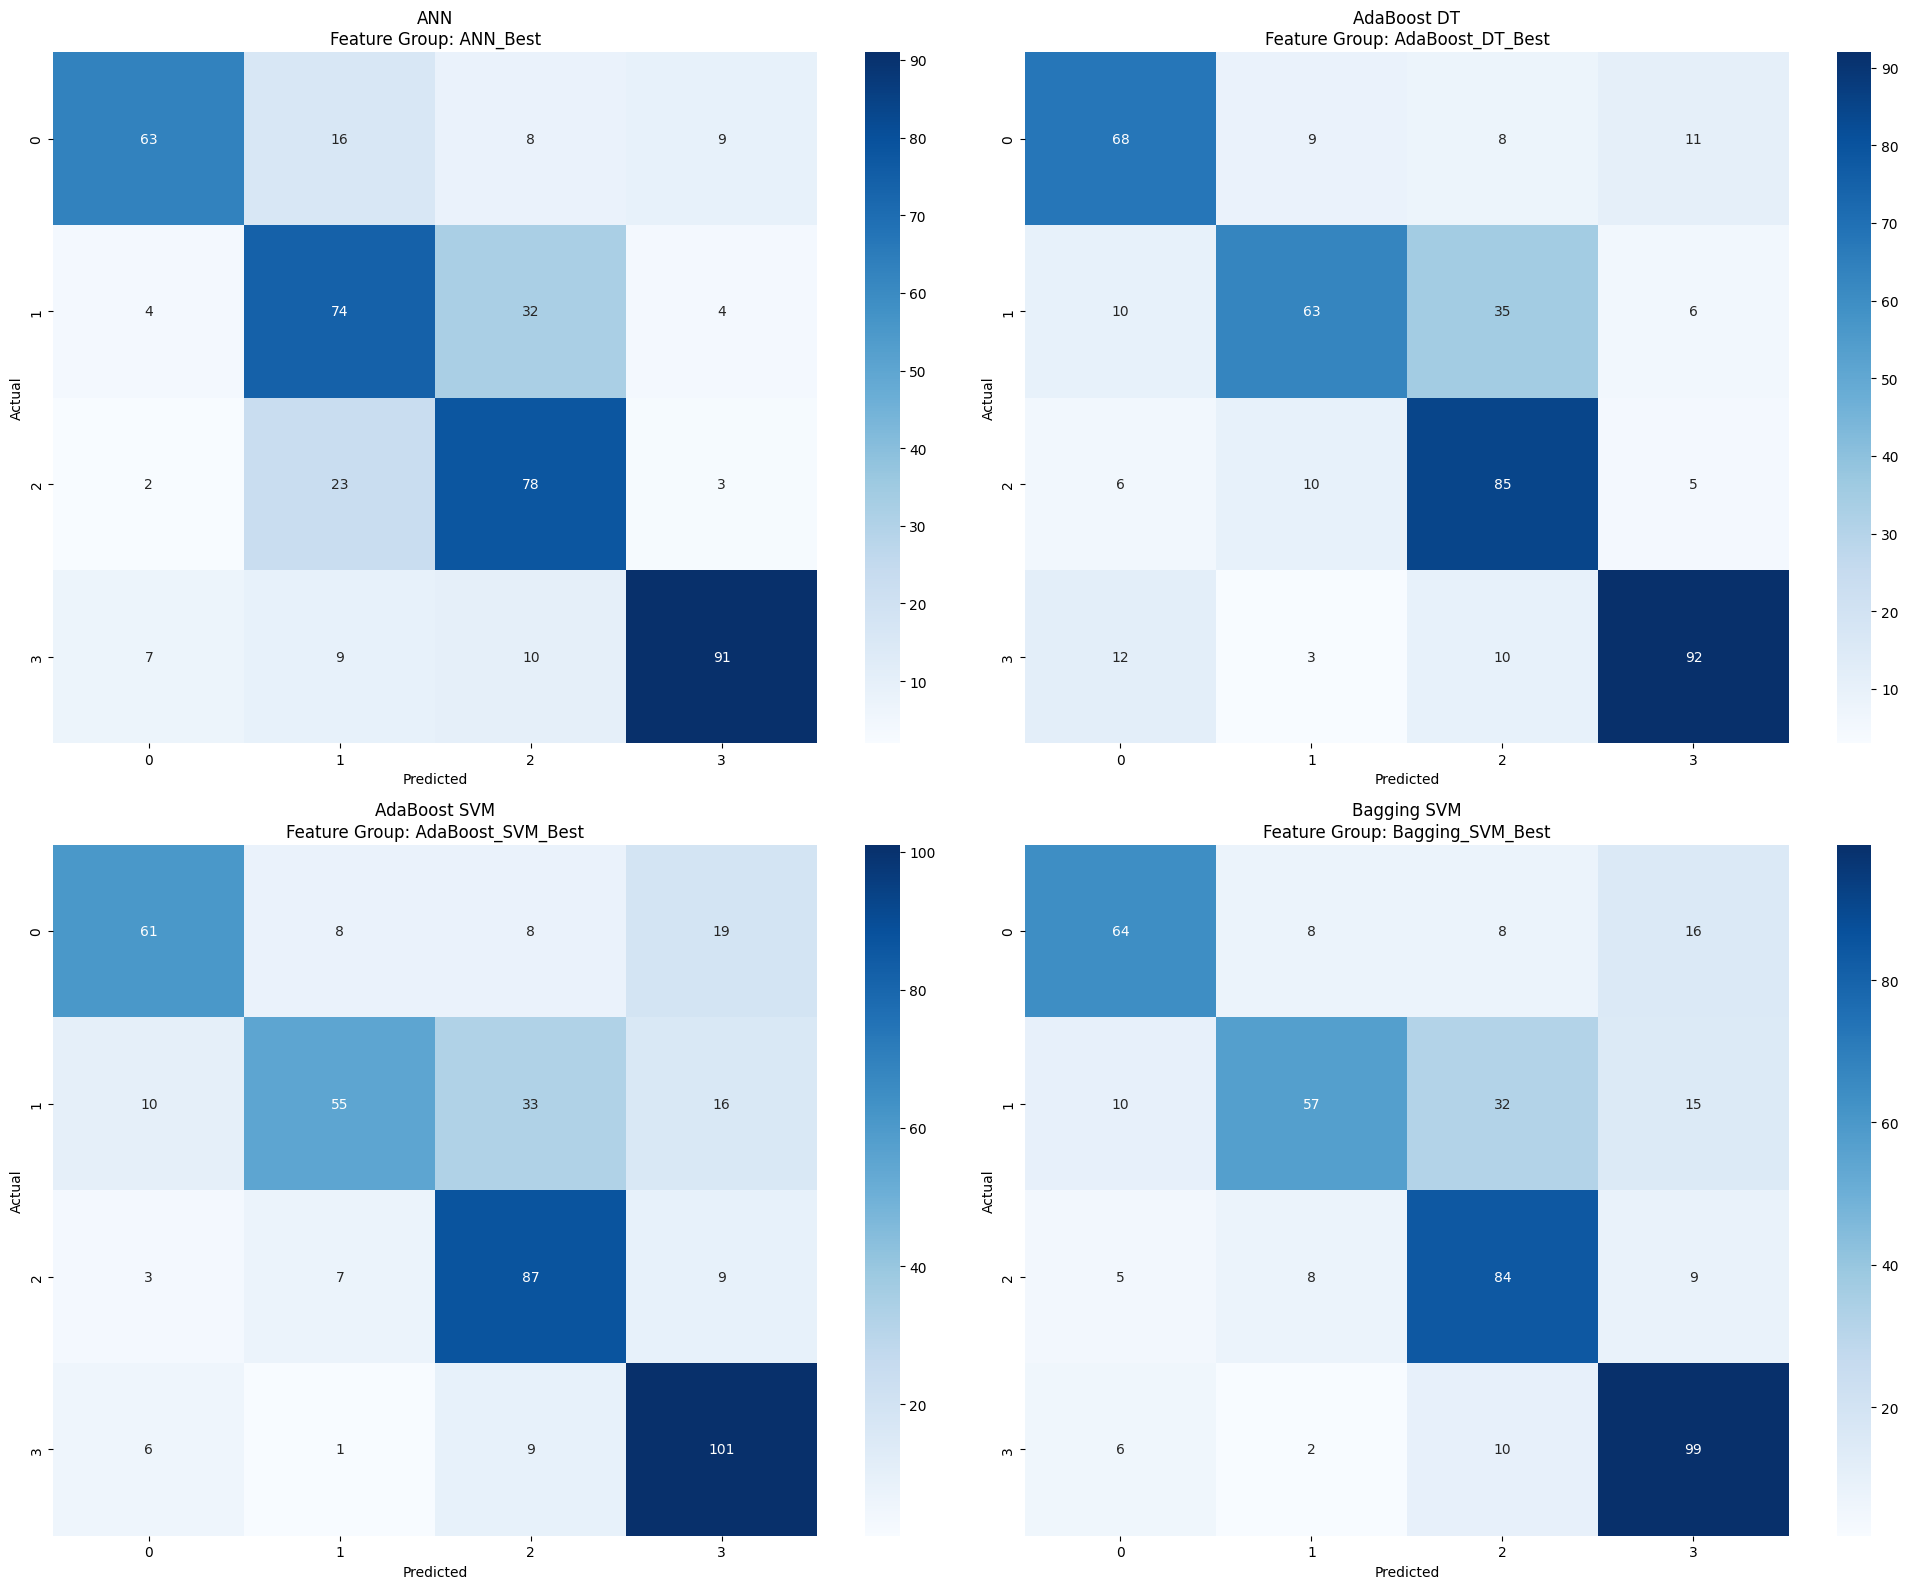

In [183]:
visualize_top_feature_combinations(
    data_prep=data_prep_finetuning,
    results=results_dict_ht,
    metrics_df=metrics_df_final_dict_ht,
    models=model_names,
    method='ht'
)

## **ROC-AUC**

### **Fungsi ROC-AUC**

In [187]:
def plot_roc_per_class(results, data_prep, metrics_df, models=None, method='gb'):
    if models is None:
        models = metrics_df['Model'].unique().tolist()

    # Ambil sample y_test untuk cek jumlah kelas
    first_model = models[0]
    top_group_for_first = metrics_df[metrics_df['Model'] == first_model].nlargest(1, 'Test Accuracy')['Feature Group'].iloc[0]

    if method == 'gb':
        y_test_sample = data_prep[top_group_for_first]['y_test']
    elif method == 'ag':
        y_test_sample = data_prep['y_test']
    elif method == 'ht':
        y_test_sample = data_prep[top_group_for_first]['y_test']
    classes = np.unique(y_test_sample)
    n_classes = len(classes)

    # Setup figure dengan grid: 2 kolom per baris
    n_cols = 2
    n_rows = (n_classes + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
    axes = axes.flatten()  # Flatten agar mudah diiterasi

    # Warna untuk setiap model
    model_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']
    model_color_map = {model: model_colors[i % len(model_colors)] for i, model in enumerate(models)}

    # Loop tiap kelas
    for cls_idx, class_label in enumerate(classes):
        ax = axes[cls_idx]
        ax.set_title(f"Class {class_label} - ROC Curve (All Models)")

        # Loop tiap model
        for model_name in models:
            color = model_color_map[model_name]

            # Ambil grup terbaik untuk model ini
            top_group = metrics_df[metrics_df['Model'] == model_name].nlargest(1, 'Test Accuracy')['Feature Group'].iloc[0]

            # Akses y_test dan y_prob sesuai method
            if method == 'gb':
                if top_group not in data_prep:
                    print(f"Skipping {model_name} ({top_group}): tidak ditemukan di data_prep")
                    continue
                y_test = data_prep[top_group]['y_test']
                y_prob = results[model_name][top_group]['test_results']['y_prob']
            elif method == 'ag':
                y_test = data_prep['y_test']
                y_prob = results[model_name][top_group]['test_results']['y_prob']
            elif method == 'ht':
                y_test = data_prep[top_group]['y_test']
                y_prob = results[model_name][top_group]['test_prob']

            # Binarize y_test untuk kelas tertentu
            y_test_bin = label_binarize(y_test, classes=classes)[:, cls_idx]

            # Hitung FPR, TPR, dan AUC
            fpr, tpr, _ = roc_curve(y_test_bin, y_prob[:, cls_idx])
            roc_auc = auc(fpr, tpr)

            # Plot ROC Curve
            ax.plot(
                fpr, tpr,
                color=color,
                lw=1.5,
                linestyle='-',
                label=f'{model_name} ({top_group}, AUC = {roc_auc:.2f})'
            )

        # Tambahkan diagonal reference line
        ax.plot([0, 1], [0, 1], 'k--', lw=1.5)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc="lower right")

    # Nonaktifkan axis kosong jika jumlah kelas ganjil
    for i in range(len(classes), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### **Gabungan Fitur**

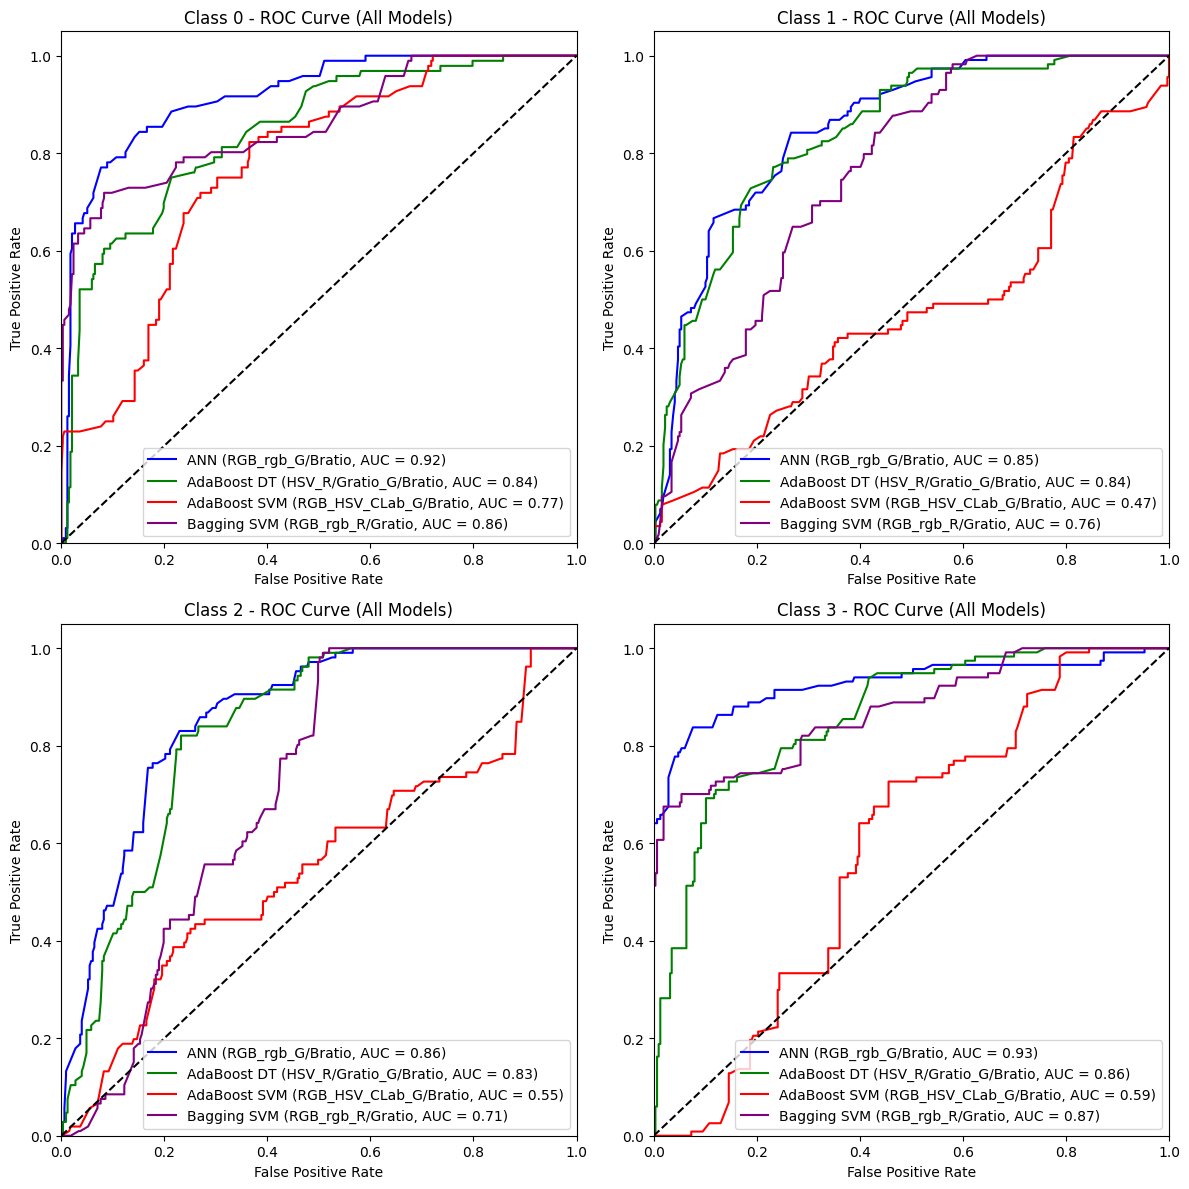

In [188]:
plot_roc_per_class(
    results=results_dict_gb,
    data_prep=data_prep,
    metrics_df=metrics_dict_gb,
    models=model_names,
    method='gb'
)

### **Seleksi Fitur**

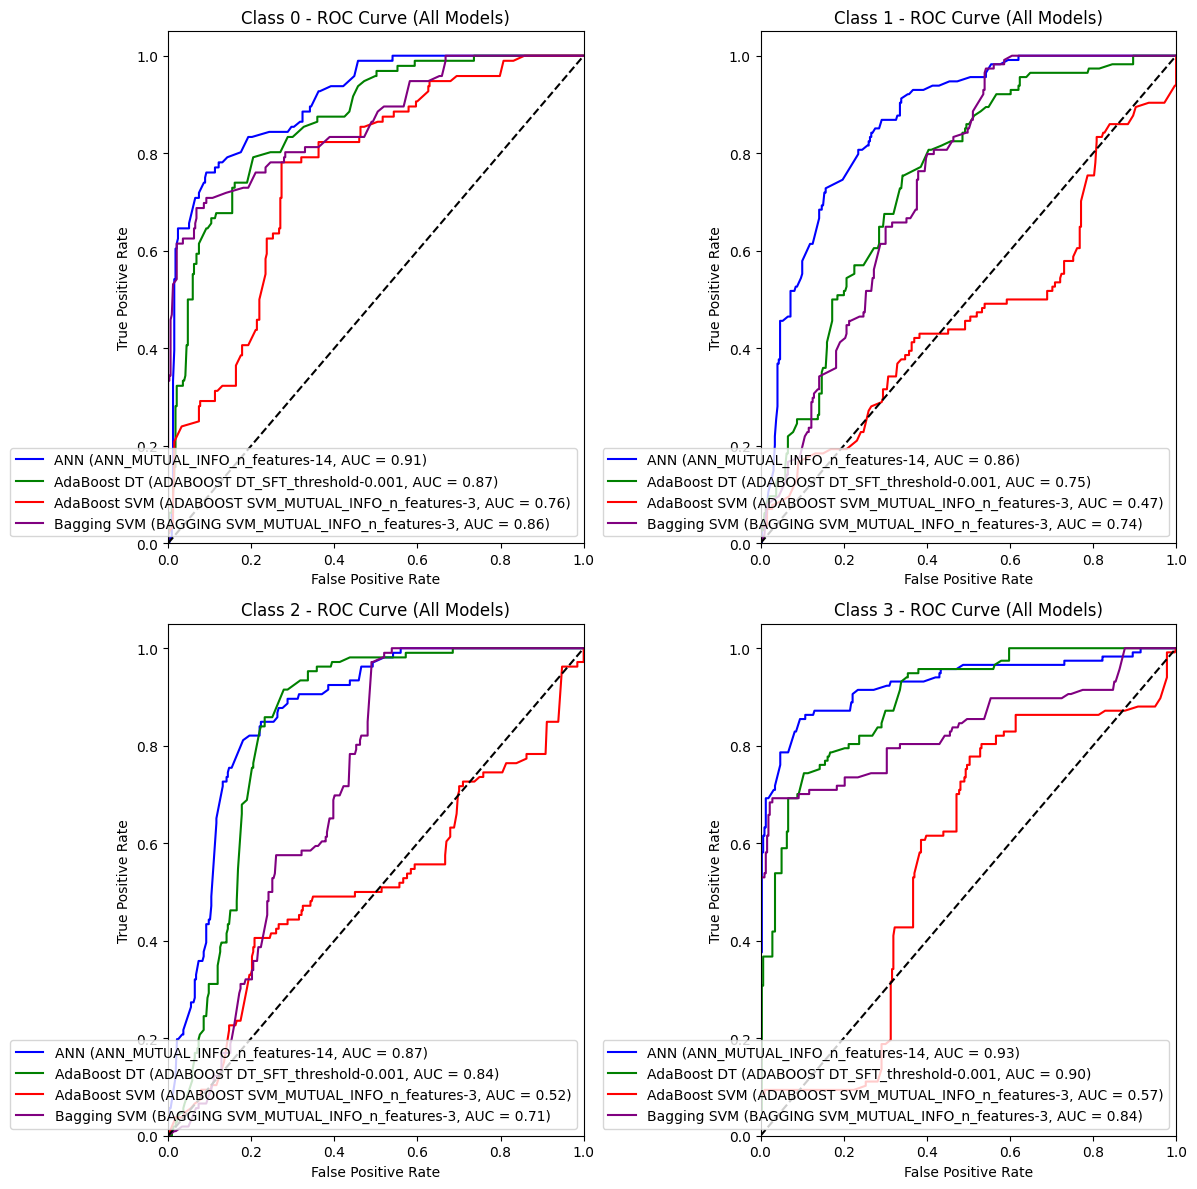

In [189]:
plot_roc_per_class(
    results=results_dict_fs,
    data_prep=data_prep_selection,
    metrics_df=metrics_dict_fs,
    models=model_names,
    method='ag'
)

### **Hyperparameter Tuning**

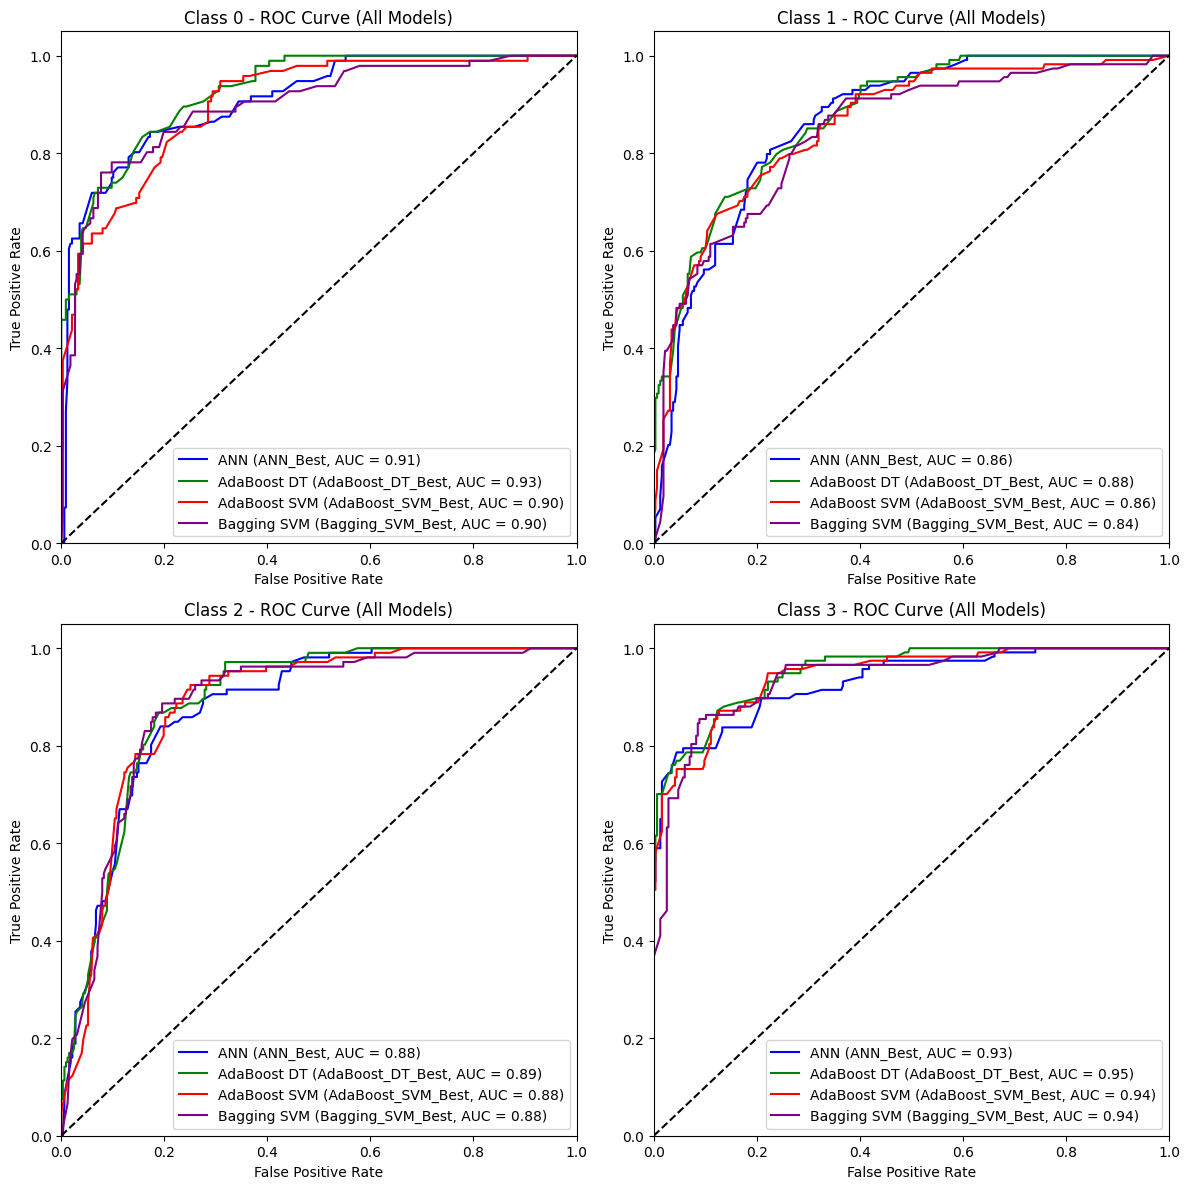

In [190]:
plot_roc_per_class(
    results=results_dict_ht,
    data_prep=data_prep_finetuning,
    metrics_df=metrics_df_final_dict_ht,
    models=model_names,
    method='ht'
)

## **Classification Report**

### **Fungsi Classification Report**

In [191]:
def visualize_model_feature_metrics(all_metrics_df, model_names, top_n=1):

    def get_metric_column(df, metric_name):
        """Mencari kolom metrik yang sesuai (Test atau Val)."""
        if f"Test {metric_name}" in df.columns:
            return f"Test {metric_name}"
        elif f"Val {metric_name}" in df.columns:
            return f"Val {metric_name}"
        else:
            raise KeyError(f"Kolom untuk '{metric_name}' tidak ditemukan dalam DataFrame.")

    n_models = len(model_names)

    # Atur layout grid berdasarkan jumlah model
    cols_per_row = 2 if n_models > 1 else 1  # Jika banyak model, 2 kolom per baris
    rows = (n_models + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 6, rows * 4))
    
    # Flatten axes agar mudah diiterasi
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

    plot_idx = 0  # Indeks subplot

    for model_name in model_names:
        # Filter data untuk model tertentu
        model_df = all_metrics_df[all_metrics_df['Model'] == model_name]
        if model_df.empty:
            raise ValueError(f"Tidak ada data untuk model '{model_name}' dalam DataFrame.")

        # Ambil top_n kombinasi fitur berdasarkan Test Accuracy
        accuracy_col = get_metric_column(model_df, "Accuracy")
        top_features_df = model_df.nlargest(top_n, accuracy_col)
        feature_group = top_features_df.iloc[0]['Feature Group']

        ax = axes[plot_idx]

        # Ambil metrik
        metrics = top_features_df.iloc[0]
        labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
        values = [
            metrics[get_metric_column(model_df, "Accuracy")],
            metrics[get_metric_column(model_df, "Precision")],
            metrics[get_metric_column(model_df, "Recall")],
            metrics[get_metric_column(model_df, "F1-Score")]
        ]

        # Plot barchart
        bars = sns.barplot(x=labels, y=values, ax=ax, palette='tab10',hue=labels)
        ax.set_title(f"{model_name} - {feature_group}")
        ax.set_ylim(0, 1)
        ax.set_ylabel('Score')
        ax.set_xlabel('Metrics')
        ax.grid(axis='y')

        # Label persentase di atas bar
        for bar, value in zip(bars.patches, values):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{value:.2%}",
                ha='center',
                va='bottom',
                fontsize=10
            )

        plot_idx += 1

    # Hapus subplot kosong jika ada
    for i in range(plot_idx, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### **Gabungan Fitur**

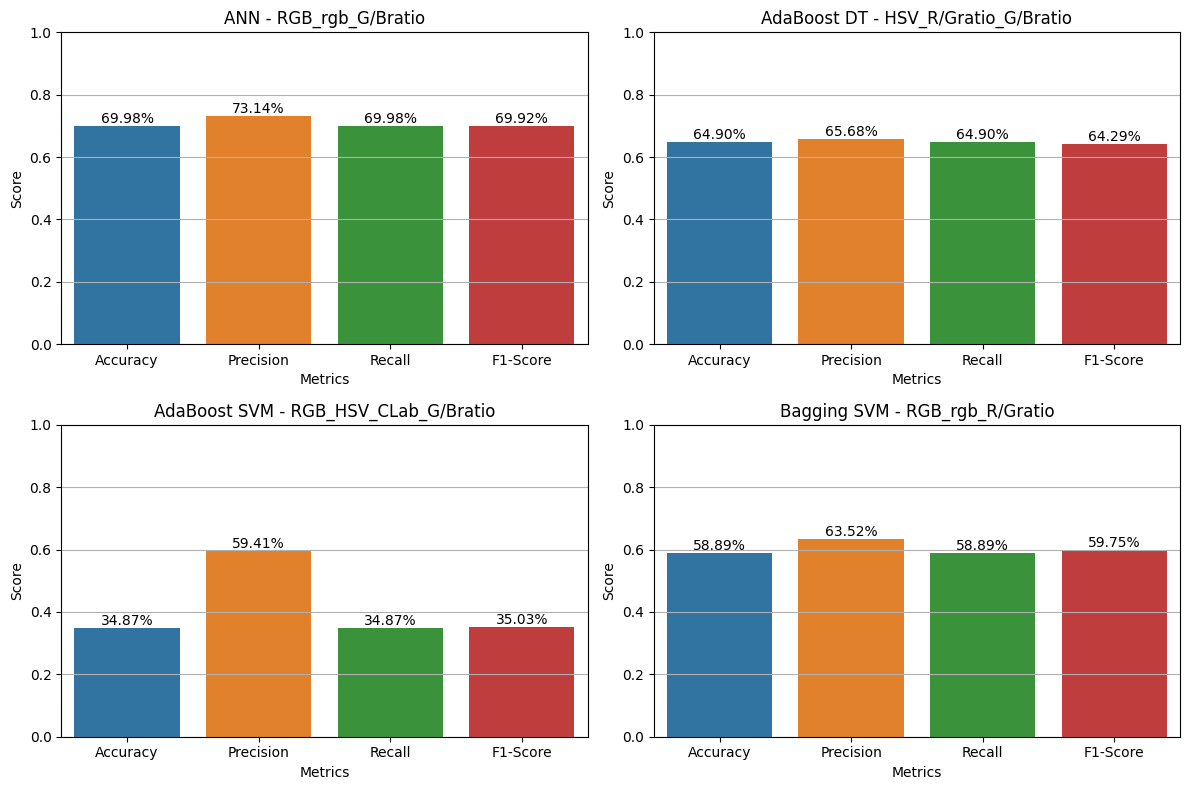

In [192]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_dict_gb,
    model_names=model_names,
)

### **Seleksi Fitur**

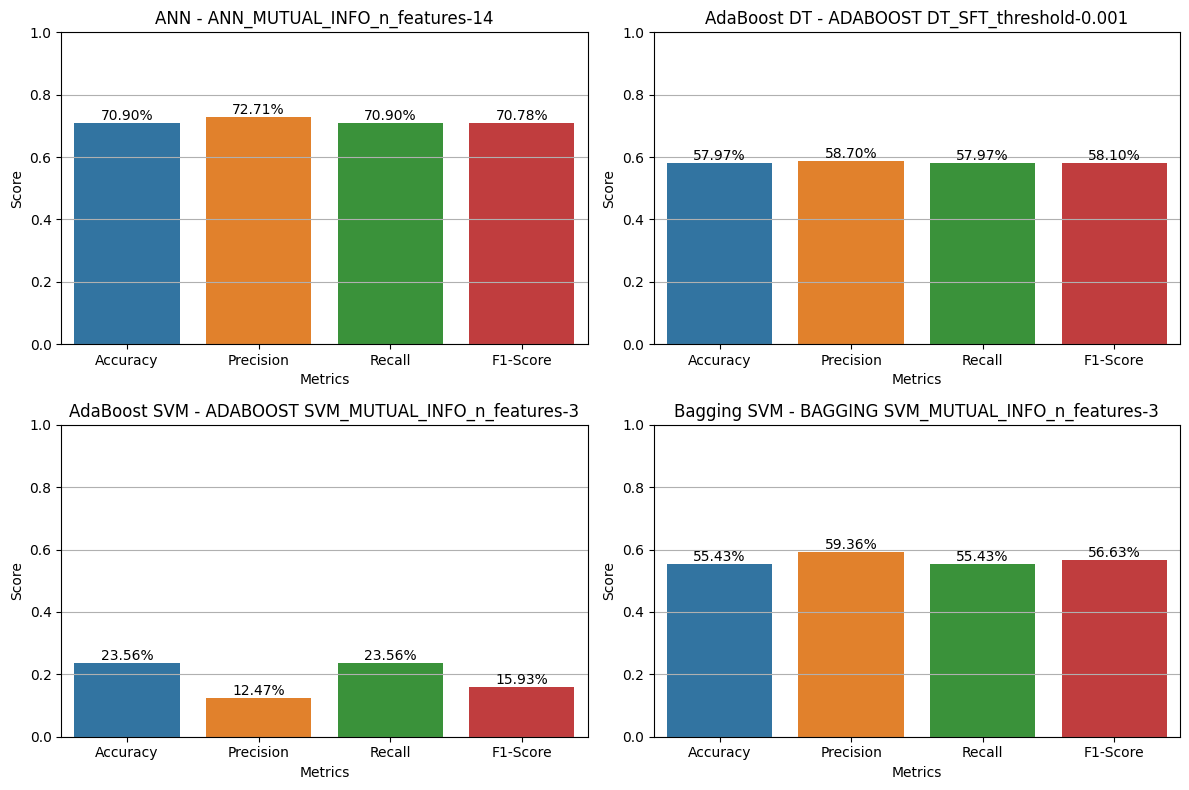

In [193]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_dict_fs,
    model_names=model_names,
)

### **Hyperparameter Tuning**

#### **Cross Validation**

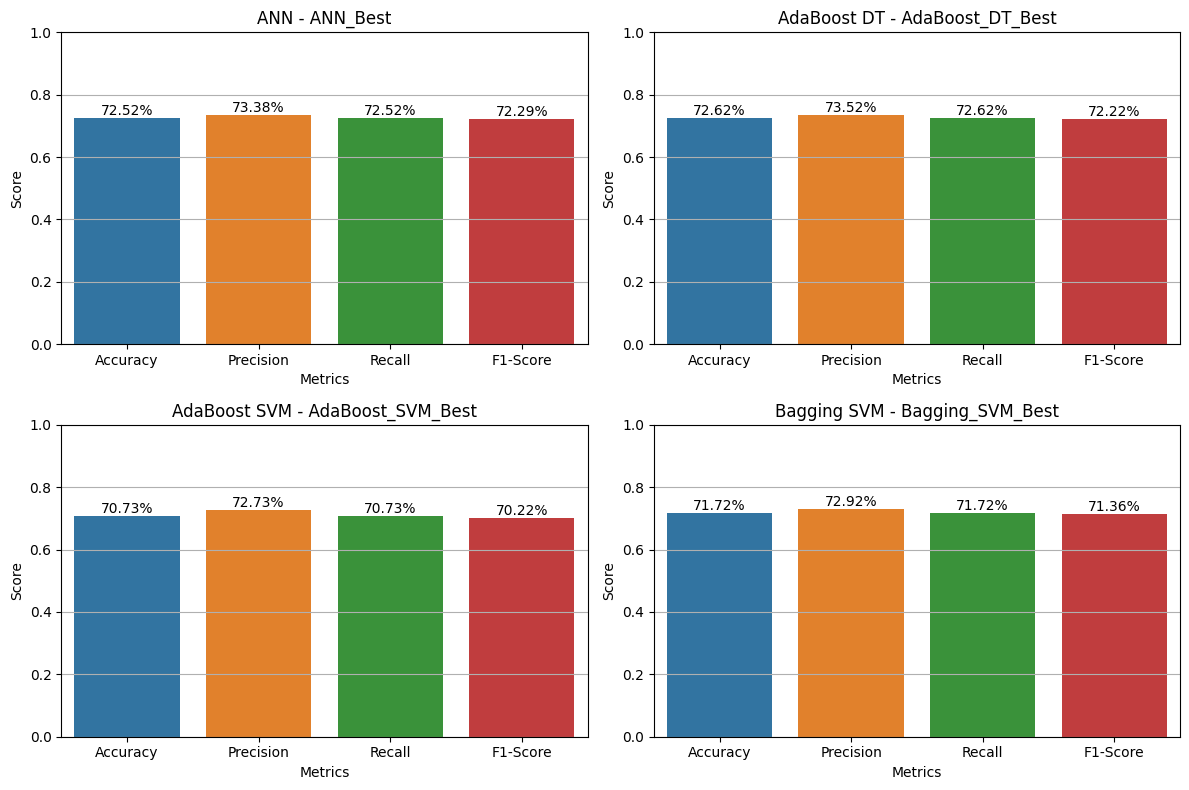

In [194]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_dicts_average_cv,
    model_names=model_names,
)

#### **Final Model**

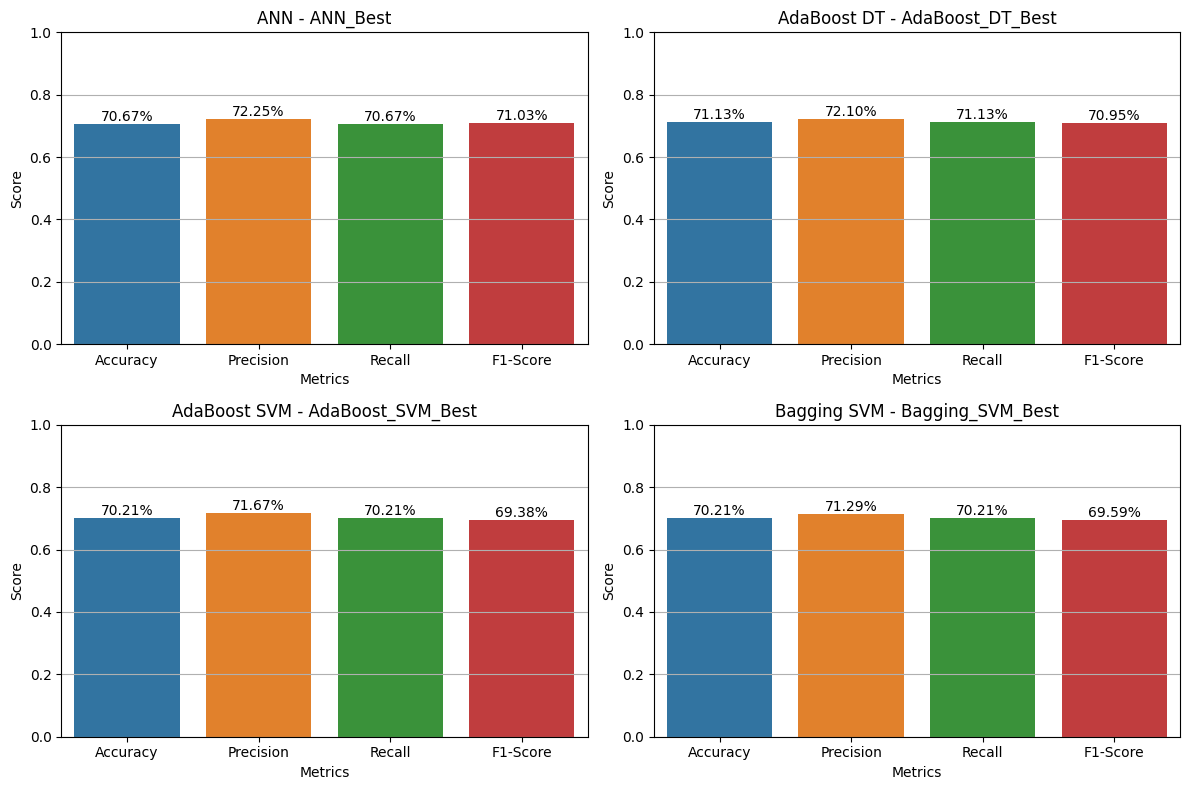

In [195]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_df_final_dict_ht,
    model_names=model_names,
)

# **UJI COBA**

### **Percobaan ANN**

In [ ]:
import random
import os
import tensorflow as tf

SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.neural_network import MLPClassifier

# Utility function untuk membuat dan melatih model ANN
def create_and_train_ann(X_train, y_train, X_val=None, y_val=None, num_classes=None):
    print("=== Melatih Model ANN dengan MLPClassifier (Tanpa Scaler) ===")
    
    # Jika tidak ada validasi, gunakan sebagian training sebagai validasi
    if X_val is None or y_val is None:
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42
        )

    # Parameter default sesuai spesifikasi
    default_params = {
        "hidden_layer_sizes": (100, 50),
        "activation": "relu",
        "solver": "adam",
        "alpha": 0.0001,         # L2 regularization strength
        "batch_size": 32,
        "max_iter": 1000,
        "early_stopping": True,  # Gunakan early stopping
        "random_state": 42,
        "verbose": False
    }

    # Buat model
    model = MLPClassifier(**default_params)

    # Latih model
    model.fit(X_train, y_train)

    # Evaluasi
    train_acc = model.score(X_train, y_train)
    val_acc = model.score(X_val, y_val)

    print(f"Akurasi Training: {train_acc:.4f}")
    print(f"Akurasi Validasi: {val_acc:.4f}")

    # Simulasi history seperti Keras untuk kompatibilitas
    history = {
        'accuracy': [train_acc],
        'val_accuracy': [val_acc],
        'loss': [model.loss_],
    }

    return model, history

# 1. RAW FEATURES
def select_features_raw(X_train, X_test, y_train, feature_names):
    print("Menggunakan fitur asli (tanpa ekstraksi/seleksi)")
    print(f"Jumlah fitur: {X_train.shape[1]}")
    print(f"Fitur yang digunakan: {feature_names}")
    
    return X_train, X_test, feature_names

# 2. PCA
def select_features_pca(X_train, X_test, y_train, feature_names, n_components=8):
    
    # Menerapkan PCA
    pca = PCA(n_components=min(n_components, X_train.shape[1]))
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    print("Fitur yang dipilih dengan PCA:")
    
    # Print variance explained
    explained_variance = pca.explained_variance_ratio_
    print("Variance Explained oleh komponen PCA:")
    for i, var in enumerate(explained_variance):
        print(f"PC{i+1}: {var:.4f}")
    print(f"Total: {sum(explained_variance):.4f}")
    
    # Visualisasi loading factors (opsional)
    print("\nLoading factors (kontribusi fitur asli ke PC):")
    for i in range(min(3, len(explained_variance))):  # hanya 3 PC pertama
        print(f"\nPC{i+1} coefficients:")
        # Urutkan berdasarkan nilai absolut
        coeffs = pca.components_[i]
        sorted_indices = np.argsort(np.abs(coeffs))[::-1]  # Descending order
        for idx in sorted_indices[:5]:  # top 5 fitur
            print(f"  {feature_names[idx]}: {coeffs[idx]:.4f}")
    
    return X_train_pca, X_test_pca, [f"PC{i+1}" for i in range(pca.n_components_)]

# 3. LDA
def select_features_lda(X_train, X_test, y_train, feature_names, n_components=None):
    
    # Menentukan jumlah komponen
    n_classes = len(np.unique(y_train))
    if n_components is None:
        n_components = min(n_classes-1, X_train.shape[1])
    else:
        n_components = min(n_classes-1, n_components, X_train.shape[1])
    
    # Menerapkan LDA
    lda = LDA(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    
    print("Fitur yang dipilih dengan LDA:")
    print("Discriminant Analysis:")
    for i in range(n_components):
        print(f"LD{i+1} explains discrimination between classes")
    
    # Tampilkan koefisien transformasi
    print("\nKontribusi fitur asli ke komponen LDA:")
    for i in range(n_components):
        print(f"\nLD{i+1} coefficients:")
        # Urutkan koefisien berdasarkan nilai absolut
        coeffs = lda.scalings_[:, i]
        sorted_indices = np.argsort(np.abs(coeffs))[::-1]  # Descending order
        for idx in sorted_indices:
            print(f"  {feature_names[idx]}: {coeffs[idx]:.4f}")
    
    return X_train_lda, X_test_lda, [f"LD{i+1}" for i in range(n_components)]

# 4. Kernel PCA
def select_features_kernel_pca(X_train, X_test, y_train, feature_names, n_components=8):
    
    # Menerapkan Kernel PCA
    kpca = KernelPCA(
        n_components=min(n_components, X_train.shape[1]),
        kernel='rbf',  # Gaussian kernel
        gamma=None  # 1/n_features by default
    )
    
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)
    
    print("Fitur yang dipilih dengan Kernel PCA:")
    print(f"Jumlah komponen: {kpca.n_components}")
    print(f"Kernel: RBF (Gaussian)")
    
    # Variance explained tidak tersedia untuk Kernel PCA
    if hasattr(kpca, 'lambdas_'):
        explained_var = kpca.lambdas_ / np.sum(kpca.lambdas_)
        print("\nApproximate variance explained:")
        for i, var in enumerate(explained_var[:min(5, len(explained_var))]):
            print(f"Component {i+1}: {var:.4f}")
    
    return X_train_kpca, X_test_kpca, [f"KPCA{i+1}" for i in range(kpca.n_components)]

# 5. Autoencoder untuk ekstraksi fitur
def select_features_autoencoder(X_train, X_test, y_train, feature_names, encoding_dim=5):
    
    # Dimensi input
    input_dim = X_train.shape[1]
    
    # Define encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(min(input_dim*2, 64), activation='relu')(input_layer)
    encoded = Dense(min(input_dim, 32), activation='relu')(encoded)
    encoded = Dense(encoding_dim, activation='relu', name='bottleneck')(encoded)
    
    # Define decoder untuk training
    decoded = Dense(min(input_dim, 32), activation='relu')(encoded)
    decoded = Dense(min(input_dim*2, 64), activation='relu')(decoded)
    output_layer = Dense(input_dim, activation='linear')(decoded)
    
    # Define autoencoder
    autoencoder = Model(input_layer, output_layer)
    encoder = Model(input_layer, encoded)
    
    # Compile autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')
    
    # Early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # Train autoencoder
    print("Melatih autoencoder untuk ekstraksi fitur...")
    history = autoencoder.fit(
        X_train, X_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Extract features
    X_train_encoded = encoder.predict(X_train)
    X_test_encoded = encoder.predict(X_test)
    
    print("Fitur yang dipilih dengan Autoencoder:")
    print(f"Jumlah fitur laten: {encoding_dim}")
    print(f"Arsitektur autoencoder: {input_dim} -> {min(input_dim*2, 64)} -> {min(input_dim, 32)} -> {encoding_dim}")
    print(f"Training loss: {history.history['loss'][-1]:.4f}")
    print(f"Validation loss: {history.history['val_loss'][-1]:.4f}")
    
    return X_train_encoded, X_test_encoded, [f"AE{i+1}" for i in range(encoding_dim)]

# 6. SelectKBest (filter method)
def select_features_kbest(X_train, X_test, y_train, feature_names, k=8):
    
    # Menerapkan SelectKBest dengan f_classif (ANOVA)
    selector = SelectKBest(f_classif, k=min(k, X_train.shape[1]))
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Mendapatkan fitur yang terpilih
    selected_indices = selector.get_support(indices=True)
    selected_features = [feature_names[i] for i in selected_indices]
    
    print("Fitur yang dipilih dengan SelectKBest (ANOVA f-value):")
    print(f"Jumlah fitur terpilih: {len(selected_features)}")
    print(f"Fitur terpilih: {selected_features}")
    
    # Tampilkan skor fitur
    print("\nSkor fitur berdasarkan ANOVA F-value:")
    for i, score in enumerate(selector.scores_):
        if i in selected_indices:
            print(f"  {feature_names[i]}: {score:.4f} (TERPILIH)")
        else:
            print(f"  {feature_names[i]}: {score:.4f}")
    
    return X_train_selected, X_test_selected, selected_features

# 7. RFE (wrapper method)
def select_features_rfe(X_train, X_test, y_train, feature_names, n_features=8):
    
    # Menggunakan LogisticRegression sebagai estimator
    estimator = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs',random_state=42)
    
    # Menerapkan RFE
    selector = RFE(estimator, n_features_to_select=min(n_features, X_train.shape[1]), step=1)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Mendapatkan fitur terpilih
    selected_indices = selector.get_support(indices=True)
    selected_features = [feature_names[i] for i in selected_indices]
    
    print("Fitur yang dipilih dengan RFE:")
    print(f"Jumlah fitur terpilih: {len(selected_features)}")
    print(f"Fitur terpilih: {selected_features}")
    
    # Tampilkan ranking fitur
    print("\nRanking fitur (1 = terpilih):")
    for i, rank in enumerate(selector.ranking_):
        if rank == 1:
            print(f"  {feature_names[i]}: {rank} (TERPILIH)")
        else:
            print(f"  {feature_names[i]}: {rank}")
    
    return X_train_selected, X_test_selected, selected_features

# 8. Gabungan PCA dan LDA
def select_features_pca_lda(X_train, X_test, y_train, feature_names, n_pca=5, n_lda=3):
    
    # 1. Menerapkan PCA
    pca = PCA(n_components=min(n_pca, X_train.shape[1]))
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # 2. Menerapkan LDA pada hasil PCA
    n_classes = len(np.unique(y_train))
    n_components_lda = min(n_classes-1, n_lda, n_pca)
    
    lda = LDA(n_components=n_components_lda)
    X_train_pca_lda = lda.fit_transform(X_train_pca, y_train)
    X_test_pca_lda = lda.transform(X_test_pca)
    
    print("Fitur yang dipilih dengan PCA+LDA:")
    print(f"Jumlah komponen PCA: {n_pca}")
    print(f"Jumlah komponen LDA: {n_components_lda}")
    
    # Print variance explained PCA
    explained_variance = pca.explained_variance_ratio_
    print("\nVariance Explained oleh komponen PCA:")
    for i, var in enumerate(explained_variance):
        print(f"PC{i+1}: {var:.4f}")
    print(f"Total: {sum(explained_variance):.4f}")
    
    # Tampilkan koefisien LDA
    print("\nKontribusi komponen PCA ke komponen LDA:")
    for i in range(n_components_lda):
        print(f"\nLD{i+1} coefficients:")
        coeffs = lda.scalings_[:, i]
        sorted_indices = np.argsort(np.abs(coeffs))[::-1]
        for j, idx in enumerate(sorted_indices):
            print(f"  PC{idx+1}: {coeffs[idx]:.4f}")
    
    return X_train_pca_lda, X_test_pca_lda, [f"PCA_LD{i+1}" for i in range(n_components_lda)]


In [ ]:
def evaluate_method(X_train, X_test, y_train, y_test, method_name, feature_names, n_components=5):
    print(f"\n{'='*30}")
    print(f"Evaluasi metode: {method_name} (tanpa cross-validation)")
    print(f"{'='*30}")

    # Memilih fitur berdasarkan metode
    if method_name == 'raw':
        X_train_feat, X_test_feat, _ = select_features_raw(X_train, X_test, y_train, feature_names)
    elif method_name == 'pca':
        X_train_feat, X_test_feat, _ = select_features_pca(X_train, X_test, y_train, feature_names, n_components)
    elif method_name == 'lda':
        X_train_feat, X_test_feat, _ = select_features_lda(X_train, X_test, y_train, feature_names, n_components)
    elif method_name == 'kernel_pca':
        X_train_feat, X_test_feat, _ = select_features_kernel_pca(X_train, X_test, y_train, feature_names, n_components)
    elif method_name == 'autoencoder':
        X_train_feat, X_test_feat, _ = select_features_autoencoder(X_train, X_test, y_train, feature_names, n_components)
    elif method_name == 'kbest':
        X_train_feat, X_test_feat, _ = select_features_kbest(X_train, X_test, y_train, feature_names, n_components)
    elif method_name == 'rfe':
        X_train_feat, X_test_feat, _ = select_features_rfe(X_train, X_test, y_train, feature_names, n_components)
    elif method_name == 'pca_lda':
        X_train_feat, X_test_feat, _ = select_features_pca_lda(X_train, X_test, y_train, feature_names, n_pca=8, n_lda=n_components)
    else:
        print(f"Metode '{method_name}' tidak valid.")
        return None
    
    n_classes = len(np.unique(y_train))

    model, _ = create_and_train_ann(X_train_feat, y_train, X_test_feat, y_test, n_classes)

    train_acc = model.score(X_train_feat, y_train)
    test_acc = model.score(X_test_feat, y_test)

    print(f"Akurasi Train: {train_acc:.4f}")
    print(f"Akurasi Test:  {test_acc:.4f}")
    return train_acc, test_acc

In [ ]:
def compare_feature_selection_methods(data_dict, n_components=5):
    X_train = data_dict['X_train_ann']
    X_test = data_dict['X_test_ann']
    y_train = data_dict['y_train'].values
    y_test = data_dict['y_test'].values
    feature_names = data_dict['feature_columns']

    print(f"{'='*60}")
    print("PERBANDINGAN METODE SELEKSI/EKSTRAKSI FITUR UNTUK ANN")
    print("Tanpa Cross Validation - Akurasi Train & Test Dipisah")
    print(f"{'='*60}")
    print(f"Bentuk data train: {X_train.shape}")
    print(f"Bentuk data test: {X_test.shape}")
    print(f"Jumlah kelas: {len(np.unique(y_train))}")
    print(f"Jumlah komponen untuk ekstraksi: {n_components}")

    methods = ['raw', 'pca', 'lda', 'kernel_pca', 'autoencoder', 'kbest', 'rfe', 'pca_lda']
    results = {}  # Simpan (train_acc, test_acc)

    for method in methods:
        print(f"\nMemproses metode: {method}")
        train_acc, test_acc = evaluate_method(
            X_train, X_test, y_train, y_test, method, feature_names, n_components
        )
        results[method] = (train_acc, test_acc)

    print(f"\n{'='*60}")
    print("HASIL PERBANDINGAN METODE (Train vs Test)")
    print(f"{'='*60}")
    print(f"{'Metode':<15} {'Train Acc':<12} {'Test Acc':<12}")
    print(f"{'-'*15} {'-'*12} {'-'*12}")
    
    sorted_methods = sorted(results.items(), key=lambda x: x[1][1], reverse=True)
    
    for method, (train_acc, test_acc) in sorted_methods:
        print(f"{method:<15} {train_acc:.4f}       {test_acc:.4f}")

    best_method = sorted_methods[0][0]
    best_test_acc = sorted_methods[0][1][1]
    print(f"\nMetode terbaik: {best_method} dengan akurasi test {best_test_acc:.4f}")

    # Visualisasi akurasi test
    plt.figure(figsize=(12, 6))
    methods_names = [m for m, _ in sorted_methods]
    test_accuracies = [acc for _, (_, acc) in sorted_methods]
    train_accuracies = [acc for _, (acc, _) in sorted_methods]
    
    barWidth = 0.4
    r1 = np.arange(len(test_accuracies))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, test_accuracies, color='skyblue', width=barWidth, label='Test')
    plt.bar(r2, train_accuracies, color='salmon', width=barWidth, label='Train')

    plt.xlabel('Metode')
    plt.ylabel('Akurasi')
    plt.title('Perbandingan Akurasi Train dan Test untuk Setiap Metode')
    plt.xticks([r + barWidth / 2 for r in range(len(methods_names))], methods_names)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return best_method, results

PERBANDINGAN METODE SELEKSI/EKSTRAKSI FITUR UNTUK ANN
Tanpa Cross Validation - Akurasi Train & Test Dipisah
Bentuk data train: (1008, 14)
Bentuk data test: (433, 14)
Jumlah kelas: 4
Jumlah komponen untuk ekstraksi: 5

Memproses metode: raw

Evaluasi metode: raw (tanpa cross-validation)
Menggunakan fitur asli (tanpa ekstraksi/seleksi)
Jumlah fitur: 14
Fitur yang digunakan: ['R', 'G', 'B', 'r', 'g', 'b', 'R_G_ratio', 'G_B_ratio', 'H', 'S', 'V', 'cL', 'ca', 'cb']
=== Melatih Model ANN dengan MLPClassifier (Tanpa Scaler) ===
Akurasi Training: 0.6171
Akurasi Validasi: 0.5427
Akurasi Train: 0.6171
Akurasi Test:  0.5427

Memproses metode: pca

Evaluasi metode: pca (tanpa cross-validation)
Fitur yang dipilih dengan PCA:
Variance Explained oleh komponen PCA:
PC1: 0.5224
PC2: 0.2678
PC3: 0.1621
PC4: 0.0424
PC5: 0.0037
Total: 0.9984

Loading factors (kontribusi fitur asli ke PC):

PC1 coefficients:
  b: -0.3357
  B: -0.3357
  cL: -0.3181
  G_B_ratio: 0.2913
  r: -0.2907

PC2 coefficients:
  cb: 0

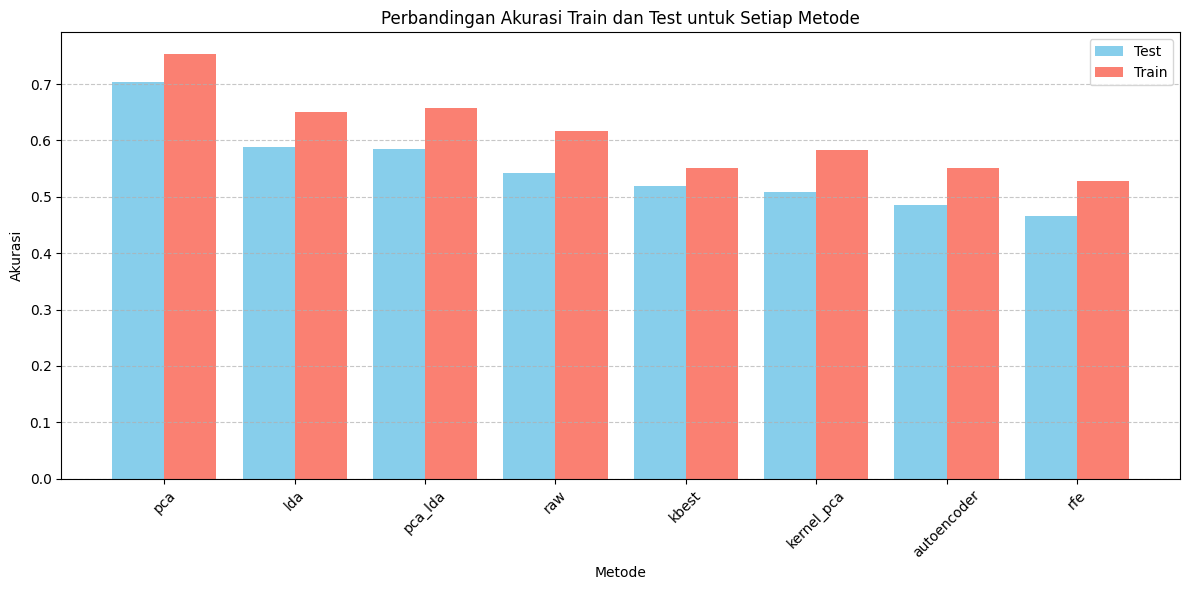

('pca',
 {'raw': (0.6170634920634921, 0.5427251732101617),
  'pca': (0.753968253968254, 0.7043879907621247),
  'lda': (0.6498015873015873, 0.5889145496535797),
  'kernel_pca': (0.5823412698412699, 0.5080831408775982),
  'autoencoder': (0.5505952380952381, 0.48498845265588914),
  'kbest': (0.5515873015873016, 0.5196304849884527),
  'rfe': (0.5287698412698413, 0.4665127020785219),
  'pca_lda': (0.6577380952380952, 0.5842956120092379)})

In [ ]:
compare_feature_selection_methods(data_prep_selection, n_components=5)